# Data Analysis for Real-World Supply Chain Data

This notebook analyzes the raw data files to understand:
- Distribution of fixed and variable costs
- Distribution of SKU weights and unit costs
- SKUs per supplier
- Orders per day
- SKUs per order
- Relationship between available timesteps and n_skus
- Geographic visualization of warehouses, regions, and suppliers

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

# Set style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# Path to raw data
RAW_DATA_PATH = Path("../../data_files/raw")

print("Loading data files...")


Loading data files...


In [2]:
# Load all data files
warehouses_df = pd.read_csv(RAW_DATA_PATH / "01_warehouses.csv")
regions_df = pd.read_csv(RAW_DATA_PATH / "02_regions.csv")
warehouse_to_region_df = pd.read_csv(RAW_DATA_PATH / "03_warehouse_to_region.csv")
suppliers_df = pd.read_csv(RAW_DATA_PATH / "04_suppliers.csv")
supplier_to_warehouse_df = pd.read_csv(RAW_DATA_PATH / "05_supplier_to_warehouse.csv")
skus_df = pd.read_csv(RAW_DATA_PATH / "06_skus.csv")
skus_per_supplier_df = pd.read_csv(RAW_DATA_PATH / "07_skus_per_supplier.csv")
orders_df = pd.read_csv(RAW_DATA_PATH / "08_orders.csv")
order_sku_demand_df = pd.read_csv(RAW_DATA_PATH / "09_order_sku_demand.csv")

print("Data loaded successfully!")
print(f"Warehouses: {len(warehouses_df)}")
print(f"Regions: {len(regions_df)}")
print(f"Suppliers: {len(suppliers_df)}")
print(f"SKUs: {len(skus_df)}")
print(f"Orders: {len(orders_df)}")
print(f"Order-SKU pairs: {len(order_sku_demand_df)}")


Data loaded successfully!
Warehouses: 24
Regions: 57
Suppliers: 572
SKUs: 10578
Orders: 35562
Order-SKU pairs: 258212


## 1. Distribution of Fixed and Variable Costs

### 1.1 Warehouse to Region Costs


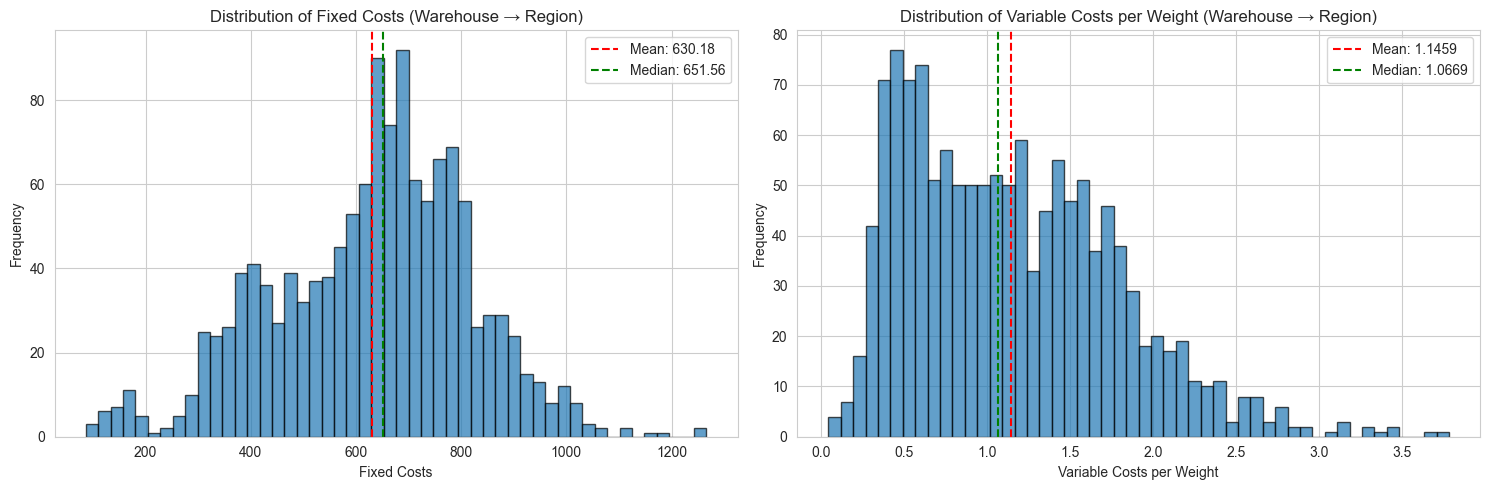

Warehouse → Region Cost Statistics:
Fixed Costs - Mean: 630.18, Std: 187.93
Fixed Costs - Min: 86.27, Max: 1266.45
Variable Costs - Mean: 1.1459, Std: 0.6314
Variable Costs - Min: 0.0457, Max: 3.7796


In [3]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Fixed costs distribution
axes[0].hist(warehouse_to_region_df['fixed_costs'], bins=50, edgecolor='black', alpha=0.7)
axes[0].set_xlabel('Fixed Costs')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution of Fixed Costs (Warehouse → Region)')
axes[0].axvline(warehouse_to_region_df['fixed_costs'].mean(), color='r', linestyle='--', label=f'Mean: {warehouse_to_region_df["fixed_costs"].mean():.2f}')
axes[0].axvline(warehouse_to_region_df['fixed_costs'].median(), color='g', linestyle='--', label=f'Median: {warehouse_to_region_df["fixed_costs"].median():.2f}')
axes[0].legend()

# Variable costs distribution
axes[1].hist(warehouse_to_region_df['variable_costs_per_weight'], bins=50, edgecolor='black', alpha=0.7)
axes[1].set_xlabel('Variable Costs per Weight')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Distribution of Variable Costs per Weight (Warehouse → Region)')
axes[1].axvline(warehouse_to_region_df['variable_costs_per_weight'].mean(), color='r', linestyle='--', label=f'Mean: {warehouse_to_region_df["variable_costs_per_weight"].mean():.4f}')
axes[1].axvline(warehouse_to_region_df['variable_costs_per_weight'].median(), color='g', linestyle='--', label=f'Median: {warehouse_to_region_df["variable_costs_per_weight"].median():.4f}')
axes[1].legend()

plt.tight_layout()
plt.show()

# Print statistics
print("Warehouse → Region Cost Statistics:")
print(f"Fixed Costs - Mean: {warehouse_to_region_df['fixed_costs'].mean():.2f}, Std: {warehouse_to_region_df['fixed_costs'].std():.2f}")
print(f"Fixed Costs - Min: {warehouse_to_region_df['fixed_costs'].min():.2f}, Max: {warehouse_to_region_df['fixed_costs'].max():.2f}")
print(f"Variable Costs - Mean: {warehouse_to_region_df['variable_costs_per_weight'].mean():.4f}, Std: {warehouse_to_region_df['variable_costs_per_weight'].std():.4f}")
print(f"Variable Costs - Min: {warehouse_to_region_df['variable_costs_per_weight'].min():.4f}, Max: {warehouse_to_region_df['variable_costs_per_weight'].max():.4f}")


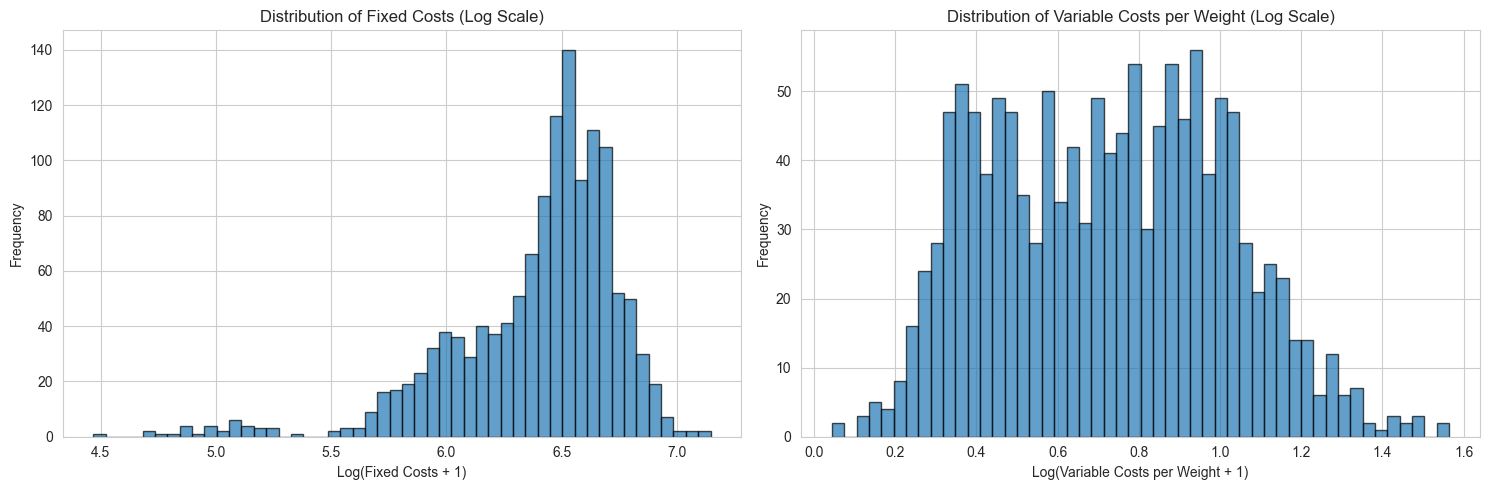

In [4]:
# Log scale for better visualization if needed
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

axes[0].hist(np.log1p(warehouse_to_region_df['fixed_costs']), bins=50, edgecolor='black', alpha=0.7)
axes[0].set_xlabel('Log(Fixed Costs + 1)')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution of Fixed Costs (Log Scale)')

axes[1].hist(np.log1p(warehouse_to_region_df['variable_costs_per_weight']), bins=50, edgecolor='black', alpha=0.7)
axes[1].set_xlabel('Log(Variable Costs per Weight + 1)')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Distribution of Variable Costs per Weight (Log Scale)')

plt.tight_layout()
plt.show()


### 1.2 Supplier to Warehouse Costs


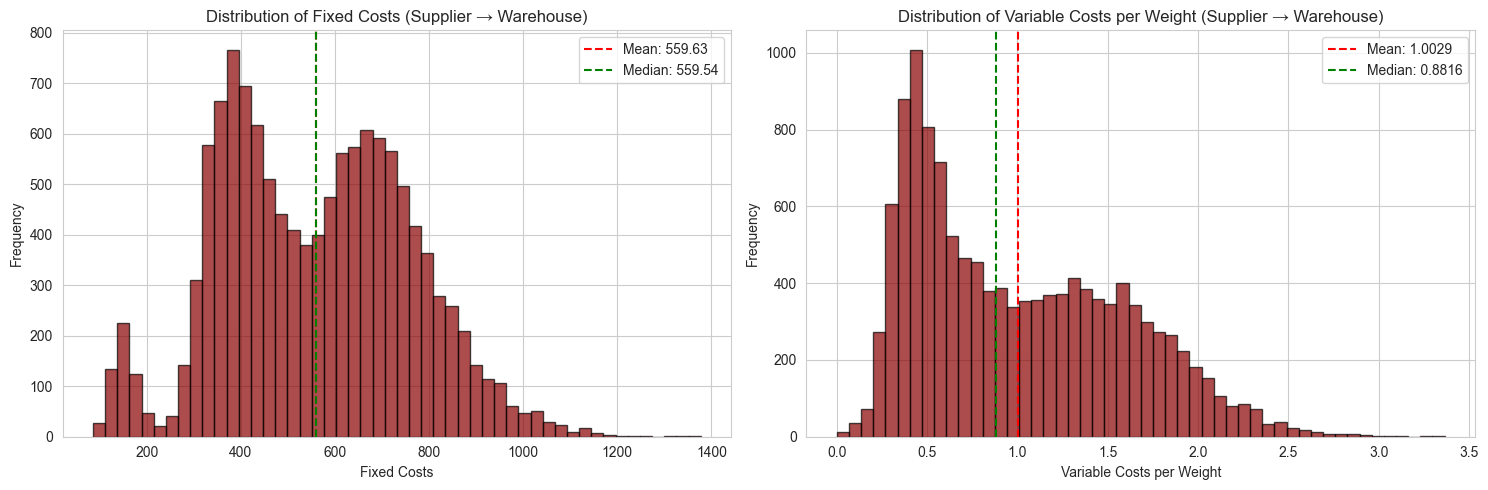

Supplier → Warehouse Cost Statistics:
Fixed Costs - Mean: 559.63, Std: 201.48
Fixed Costs - Min: 85.73, Max: 1377.20
Variable Costs - Mean: 1.0029, Std: 0.5785
Variable Costs - Min: 0.0000, Max: 3.3644


In [5]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Fixed costs distribution
axes[0].hist(supplier_to_warehouse_df['fixed_costs'], bins=50, edgecolor='black', alpha=0.7, color='darkred')
axes[0].set_xlabel('Fixed Costs')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution of Fixed Costs (Supplier → Warehouse)')
axes[0].axvline(supplier_to_warehouse_df['fixed_costs'].mean(), color='r', linestyle='--', label=f'Mean: {supplier_to_warehouse_df["fixed_costs"].mean():.2f}')
axes[0].axvline(supplier_to_warehouse_df['fixed_costs'].median(), color='g', linestyle='--', label=f'Median: {supplier_to_warehouse_df["fixed_costs"].median():.2f}')
axes[0].legend()

# Variable costs distribution
axes[1].hist(supplier_to_warehouse_df['variable_costs_per_weight'], bins=50, edgecolor='black', alpha=0.7, color='darkred')
axes[1].set_xlabel('Variable Costs per Weight')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Distribution of Variable Costs per Weight (Supplier → Warehouse)')
axes[1].axvline(supplier_to_warehouse_df['variable_costs_per_weight'].mean(), color='r', linestyle='--', label=f'Mean: {supplier_to_warehouse_df["variable_costs_per_weight"].mean():.4f}')
axes[1].axvline(supplier_to_warehouse_df['variable_costs_per_weight'].median(), color='g', linestyle='--', label=f'Median: {supplier_to_warehouse_df["variable_costs_per_weight"].median():.4f}')
axes[1].legend()

plt.tight_layout()
plt.show()

# Print statistics
print("Supplier → Warehouse Cost Statistics:")
print(f"Fixed Costs - Mean: {supplier_to_warehouse_df['fixed_costs'].mean():.2f}, Std: {supplier_to_warehouse_df['fixed_costs'].std():.2f}")
print(f"Fixed Costs - Min: {supplier_to_warehouse_df['fixed_costs'].min():.2f}, Max: {supplier_to_warehouse_df['fixed_costs'].max():.2f}")
print(f"Variable Costs - Mean: {supplier_to_warehouse_df['variable_costs_per_weight'].mean():.4f}, Std: {supplier_to_warehouse_df['variable_costs_per_weight'].std():.4f}")
print(f"Variable Costs - Min: {supplier_to_warehouse_df['variable_costs_per_weight'].min():.4f}, Max: {supplier_to_warehouse_df['variable_costs_per_weight'].max():.4f}")


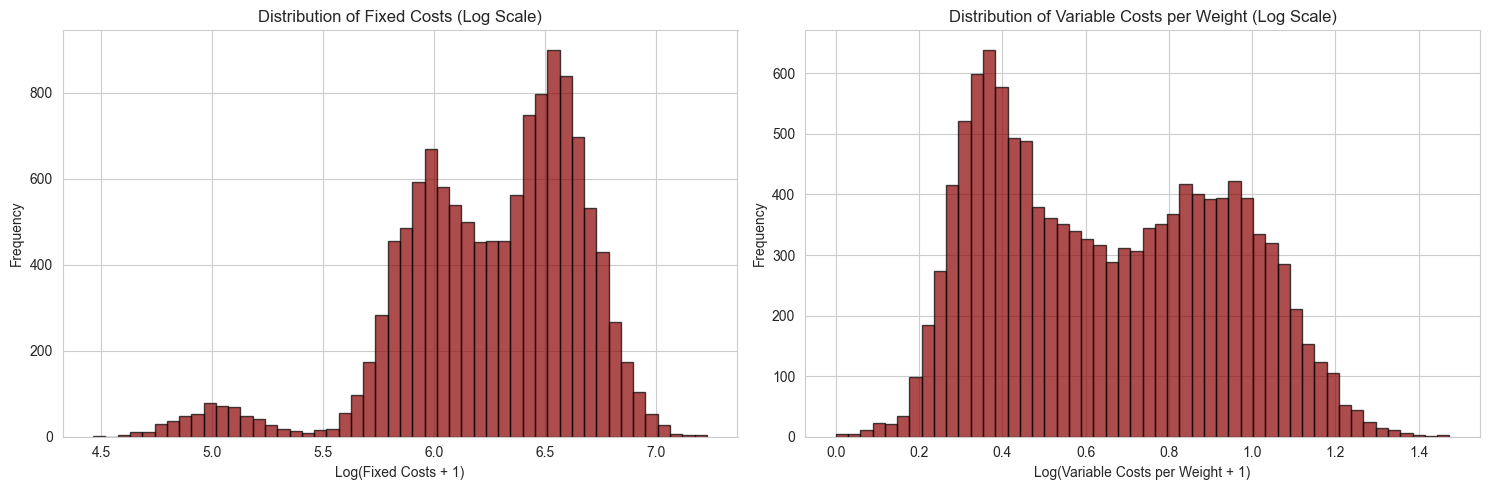

In [6]:
# Log scale for better visualization if needed
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

axes[0].hist(np.log1p(supplier_to_warehouse_df['fixed_costs']), bins=50, edgecolor='black', alpha=0.7, color='darkred')
axes[0].set_xlabel('Log(Fixed Costs + 1)')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution of Fixed Costs (Log Scale)')

axes[1].hist(np.log1p(supplier_to_warehouse_df['variable_costs_per_weight']), bins=50, edgecolor='black', alpha=0.7, color='darkred')
axes[1].set_xlabel('Log(Variable Costs per Weight + 1)')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Distribution of Variable Costs per Weight (Log Scale)')

plt.tight_layout()
plt.show()

## 2. Distribution of SKU Weights and Unit Costs

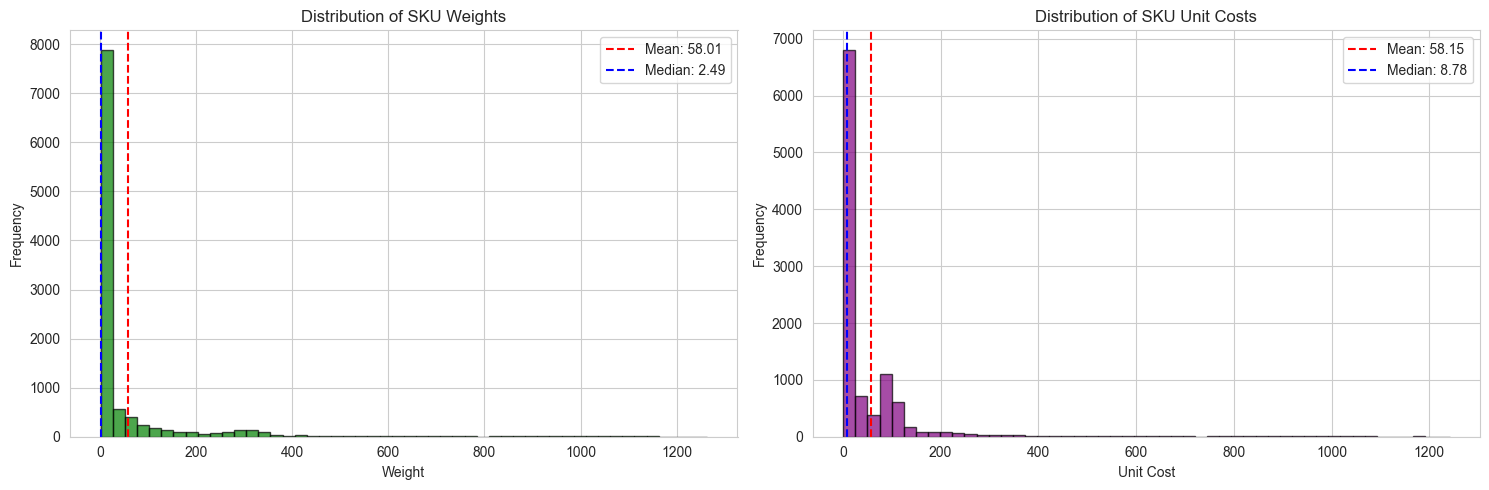

SKU Statistics:
Weight - Mean: 58.01, Std: 153.88
Weight - Min: 0.69, Max: 1263.75
Weight - 25th: 1.17, 50th: 2.49, 75th: 27.72
Unit Cost - Mean: 58.15, Std: 137.29
Unit Cost - Min: 0.66, Max: 1241.57
Unit Cost - 25th: 1.90, 50th: 8.78, 75th: 77.21


In [7]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Weight distribution
axes[0].hist(skus_df['weight'], bins=50, edgecolor='black', alpha=0.7, color='green')
axes[0].set_xlabel('Weight')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution of SKU Weights')
axes[0].axvline(skus_df['weight'].mean(), color='r', linestyle='--', label=f'Mean: {skus_df["weight"].mean():.2f}')
axes[0].axvline(skus_df['weight'].median(), color='b', linestyle='--', label=f'Median: {skus_df["weight"].median():.2f}')
axes[0].legend()

# Unit cost distribution
axes[1].hist(skus_df['unitcost'], bins=50, edgecolor='black', alpha=0.7, color='purple')
axes[1].set_xlabel('Unit Cost')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Distribution of SKU Unit Costs')
axes[1].axvline(skus_df['unitcost'].mean(), color='r', linestyle='--', label=f'Mean: {skus_df["unitcost"].mean():.2f}')
axes[1].axvline(skus_df['unitcost'].median(), color='b', linestyle='--', label=f'Median: {skus_df["unitcost"].median():.2f}')
axes[1].legend()

plt.tight_layout()
plt.show()

# Print statistics
print("SKU Statistics:")
print(f"Weight - Mean: {skus_df['weight'].mean():.2f}, Std: {skus_df['weight'].std():.2f}")
print(f"Weight - Min: {skus_df['weight'].min():.2f}, Max: {skus_df['weight'].max():.2f}")
print(f"Weight - 25th: {skus_df['weight'].quantile(0.25):.2f}, 50th: {skus_df['weight'].quantile(0.50):.2f}, 75th: {skus_df['weight'].quantile(0.75):.2f}")
print(f"Unit Cost - Mean: {skus_df['unitcost'].mean():.2f}, Std: {skus_df['unitcost'].std():.2f}")
print(f"Unit Cost - Min: {skus_df['unitcost'].min():.2f}, Max: {skus_df['unitcost'].max():.2f}")
print(f"Unit Cost - 25th: {skus_df['unitcost'].quantile(0.25):.2f}, 50th: {skus_df['unitcost'].quantile(0.50):.2f}, 75th: {skus_df['unitcost'].quantile(0.75):.2f}")


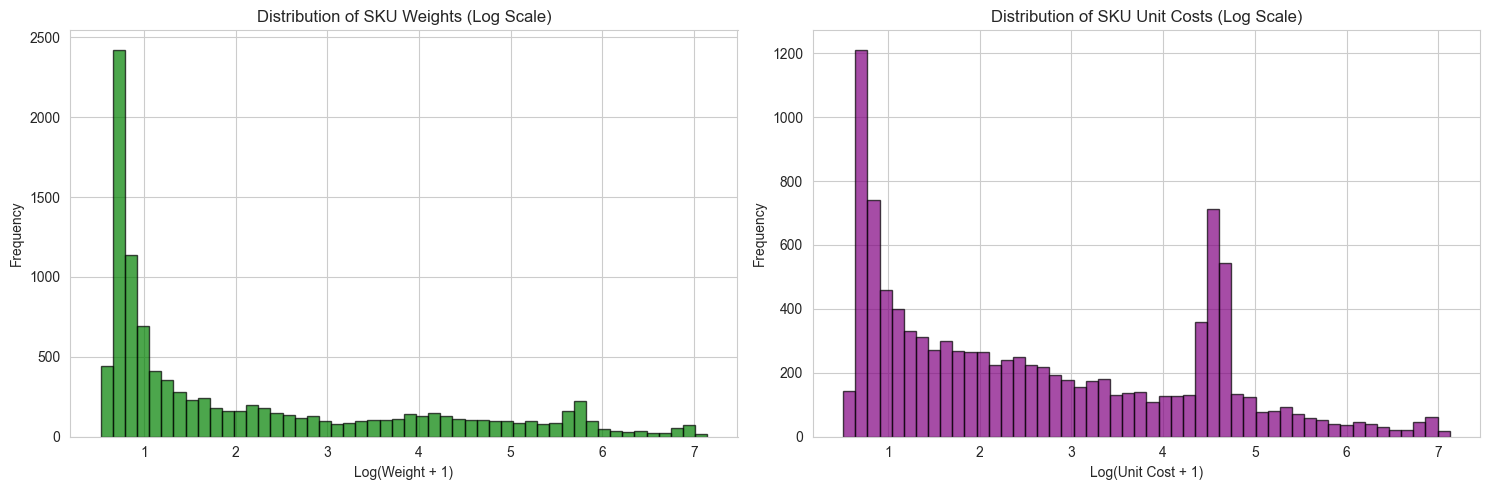

In [8]:
# Log scale for better visualization if needed
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

axes[0].hist(np.log1p(skus_df['weight']), bins=50, edgecolor='black', alpha=0.7, color='green')
axes[0].set_xlabel('Log(Weight + 1)')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution of SKU Weights (Log Scale)')

axes[1].hist(np.log1p(skus_df['unitcost']), bins=50, edgecolor='black', alpha=0.7, color='purple')
axes[1].set_xlabel('Log(Unit Cost + 1)')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Distribution of SKU Unit Costs (Log Scale)')

plt.tight_layout()
plt.show()


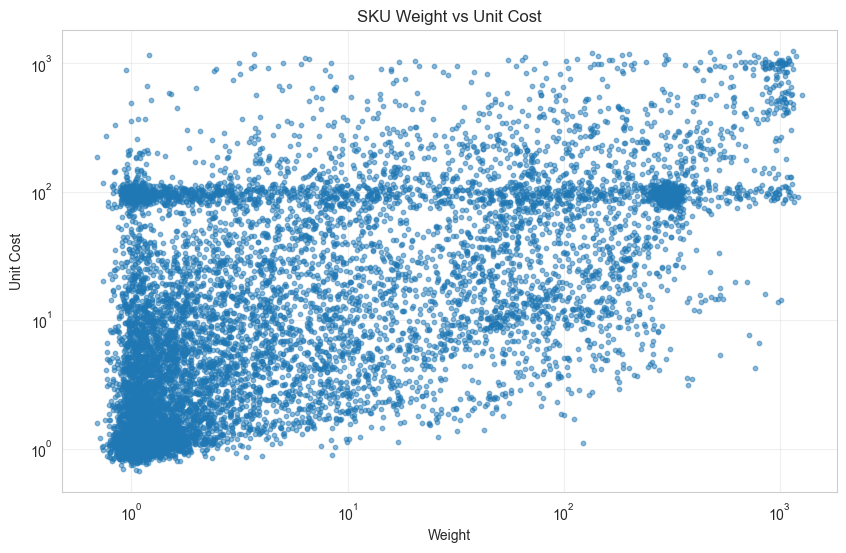

Correlation between Weight and Unit Cost: 0.5197


In [9]:
# Scatter plot: Weight vs Unit Cost
plt.figure(figsize=(10, 6))
plt.scatter(skus_df['weight'], skus_df['unitcost'], alpha=0.5, s=10)
plt.xlabel('Weight')
plt.ylabel('Unit Cost')
plt.title('SKU Weight vs Unit Cost')
plt.xscale('log')
plt.yscale('log')
plt.grid(True, alpha=0.3)
plt.show()

# Correlation
correlation = skus_df['weight'].corr(skus_df['unitcost'])
print(f"Correlation between Weight and Unit Cost: {correlation:.4f}")


## 3. Distribution of SKUs per Supplier

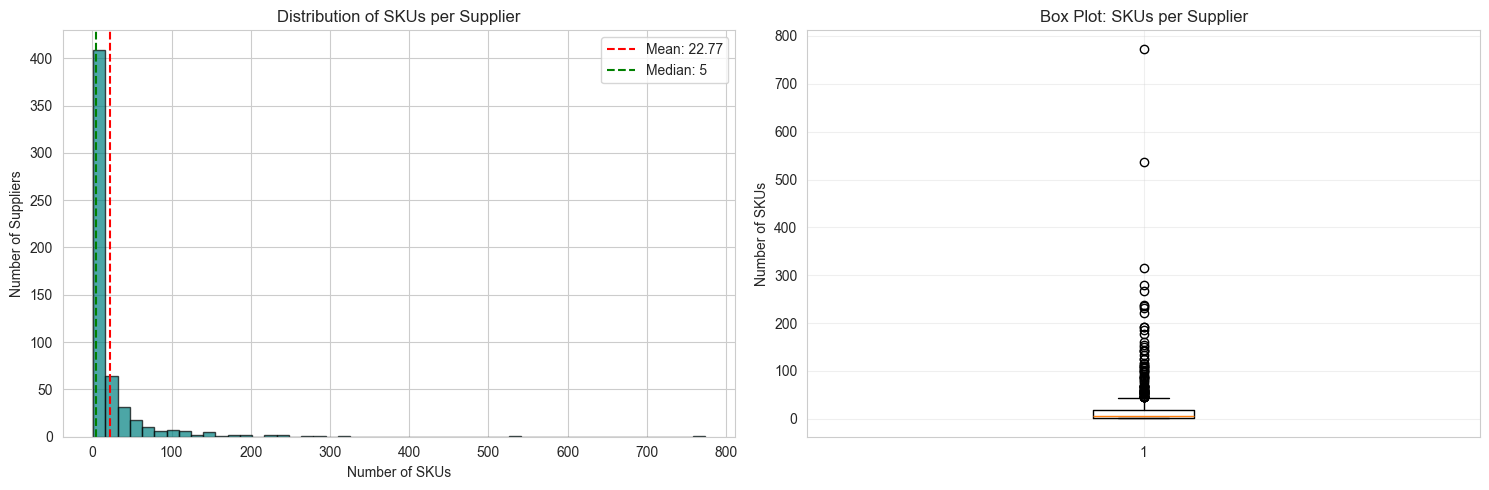

SKUs per Supplier Statistics:
Mean: 22.77
Median: 5
Std: 55.41
Min: 1
Max: 773
Total suppliers: 572
Suppliers with 1 SKU: 123
Suppliers with >10 SKUs: 209


In [10]:
# Count SKUs per supplier
skus_per_supplier = skus_per_supplier_df.groupby('supplierid').size().reset_index(name='n_skus')

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Histogram
axes[0].hist(skus_per_supplier['n_skus'], bins=50, edgecolor='black', alpha=0.7, color='teal')
axes[0].set_xlabel('Number of SKUs')
axes[0].set_ylabel('Number of Suppliers')
#axes[0].set_yscale('log')
axes[0].set_title('Distribution of SKUs per Supplier')
axes[0].axvline(skus_per_supplier['n_skus'].mean(), color='r', linestyle='--', label=f'Mean: {skus_per_supplier["n_skus"].mean():.2f}')
axes[0].axvline(skus_per_supplier['n_skus'].median(), color='g', linestyle='--', label=f'Median: {skus_per_supplier["n_skus"].median():.0f}')
axes[0].legend()

# Box plot
axes[1].boxplot(skus_per_supplier['n_skus'], vert=True)
axes[1].set_ylabel('Number of SKUs')
axes[1].set_title('Box Plot: SKUs per Supplier')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print statistics
print("SKUs per Supplier Statistics:")
print(f"Mean: {skus_per_supplier['n_skus'].mean():.2f}")
print(f"Median: {skus_per_supplier['n_skus'].median():.0f}")
print(f"Std: {skus_per_supplier['n_skus'].std():.2f}")
print(f"Min: {skus_per_supplier['n_skus'].min()}")
print(f"Max: {skus_per_supplier['n_skus'].max()}")
print(f"Total suppliers: {len(skus_per_supplier)}")
print(f"Suppliers with 1 SKU: {(skus_per_supplier['n_skus'] == 1).sum()}")
print(f"Suppliers with >10 SKUs: {(skus_per_supplier['n_skus'] > 10).sum()}")


## 4. Amount of Orders per Day ID


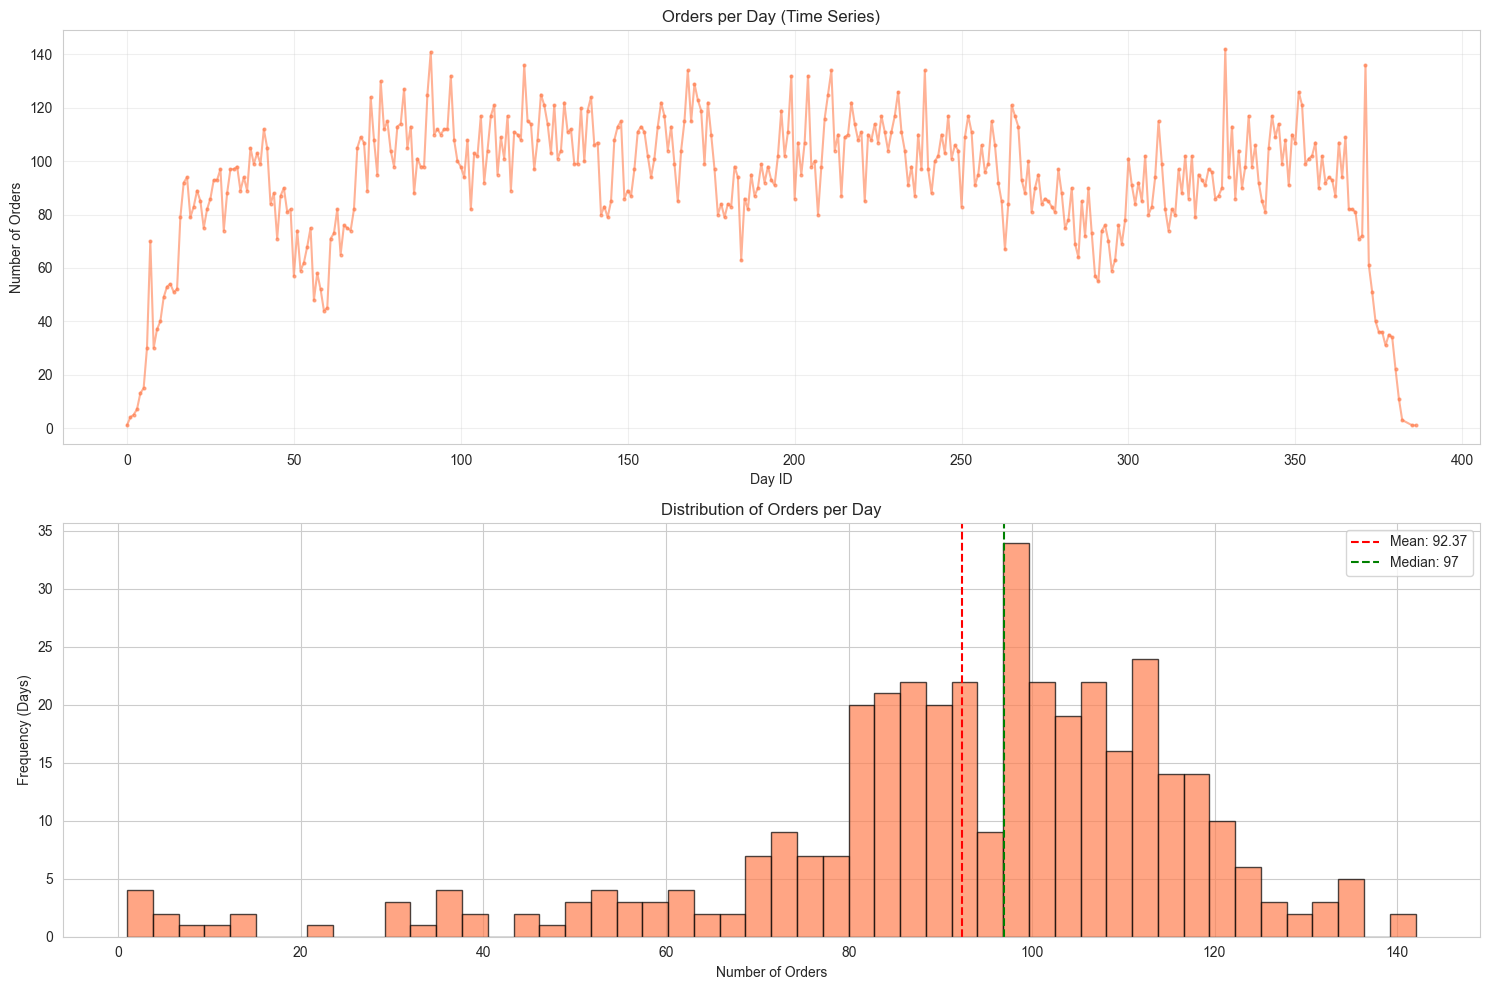

Orders per Day Statistics:
Total days: 385
Day range: 0 to 386
Mean orders per day: 92.37
Median orders per day: 97
Std: 24.94
Min: 1
Max: 142
Days with 0 orders: 0
Days with >100 orders: 157


In [11]:
# Count orders per day
orders_per_day = orders_df.groupby('day_id').size().reset_index(name='n_orders')

fig, axes = plt.subplots(2, 1, figsize=(15, 10))

# Time series plot
axes[0].plot(orders_per_day['day_id'], orders_per_day['n_orders'], marker='o', markersize=2, alpha=0.6, color='coral')
axes[0].set_xlabel('Day ID')
axes[0].set_ylabel('Number of Orders')
axes[0].set_title('Orders per Day (Time Series)')
axes[0].grid(True, alpha=0.3)

# Histogram
axes[1].hist(orders_per_day['n_orders'], bins=50, edgecolor='black', alpha=0.7, color='coral')
axes[1].set_xlabel('Number of Orders')
axes[1].set_ylabel('Frequency (Days)')
axes[1].set_title('Distribution of Orders per Day')
axes[1].axvline(orders_per_day['n_orders'].mean(), color='r', linestyle='--', label=f'Mean: {orders_per_day["n_orders"].mean():.2f}')
axes[1].axvline(orders_per_day['n_orders'].median(), color='g', linestyle='--', label=f'Median: {orders_per_day["n_orders"].median():.0f}')
axes[1].legend()

plt.tight_layout()
plt.show()

# Print statistics
print("Orders per Day Statistics:")
print(f"Total days: {len(orders_per_day)}")
print(f"Day range: {orders_per_day['day_id'].min()} to {orders_per_day['day_id'].max()}")
print(f"Mean orders per day: {orders_per_day['n_orders'].mean():.2f}")
print(f"Median orders per day: {orders_per_day['n_orders'].median():.0f}")
print(f"Std: {orders_per_day['n_orders'].std():.2f}")
print(f"Min: {orders_per_day['n_orders'].min()}")
print(f"Max: {orders_per_day['n_orders'].max()}")
print(f"Days with 0 orders: {(orders_per_day['n_orders'] == 0).sum()}")
print(f"Days with >100 orders: {(orders_per_day['n_orders'] > 100).sum()}")



## 5. Amount of SKUs per Order

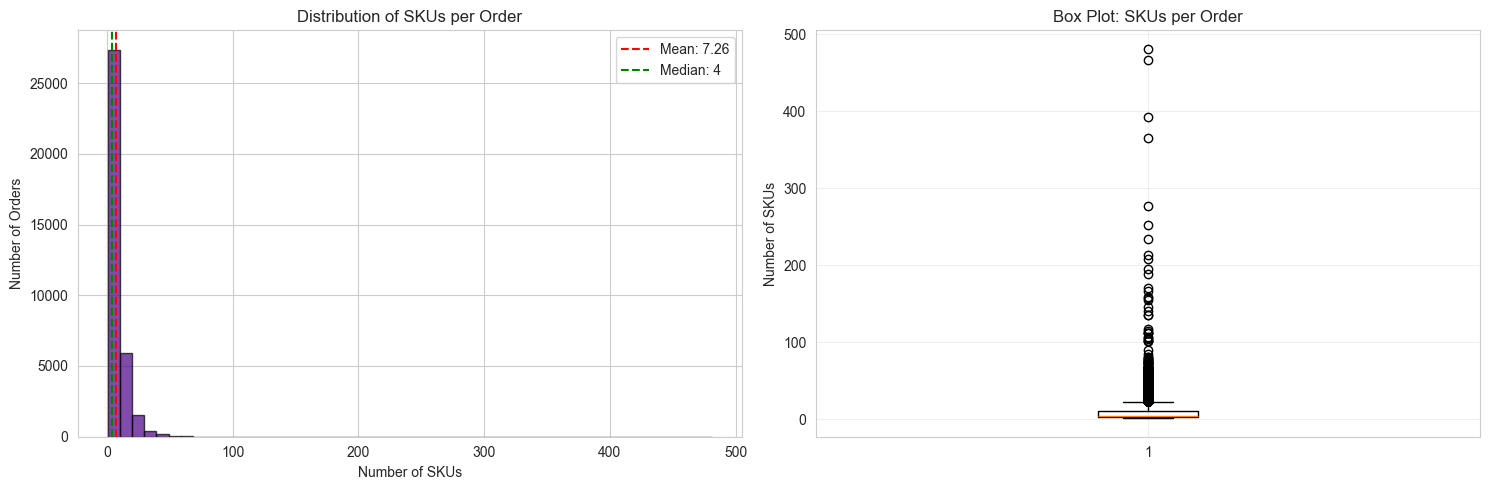

SKUs per Order Statistics:
Mean: 7.26
Median: 4
Std: 9.95
Min: 1
Max: 481
Orders with 1 SKU: 7735 (21.8%)
Orders with >10 SKUs: 8205 (23.1%)


In [12]:
# Count SKUs per order
skus_per_order = order_sku_demand_df.groupby('salesorderid').size().reset_index(name='n_skus')

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Histogram
axes[0].hist(skus_per_order['n_skus'], bins=50, edgecolor='black', alpha=0.7, color='indigo')
axes[0].set_xlabel('Number of SKUs')
axes[0].set_ylabel('Number of Orders')
axes[0].set_title('Distribution of SKUs per Order')
axes[0].axvline(skus_per_order['n_skus'].mean(), color='r', linestyle='--', label=f'Mean: {skus_per_order["n_skus"].mean():.2f}')
axes[0].axvline(skus_per_order['n_skus'].median(), color='g', linestyle='--', label=f'Median: {skus_per_order["n_skus"].median():.0f}')
axes[0].legend()

# Box plot
axes[1].boxplot(skus_per_order['n_skus'], vert=True)
axes[1].set_ylabel('Number of SKUs') 
axes[1].set_title('Box Plot: SKUs per Order')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print statistics
print("SKUs per Order Statistics:")
print(f"Mean: {skus_per_order['n_skus'].mean():.2f}")
print(f"Median: {skus_per_order['n_skus'].median():.0f}")
print(f"Std: {skus_per_order['n_skus'].std():.2f}")
print(f"Min: {skus_per_order['n_skus'].min()}")
print(f"Max: {skus_per_order['n_skus'].max()}")
print(f"Orders with 1 SKU: {(skus_per_order['n_skus'] == 1).sum()} ({(skus_per_order['n_skus'] == 1).sum() / len(skus_per_order) * 100:.1f}%)")
print(f"Orders with >10 SKUs: {(skus_per_order['n_skus'] > 10).sum()} ({(skus_per_order['n_skus'] > 10).sum() / len(skus_per_order) * 100:.1f}%)")


## 6. Relation between Available Timesteps and n_skus

In [13]:
# Import the preprocessor to simulate filtering
import sys
sys.path.append('../..')
from src.data.preprocessor import RawDataLoader, DataSelector, DataProcessor
import numpy as np

# Test different n_skus values
n_skus_values = [10, 25, 50, 100, 200, 500, 1000, 2000, 5000]
n_warehouses = 24  # All warehouses
n_regions = 57  # All regions

results = []

print("Analyzing timesteps for different n_skus values...")
print("This may take a while...")

for n_skus in n_skus_values:
    try:
        # Load data
        loader = RawDataLoader(str(RAW_DATA_PATH))
        loader.load_all()
        
        # Get available SKUs
        available_sku_ids = loader.order_sku_demand_df['itemid'].unique().tolist()
        
        if len(available_sku_ids) < n_skus:
            print(f"Skipping n_skus={n_skus}: only {len(available_sku_ids)} SKUs available")
            continue
        
        # Select subsets
        selector = DataSelector(n_skus, n_warehouses, n_regions, selection_seed=42)
        selector.select_skus(available_sku_ids)
        selector.select_warehouses(loader.warehouses_df['nodeid'].unique().tolist())
        selector.select_regions(loader.regions_df['regionid'].unique().tolist())
        selector.select_suppliers(selector.selected_sku_ids, loader.skus_per_supplier_df)
        
        # Process data
        processor = DataProcessor(
            selected_sku_ids=selector.selected_sku_ids,
            selected_warehouse_ids=selector.selected_warehouse_ids,
            selected_region_ids=selector.selected_region_ids,
            selected_supplier_ids=selector.selected_supplier_ids,
            warehouse_to_region_df=loader.warehouse_to_region_df,
            supplier_to_warehouse_df=loader.supplier_to_warehouse_df,
            orders_df=loader.orders_df,
            order_sku_demand_df=loader.order_sku_demand_df,
            skus_df=loader.skus_df,
            regions_df=loader.regions_df,
        )
        
        processed_data = processor.create_processed_demand_data()
        
        n_timesteps = processed_data['timestep'].nunique()
        n_orders = processed_data['order_id'].nunique()
        
        results.append({
            'n_skus': n_skus,
            'n_timesteps': n_timesteps,
            'n_orders': n_orders,
            'avg_orders_per_timestep': n_orders / n_timesteps if n_timesteps > 0 else 0
        })
        
        print(f"n_skus={n_skus}: {n_timesteps} timesteps, {n_orders} orders")
        
    except Exception as e:
        print(f"Error for n_skus={n_skus}: {e}")
        continue

results_df = pd.DataFrame(results)


Analyzing timesteps for different n_skus values...
This may take a while...
n_skus=10: 68 timesteps, 79 orders
n_skus=25: 107 timesteps, 122 orders
n_skus=50: 204 timesteps, 287 orders
n_skus=100: 284 timesteps, 545 orders
n_skus=200: 379 timesteps, 4692 orders
n_skus=500: 382 timesteps, 11278 orders
n_skus=1000: 382 timesteps, 16623 orders
n_skus=2000: 384 timesteps, 28311 orders
n_skus=5000: 384 timesteps, 34357 orders


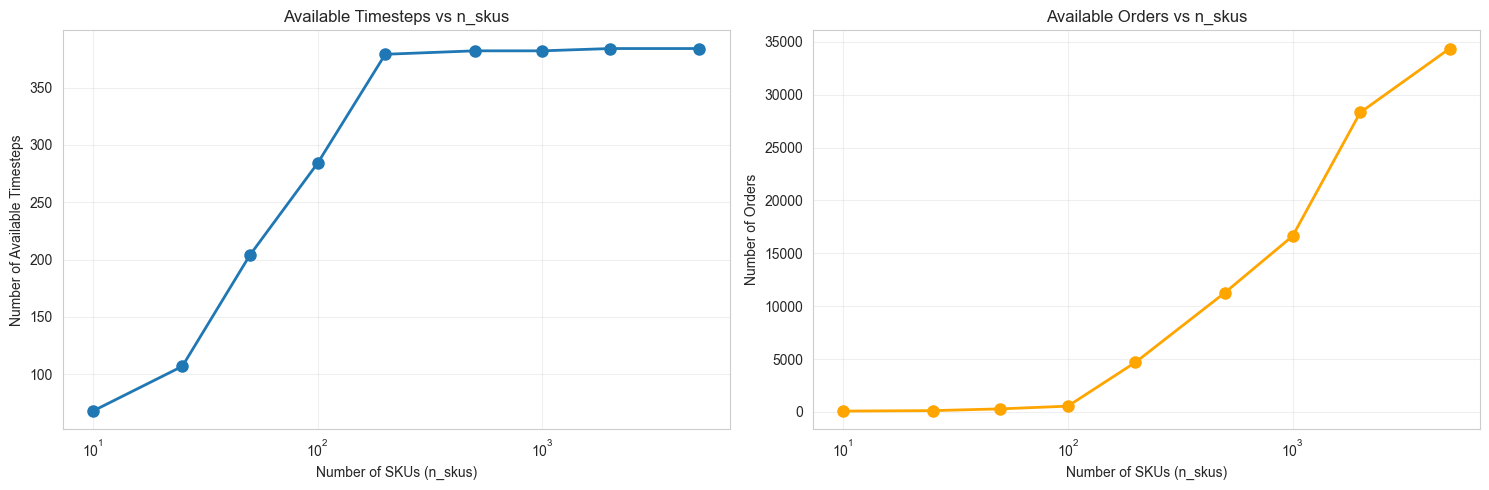


Results:
 n_skus  n_timesteps  n_orders  avg_orders_per_timestep
     10           68        79                 1.161765
     25          107       122                 1.140187
     50          204       287                 1.406863
    100          284       545                 1.919014
    200          379      4692                12.379947
    500          382     11278                29.523560
   1000          382     16623                43.515707
   2000          384     28311                73.726562
   5000          384     34357                89.471354


In [14]:
# Plot results
if len(results_df) > 0:
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))
    
    # Timesteps vs n_skus
    axes[0].plot(results_df['n_skus'], results_df['n_timesteps'], marker='o', linewidth=2, markersize=8)
    axes[0].set_xlabel('Number of SKUs (n_skus)')
    axes[0].set_ylabel('Number of Available Timesteps')
    axes[0].set_title('Available Timesteps vs n_skus')
    axes[0].grid(True, alpha=0.3)
    axes[0].set_xscale('log')
    
    # Orders vs n_skus
    axes[1].plot(results_df['n_skus'], results_df['n_orders'], marker='o', linewidth=2, markersize=8, color='orange')
    axes[1].set_xlabel('Number of SKUs (n_skus)')
    axes[1].set_ylabel('Number of Orders')
    axes[1].set_title('Available Orders vs n_skus')
    axes[1].grid(True, alpha=0.3)
    axes[1].set_xscale('log')
    
    plt.tight_layout()
    plt.show()
    
    # Print table
    print("\nResults:")
    print(results_df.to_string(index=False))
else:
    print("No results to display")


## 7. Geographic Visualization


In [15]:
# Parameters to control visualization
n_skus = 100  # Set to None to show all suppliers, or an integer to filter suppliers by selected SKUs
n_warehouses = 10  # Set to None to show all, or an integer to show that many
n_regions = 10     # Set to None to show all, or an integer to show that many
n_suppliers_sample = 500  # Number of suppliers to sample (to avoid overcrowding, only used if n_skus is None)

try:
    import folium
    from folium import plugins
    from IPython.display import display, HTML
    
    # Filter suppliers based on n_skus if specified
    if n_skus is not None:
        # Get available SKUs from order data
        available_sku_ids = order_sku_demand_df['itemid'].unique().tolist()
        
        if len(available_sku_ids) < n_skus:
            print(f"Warning: Only {len(available_sku_ids)} SKUs available, but n_skus={n_skus}. Using all available SKUs.")
            selected_sku_ids = available_sku_ids
        else:
            # Select n_skus SKUs (same method as in section 6)
            import numpy as np
            rng = np.random.default_rng(42)
            selected_sku_ids = rng.choice(available_sku_ids, size=n_skus, replace=False).tolist()
        
        # Find suppliers that supply the selected SKUs
        suppliers_for_selected_skus = skus_per_supplier_df[
            skus_per_supplier_df['itemid'].isin(selected_sku_ids)
        ]['supplierid'].unique()
        
        # Filter suppliers dataframe to only include those suppliers
        suppliers_to_plot = suppliers_df[suppliers_df['supplierid'].isin(suppliers_for_selected_skus)]
        
        print(f"Selected {len(selected_sku_ids)} SKUs")
        print(f"Found {len(suppliers_to_plot)} suppliers that supply these SKUs (out of {len(suppliers_df)} total)")
    else:
        # If n_skus is None, sample suppliers randomly
        suppliers_to_plot = suppliers_df.sample(min(n_suppliers_sample, len(suppliers_df)), random_state=42)
        print(f"Sampling {len(suppliers_to_plot)} suppliers (n_skus=None)")
    
    # Select warehouses and regions based on parameters
    if n_warehouses is None:
        warehouses_to_plot = warehouses_df
    else:
        warehouses_to_plot = warehouses_df.sample(min(n_warehouses, len(warehouses_df)), random_state=42)
        print(f"Showing {len(warehouses_to_plot)} out of {len(warehouses_df)} warehouses")
    
    if n_regions is None:
        regions_to_plot = regions_df
    else:
        regions_to_plot = regions_df.sample(min(n_regions, len(regions_df)), random_state=42)
        print(f"Showing {len(regions_to_plot)} out of {len(regions_df)} regions")
    
    # Create base map centered on selected coordinates
    avg_lat = (warehouses_to_plot['latitude'].mean() + regions_to_plot['latitude'].mean() + suppliers_to_plot['latitude'].mean()) / 3
    avg_lon = (warehouses_to_plot['longitude'].mean() + regions_to_plot['longitude'].mean() + suppliers_to_plot['longitude'].mean()) / 3
    
    m = folium.Map(location=[avg_lat, avg_lon], zoom_start=3)
    
    # Add warehouses
    for idx, row in warehouses_to_plot.iterrows():
        folium.CircleMarker(
            location=[row['latitude'], row['longitude']],
            radius=5,
            popup=f"Warehouse: {row['nodeid']}",
            color='blue',
            fill=True,
            fillColor='blue',
            fillOpacity=0.6
        ).add_to(m)
    
    # Add regions
    for idx, row in regions_to_plot.iterrows():
        folium.CircleMarker(
            location=[row['latitude'], row['longitude']],
            radius=3,
            popup=f"Region: {row['code']} ({row['city']})",
            color='green',
            fill=True,
            fillColor='green',
            fillOpacity=0.4
        ).add_to(m)
    
    # Add suppliers (filtered by n_skus if specified)
    for idx, row in suppliers_to_plot.iterrows():
        folium.CircleMarker(
            location=[row['latitude'], row['longitude']],
            radius=2,
            popup=f"Supplier: {row['supplierid']}",
            color='red',
            fill=True,
            fillColor='red',
            fillOpacity=0.3
        ).add_to(m)
    
    # Add legend
    sku_info = f" (for {n_skus} SKUs)" if n_skus is not None else ""
    legend_html = f'''
    <div style="position: fixed; 
                 bottom: 50px; left: 50px; width: 220px; height: 160px; 
                 background-color: white; z-index:9999; font-size:14px;
                 border:2px solid grey; border-radius: 5px; padding: 10px">
    <p><b>Legend</b></p>
    <p><span style="color:blue;">●</span> Warehouses ({len(warehouses_to_plot)})</p>
    <p><span style="color:green;">●</span> Regions ({len(regions_to_plot)})</p>
    <p><span style="color:red;">●</span> Suppliers ({len(suppliers_to_plot)}){sku_info}</p>
    </div>
    '''
    m.get_root().html.add_child(folium.Element(legend_html))
    
    # Save map
    m.save('geographic_map.html')
    print(f"Map saved as 'geographic_map.html'")
    print(f"Total locations: {len(warehouses_to_plot)} warehouses, {len(regions_to_plot)} regions, {len(suppliers_to_plot)} suppliers")
    
    # Display in notebook - using explicit display import
    display(HTML(m._repr_html_()))
    
except ImportError:
    print("folium not installed. Creating static plot instead...")
    
    # Filter suppliers based on n_skus if specified (same logic as above)
    if n_skus is not None:
        # Get available SKUs from order data
        available_sku_ids = order_sku_demand_df['itemid'].unique().tolist()
        
        if len(available_sku_ids) < n_skus:
            print(f"Warning: Only {len(available_sku_ids)} SKUs available, but n_skus={n_skus}. Using all available SKUs.")
            selected_sku_ids = available_sku_ids
        else:
            # Select n_skus SKUs (same method as in section 6)
            import numpy as np
            rng = np.random.default_rng(42)
            selected_sku_ids = rng.choice(available_sku_ids, size=n_skus, replace=False).tolist()
        
        # Find suppliers that supply the selected SKUs
        suppliers_for_selected_skus = skus_per_supplier_df[
            skus_per_supplier_df['itemid'].isin(selected_sku_ids)
        ]['supplierid'].unique()
        
        # Filter suppliers dataframe to only include those suppliers
        suppliers_to_plot = suppliers_df[suppliers_df['supplierid'].isin(suppliers_for_selected_skus)]
        
        print(f"Selected {len(selected_sku_ids)} SKUs")
        print(f"Found {len(suppliers_to_plot)} suppliers that supply these SKUs (out of {len(suppliers_df)} total)")
    else:
        # If n_skus is None, sample suppliers randomly
        suppliers_to_plot = suppliers_df.sample(min(n_suppliers_sample, len(suppliers_df)), random_state=42)
        print(f"Sampling {len(suppliers_to_plot)} suppliers (n_skus=None)")
    
    # Select warehouses and regions based on parameters (same logic as above)
    if n_warehouses is None:
        warehouses_to_plot = warehouses_df
    else:
        warehouses_to_plot = warehouses_df.sample(min(n_warehouses, len(warehouses_df)), random_state=42)
        print(f"Showing {len(warehouses_to_plot)} out of {len(warehouses_df)} warehouses")
    
    if n_regions is None:
        regions_to_plot = regions_df
    else:
        regions_to_plot = regions_df.sample(min(n_regions, len(regions_df)), random_state=42)
        print(f"Showing {len(regions_to_plot)} out of {len(regions_df)} regions")
    
    # Static plot using matplotlib
    fig, ax = plt.subplots(figsize=(15, 10))
    
    # Plot suppliers (filtered by n_skus if specified)
    sku_label = f" (for {n_skus} SKUs)" if n_skus is not None else ""
    ax.scatter(suppliers_to_plot['longitude'], suppliers_to_plot['latitude'], 
               c='red', s=5, alpha=0.3, label=f'Suppliers ({len(suppliers_to_plot)}){sku_label}')
    
    # Plot warehouses
    ax.scatter(warehouses_to_plot['longitude'], warehouses_to_plot['latitude'], 
               c='blue', s=100, marker='s', label=f'Warehouses ({len(warehouses_to_plot)})', edgecolors='black', linewidths=1)
    
    # Plot regions
    ax.scatter(regions_to_plot['longitude'], regions_to_plot['latitude'], 
               c='green', s=50, marker='^', label=f'Regions ({len(regions_to_plot)})', edgecolors='black', linewidths=1)
    
    title_suffix = f" (Suppliers filtered by {n_skus} SKUs)" if n_skus is not None else ""
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    ax.set_title(f'Geographic Distribution of Warehouses, Regions, and Suppliers{title_suffix}')
    ax.legend()
    ax.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    print(f"Total locations: {len(warehouses_to_plot)} warehouses, {len(regions_to_plot)} regions, {len(suppliers_to_plot)} suppliers")


Selected 100 SKUs
Found 71 suppliers that supply these SKUs (out of 572 total)
Showing 10 out of 24 warehouses
Showing 10 out of 57 regions
Map saved as 'geographic_map.html'
Total locations: 10 warehouses, 10 regions, 71 suppliers


## 8. Additional Insights

### 8.1 Distribution of SKU Quantities per Order


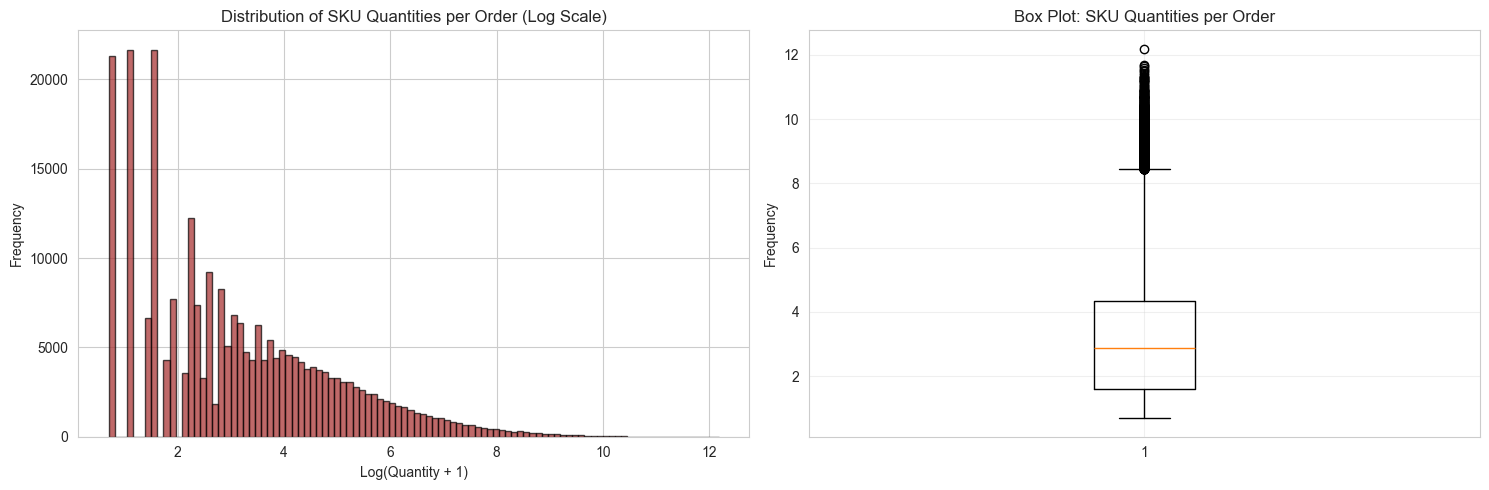

Order Quantity Statistics:
Mean: 215.36
Median: 17
Std: 1450.56
Min: 1
Max: 195392

Quantiles:
25th percentile (Q1): 4.00
50th percentile (Median): 17.00
75th percentile (Q3): 76.00
90th percentile: 309.00
95th percentile: 727.00
99th percentile: 3641.00


In [16]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Quantity distribution
#axes[0].hist(order_sku_demand_df['quantity'], bins=100, edgecolor='black', alpha=0.7, color='brown')
#axes[0].set_xlabel('Quantity')
#axes[0].set_ylabel('Frequency')
#axes[0].set_title('Distribution of SKU Quantities per Order')
#axes[0].axvline(order_sku_demand_df['quantity'].mean(), color='r', linestyle='--', label=f'Mean: {order_sku_demand_df["quantity"].mean():.2f}')
#axes[0].axvline(order_sku_demand_df['quantity'].median(), color='g', linestyle='--', label=f'Median: {order_sku_demand_df["quantity"].median():.0f}')
#axes[0].legend()

# Log scale
axes[0].hist(np.log1p(order_sku_demand_df['quantity']), bins=100, edgecolor='black', alpha=0.7, color='brown')
axes[0].set_xlabel('Log(Quantity + 1)')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution of SKU Quantities per Order (Log Scale)')

# Box Plot
axes[1].boxplot(np.log1p(order_sku_demand_df['quantity']), vert=True)
axes[1].set_ylabel('Frequency') 
axes[1].set_title('Box Plot: SKU Quantities per Order')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("Order Quantity Statistics:")
print(f"Mean: {order_sku_demand_df['quantity'].mean():.2f}")
print(f"Median: {order_sku_demand_df['quantity'].median():.0f}")
print(f"Std: {order_sku_demand_df['quantity'].std():.2f}")
print(f"Min: {order_sku_demand_df['quantity'].min()}")
print(f"Max: {order_sku_demand_df['quantity'].max()}")

# Add quantiles
quantiles = order_sku_demand_df['quantity'].quantile([0.25, 0.5, 0.75, 0.9, 0.95, 0.99])
print(f"\nQuantiles:")
print(f"25th percentile (Q1): {quantiles[0.25]:.2f}")
print(f"50th percentile (Median): {quantiles[0.5]:.2f}")
print(f"75th percentile (Q3): {quantiles[0.75]:.2f}")
print(f"90th percentile: {quantiles[0.9]:.2f}")
print(f"95th percentile: {quantiles[0.95]:.2f}")
print(f"99th percentile: {quantiles[0.99]:.2f}")


### 8.2 Most Popular SKUs


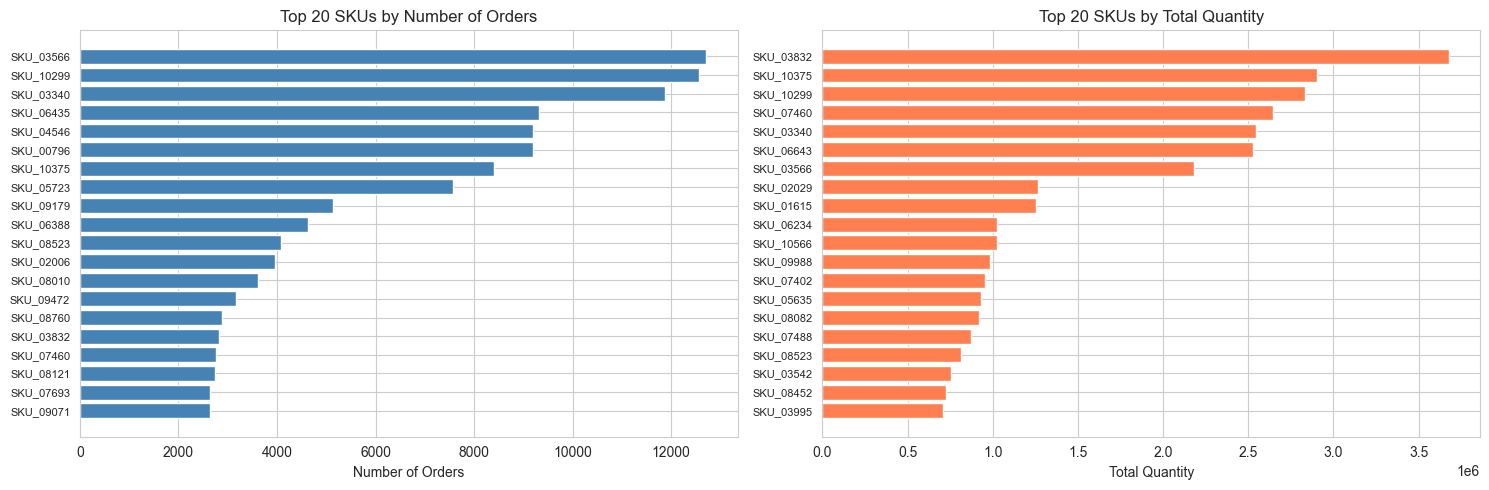


Top 10 SKUs by number of orders:
   itemid  n_orders  total_quantity
SKU_03566     12713         2182030
SKU_10299     12566         2834823
SKU_03340     11869         2545246
SKU_06435      9321           53605
SKU_04546      9191           50984
SKU_00796      9189           51230
SKU_10375      8414         2900286
SKU_05723      7567           45565
SKU_09179      5127           25929
SKU_06388      4635          157225


In [17]:
# Count orders per SKU
orders_per_sku = order_sku_demand_df.groupby('itemid').agg({
    'salesorderid': 'nunique',
    'quantity': 'sum'
}).reset_index()
orders_per_sku.columns = ['itemid', 'n_orders', 'total_quantity']
orders_per_sku = orders_per_sku.sort_values('n_orders', ascending=False)

# Top 20 SKUs by order count
top_20 = orders_per_sku.head(20)

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

axes[0].barh(range(len(top_20)), top_20['n_orders'], color='steelblue')
axes[0].set_yticks(range(len(top_20)))
axes[0].set_yticklabels(top_20['itemid'], fontsize=8)
axes[0].set_xlabel('Number of Orders')
axes[0].set_title('Top 20 SKUs by Number of Orders')
axes[0].invert_yaxis()

# Top 20 SKUs by total quantity
top_20_qty = orders_per_sku.sort_values('total_quantity', ascending=False).head(20)
axes[1].barh(range(len(top_20_qty)), top_20_qty['total_quantity'], color='coral')
axes[1].set_yticks(range(len(top_20_qty)))
axes[1].set_yticklabels(top_20_qty['itemid'], fontsize=8)
axes[1].set_xlabel('Total Quantity')
axes[1].set_title('Top 20 SKUs by Total Quantity')
axes[1].invert_yaxis()

plt.tight_layout()
plt.show()

print("\nTop 10 SKUs by number of orders:")
print(top_20.head(10).to_string(index=False))


### 8.2.1 SKU Popularity by Timestep

Analyze SKU popularity using timestep-level metrics:
- **Average ordered quantity per timestep**: Mean daily demand for each SKU
- **Number of active timesteps**: How many different days each SKU was ordered (at least one unit)


In [18]:
# Merge orders with SKU demand to get day_id per SKU demand
sku_demand_with_day = order_sku_demand_df.merge(orders_df[['salesorderid', 'day_id']], on='salesorderid', how='left')

# Calculate metrics per SKU
sku_timestep_stats = sku_demand_with_day.groupby('itemid').agg({
    'quantity': ['sum', 'mean'],  # total and mean per order
    'day_id': 'nunique'  # number of unique timesteps
}).reset_index()

sku_timestep_stats.columns = ['itemid', 'total_quantity', 'avg_quantity_per_order', 'n_active_timesteps']

# Calculate average quantity per timestep (total quantity / number of timesteps with orders)
sku_timestep_stats['avg_quantity_per_timestep'] = sku_timestep_stats['total_quantity'] / sku_timestep_stats['n_active_timesteps']

# Sort by average quantity per timestep
sku_timestep_stats = sku_timestep_stats.sort_values('avg_quantity_per_timestep', ascending=False)

print(f"Total SKUs analyzed: {len(sku_timestep_stats)}")
print(f"Total timesteps (days): {sku_demand_with_day['day_id'].nunique()}")
print("\nTop 20 SKUs by average quantity per timestep:")
print(sku_timestep_stats.head(20).to_string(index=False))


Total SKUs analyzed: 5115
Total timesteps (days): 385

Top 20 SKUs by average quantity per timestep:
   itemid  total_quantity  avg_quantity_per_order  n_active_timesteps  avg_quantity_per_timestep
SKU_02786          222348            74116.000000                   3               74116.000000
SKU_07940           58089            58089.000000                   1               58089.000000
SKU_05179          115004            38334.666667                   3               38334.666667
SKU_03822           89559            29853.000000                   3               29853.000000
SKU_01171          172257            28709.500000                   6               28709.500000
SKU_01828           26926            26926.000000                   1               26926.000000
SKU_05423          116674            23334.800000                   5               23334.800000
SKU_09468           18254            18254.000000                   1               18254.000000
SKU_06494           23866 

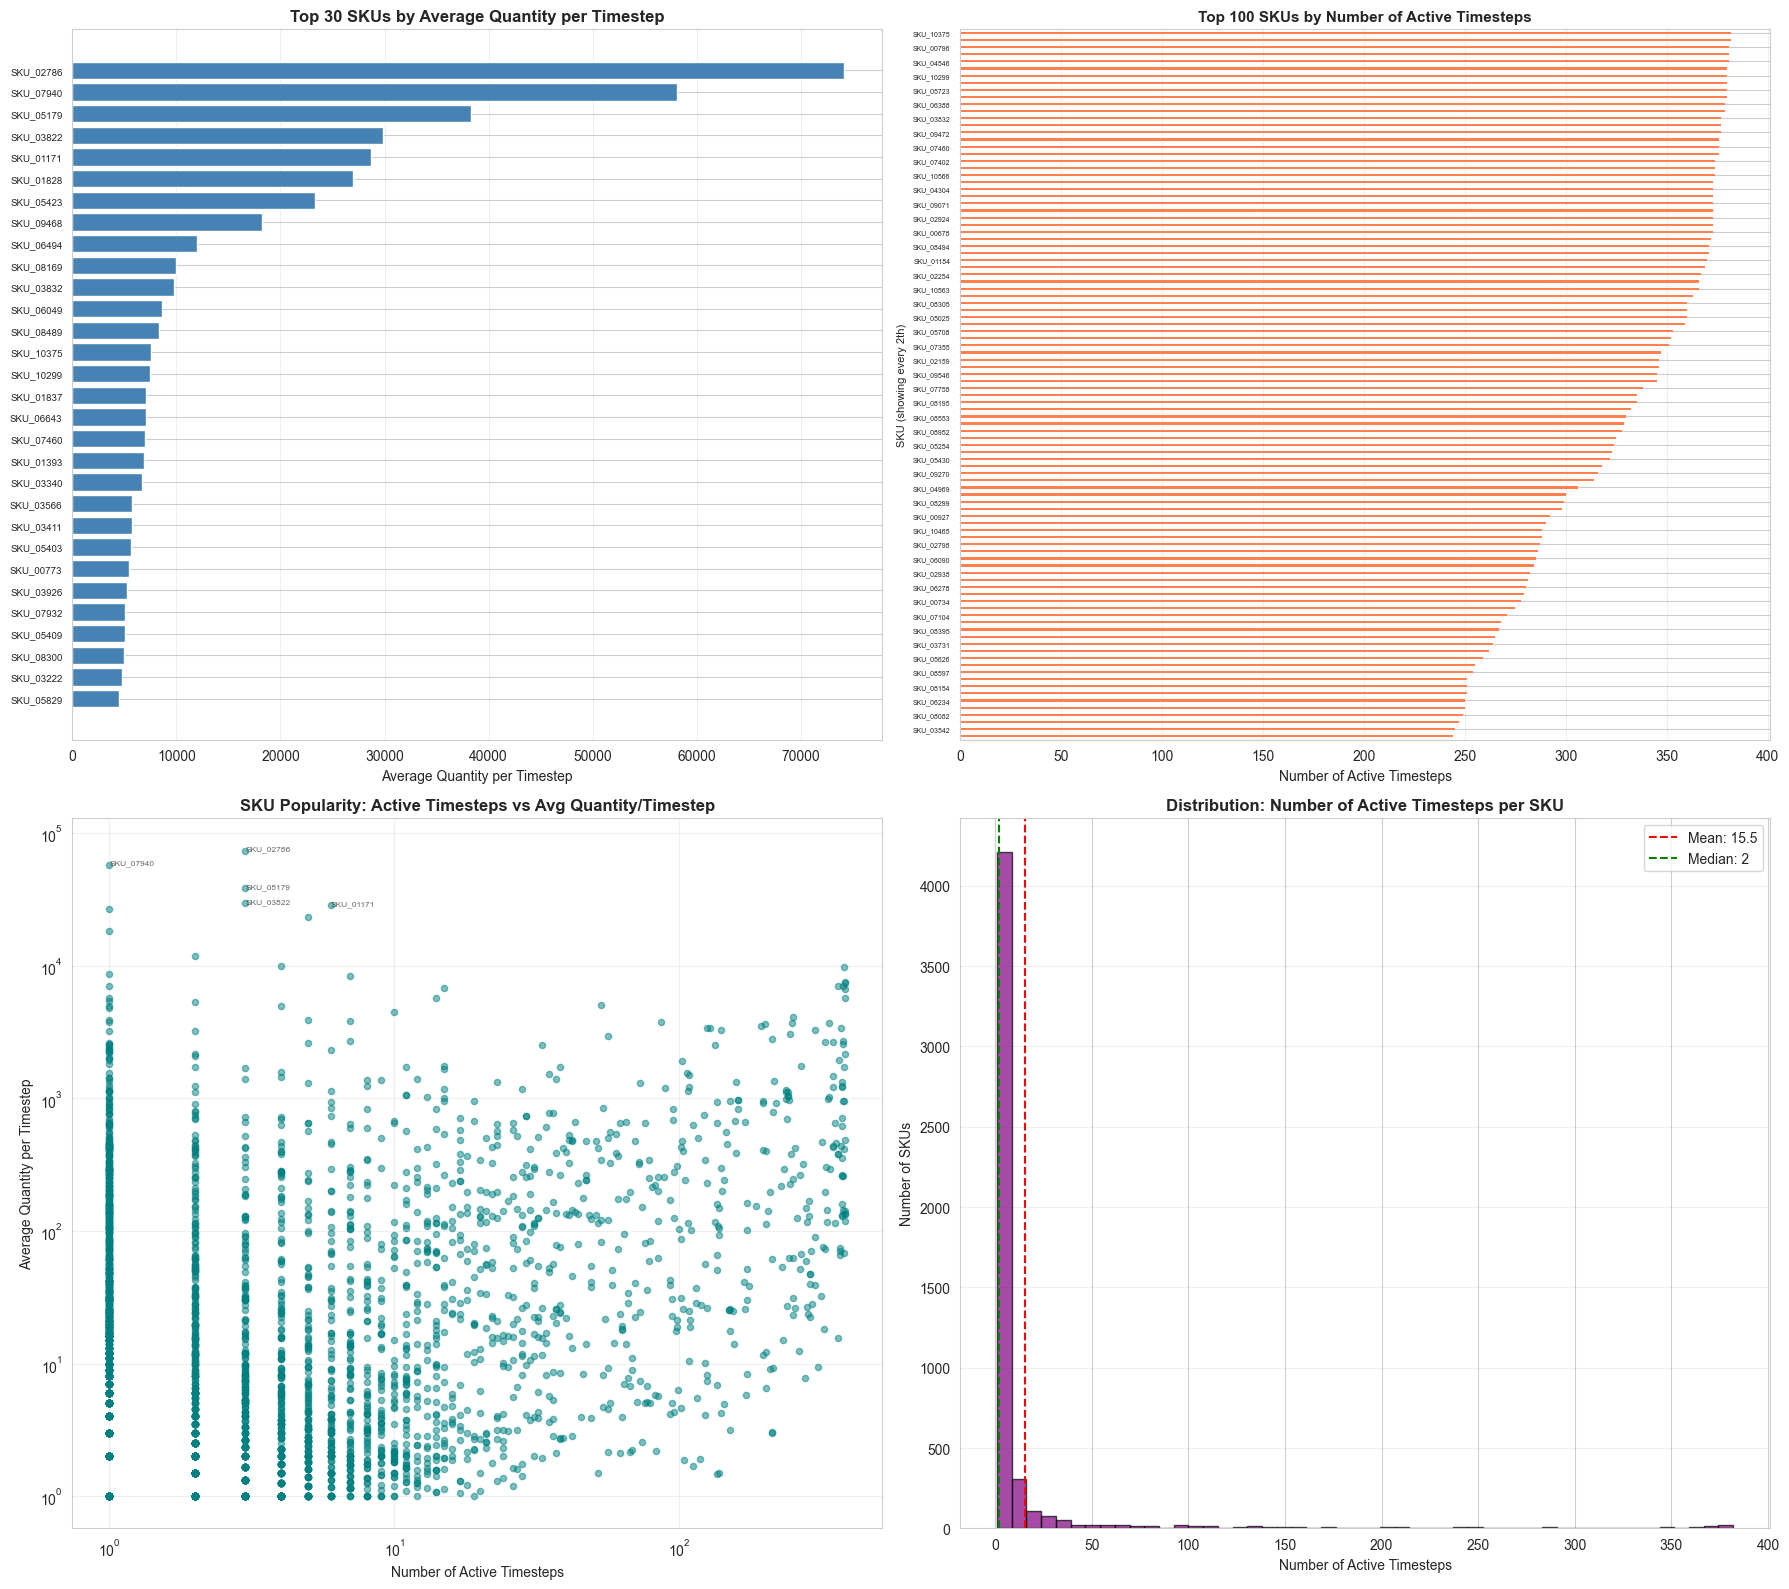


Summary Statistics:
Average quantity per timestep - Mean: 175.40, Median: 3.91
Number of active timesteps - Mean: 15.5, Median: 2
SKUs active in all timesteps: 0
SKUs active in <10 timesteps: 4265


In [19]:
# Visualizations: Top SKUs by average quantity per timestep and number of active timesteps
# Option to show all SKUs or limit to top N
show_all_skus = False  # Set to False to limit to top 30 SKUs
max_skus_to_show = 100  # Maximum number of SKUs to show when show_all_skus=False

# SKUs by number of active timesteps (sorted)
all_timesteps = sku_timestep_stats.sort_values('n_active_timesteps', ascending=False)
if not show_all_skus:
    all_timesteps = all_timesteps.head(max_skus_to_show)

n_skus = len(all_timesteps)

# Adjust figure height adaptively based on number of SKUs
if n_skus <= 30:
    fig_height = 14
elif n_skus <= 100:
    fig_height = 16
elif n_skus <= 500:
    fig_height = 18
else:
    fig_height = 20

fig, axes = plt.subplots(2, 2, figsize=(18, fig_height))

# Top 30 SKUs by average quantity per timestep
top_30_avg_qty = sku_timestep_stats.head(30)
axes[0, 0].barh(range(len(top_30_avg_qty)), top_30_avg_qty['avg_quantity_per_timestep'], color='steelblue')
axes[0, 0].set_yticks(range(len(top_30_avg_qty)))
axes[0, 0].set_yticklabels(top_30_avg_qty['itemid'], fontsize=7)
axes[0, 0].set_xlabel('Average Quantity per Timestep')
axes[0, 0].set_title('Top 30 SKUs by Average Quantity per Timestep', fontweight='bold')
axes[0, 0].invert_yaxis()
axes[0, 0].grid(True, alpha=0.3, axis='x')

# Prepare data for the active timesteps chart
y_pos = np.arange(n_skus)

# Use adaptive bar height - thinner bars for many SKUs
bar_height = max(0.3, min(0.8, 20 / n_skus)) if n_skus > 30 else 0.8

axes[0, 1].barh(y_pos, all_timesteps['n_active_timesteps'], height=bar_height, color='coral', edgecolor='none')
axes[0, 1].set_xlabel('Number of Active Timesteps', fontsize=10)
title_text = f'All {n_skus} SKUs' if show_all_skus else f'Top {n_skus} SKUs'
axes[0, 1].set_title(f'{title_text} by Number of Active Timesteps', fontweight='bold', fontsize=11)
axes[0, 1].set_ylim(-0.5, n_skus - 0.5)
axes[0, 1].invert_yaxis()
axes[0, 1].grid(True, alpha=0.3, axis='x')

# Adaptive label interval: show all labels if <= 30 SKUs, otherwise thin them
if n_skus <= 30:
    # Show all labels
    label_interval = 1
    axes[0, 1].set_yticks(y_pos)
    axes[0, 1].set_yticklabels(all_timesteps['itemid'], fontsize=7)
    axes[0, 1].set_ylabel('SKU', fontsize=8)
else:
    # Calculate interval to show ~50 labels max
    label_interval = max(1, n_skus // 50)
    tick_positions = y_pos[::label_interval]
    tick_labels = [all_timesteps.iloc[i]['itemid'] for i in range(0, n_skus, label_interval)]
    axes[0, 1].set_yticks(tick_positions)
    axes[0, 1].set_yticklabels(tick_labels, fontsize=5)
    axes[0, 1].set_ylabel(f'SKU (showing every {label_interval}th)', fontsize=8)

# Scatter: Average quantity per timestep vs Number of active timesteps
axes[1, 0].scatter(sku_timestep_stats['n_active_timesteps'], sku_timestep_stats['avg_quantity_per_timestep'], 
                   alpha=0.5, s=20, color='teal')
axes[1, 0].set_xlabel('Number of Active Timesteps')
axes[1, 0].set_ylabel('Average Quantity per Timestep')
axes[1, 0].set_title('SKU Popularity: Active Timesteps vs Avg Quantity/Timestep', fontweight='bold')
axes[1, 0].set_xscale('log')
axes[1, 0].set_yscale('log')
axes[1, 0].grid(True, alpha=0.3)

# Annotate top 5 SKUs in scatter
top_5_combined = sku_timestep_stats.nlargest(5, 'avg_quantity_per_timestep')
for _, row in top_5_combined.iterrows():
    axes[1, 0].annotate(row['itemid'], 
                        (row['n_active_timesteps'], row['avg_quantity_per_timestep']),
                        fontsize=6, alpha=0.7)

# Distribution of number of active timesteps
axes[1, 1].hist(sku_timestep_stats['n_active_timesteps'], bins=50, edgecolor='black', alpha=0.7, color='purple')
axes[1, 1].set_xlabel('Number of Active Timesteps')
axes[1, 1].set_ylabel('Number of SKUs')
axes[1, 1].set_title('Distribution: Number of Active Timesteps per SKU', fontweight='bold')
axes[1, 1].axvline(sku_timestep_stats['n_active_timesteps'].mean(), color='r', linestyle='--', 
                   label=f'Mean: {sku_timestep_stats["n_active_timesteps"].mean():.1f}')
axes[1, 1].axvline(sku_timestep_stats['n_active_timesteps'].median(), color='g', linestyle='--', 
                   label=f'Median: {sku_timestep_stats["n_active_timesteps"].median():.0f}')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

# Print summary statistics
print("\nSummary Statistics:")
print(f"Average quantity per timestep - Mean: {sku_timestep_stats['avg_quantity_per_timestep'].mean():.2f}, "
      f"Median: {sku_timestep_stats['avg_quantity_per_timestep'].median():.2f}")
print(f"Number of active timesteps - Mean: {sku_timestep_stats['n_active_timesteps'].mean():.1f}, "
      f"Median: {sku_timestep_stats['n_active_timesteps'].median():.0f}")
print(f"SKUs active in all timesteps: {(sku_timestep_stats['n_active_timesteps'] == sku_demand_with_day['day_id'].nunique()).sum()}")
print(f"SKUs active in <10 timesteps: {(sku_timestep_stats['n_active_timesteps'] < 10).sum()}")


In [20]:
# Combined ranking table: Top SKUs by both metrics
print("="*100)
print("TOP 30 SKUs: Combined Ranking by Average Quantity per Timestep and Active Timesteps")
print("="*100)

# Create a combined score (normalized and weighted)
sku_timestep_stats['norm_avg_qty'] = (sku_timestep_stats['avg_quantity_per_timestep'] - 
                                      sku_timestep_stats['avg_quantity_per_timestep'].min()) / \
                                     (sku_timestep_stats['avg_quantity_per_timestep'].max() - 
                                      sku_timestep_stats['avg_quantity_per_timestep'].min())
sku_timestep_stats['norm_active_timesteps'] = (sku_timestep_stats['n_active_timesteps'] - 
                                                 sku_timestep_stats['n_active_timesteps'].min()) / \
                                                (sku_timestep_stats['n_active_timesteps'].max() - 
                                                 sku_timestep_stats['n_active_timesteps'].min())
sku_timestep_stats['combined_score'] = (sku_timestep_stats['norm_avg_qty'] * 0.6 + 
                                        sku_timestep_stats['norm_active_timesteps'] * 0.4)

top_30_combined = sku_timestep_stats.nlargest(30, 'combined_score')[
    ['itemid', 'avg_quantity_per_timestep', 'n_active_timesteps', 'total_quantity', 'combined_score']
].round(2)

print("\nTop 30 SKUs (sorted by combined score):")
print(top_30_combined.to_string(index=False))

# Also show top 10 by each metric separately
print("\n" + "="*100)
print("TOP 10 SKUs by Average Quantity per Timestep:")
print("="*100)
top_10_avg = sku_timestep_stats.nlargest(10, 'avg_quantity_per_timestep')[
    ['itemid', 'avg_quantity_per_timestep', 'n_active_timesteps', 'total_quantity']
].round(2)
print(top_10_avg.to_string(index=False))

print("\n" + "="*100)
print("TOP 10 SKUs by Number of Active Timesteps:")
print("="*100)
top_10_timesteps = sku_timestep_stats.nlargest(10, 'n_active_timesteps')[
    ['itemid', 'avg_quantity_per_timestep', 'n_active_timesteps', 'total_quantity']
].round(2)
print(top_10_timesteps.to_string(index=False))


TOP 30 SKUs: Combined Ranking by Average Quantity per Timestep and Active Timesteps

Top 30 SKUs (sorted by combined score):
   itemid  avg_quantity_per_timestep  n_active_timesteps  total_quantity  combined_score
SKU_02786                   74116.00                   3          222348            0.60
SKU_03832                    9751.43                 377         3676290            0.47
SKU_07940                   58089.00                   1           58089            0.47
SKU_10375                    7592.37                 382         2900286            0.46
SKU_10299                    7460.06                 380         2834823            0.46
SKU_03340                    6698.02                 380         2545246            0.45
SKU_07460                    7026.65                 376         2642019            0.45
SKU_03566                    5712.12                 382         2182030            0.45
SKU_06643                    7035.48                 359         2525736  

### 8.3 Distance Analysis


In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Warehouse to region distances
axes[0].hist(warehouse_to_region_df['distance_km'], bins=50, edgecolor='black', alpha=0.7, color='navy')
axes[0].set_xlabel('Distance (km)')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution of Warehouse → Region Distances')
axes[0].axvline(warehouse_to_region_df['distance_km'].mean(), color='r', linestyle='--', label=f'Mean: {warehouse_to_region_df["distance_km"].mean():.0f} km')
axes[0].legend()

# Supplier to warehouse distances
axes[1].hist(supplier_to_warehouse_df['distance_km'], bins=50, edgecolor='black', alpha=0.7, color='maroon')
axes[1].set_xlabel('Distance (km)')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Distribution of Supplier → Warehouse Distances')
axes[1].axvline(supplier_to_warehouse_df['distance_km'].mean(), color='r', linestyle='--', label=f'Mean: {supplier_to_warehouse_df["distance_km"].mean():.0f} km')
axes[1].legend()

plt.tight_layout()
plt.show()

print("Distance Statistics:")
print(f"Warehouse → Region - Mean: {warehouse_to_region_df['distance_km'].mean():.0f} km, Max: {warehouse_to_region_df['distance_km'].max():.0f} km")
print(f"Supplier → Warehouse - Mean: {supplier_to_warehouse_df['distance_km'].mean():.0f} km, Max: {supplier_to_warehouse_df['distance_km'].max():.0f} km")


SyntaxError: invalid syntax (880770059.py, line 20)

### 8.4 Correlation: Distance vs Costs


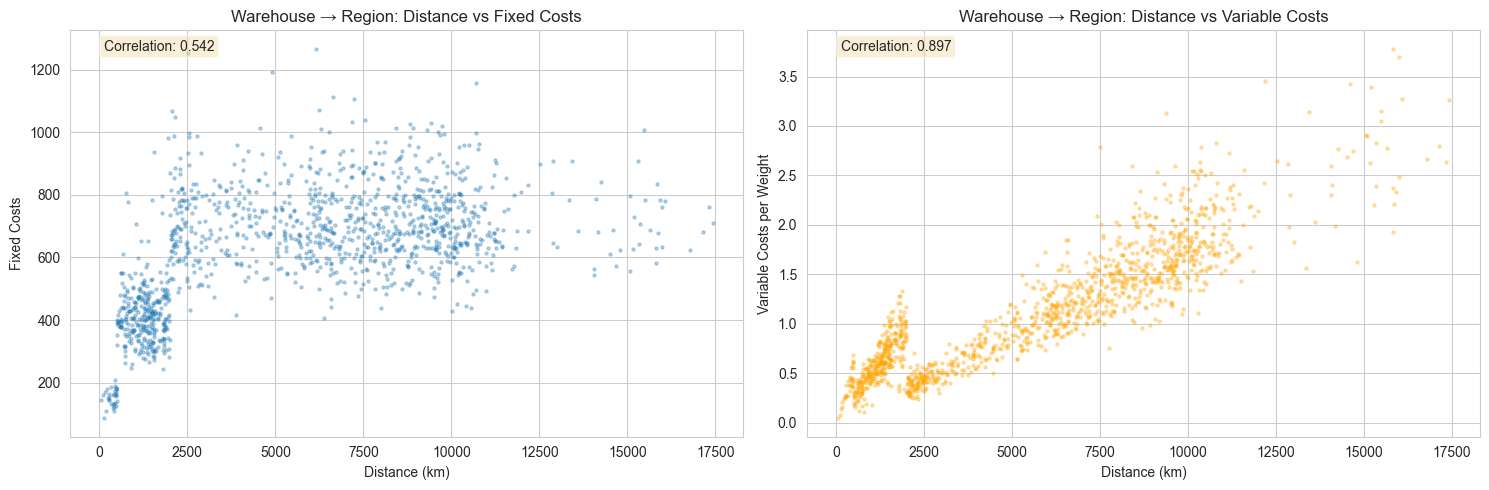

Correlation between distance and fixed costs: 0.542
Correlation between distance and variable costs: 0.897


In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Warehouse to region: distance vs fixed costs
axes[0].scatter(warehouse_to_region_df['distance_km'], warehouse_to_region_df['fixed_costs'], 
                alpha=0.3, s=5)
axes[0].set_xlabel('Distance (km)')
axes[0].set_ylabel('Fixed Costs')
axes[0].set_title('Warehouse → Region: Distance vs Fixed Costs')
corr_fixed = warehouse_to_region_df['distance_km'].corr(warehouse_to_region_df['fixed_costs'])
axes[0].text(0.05, 0.95, f'Correlation: {corr_fixed:.3f}', transform=axes[0].transAxes, 
             bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

# Warehouse to region: distance vs variable costs
axes[1].scatter(warehouse_to_region_df['distance_km'], warehouse_to_region_df['variable_costs_per_weight'], 
                alpha=0.3, s=5, color='orange')
axes[1].set_xlabel('Distance (km)')
axes[1].set_ylabel('Variable Costs per Weight')
axes[1].set_title('Warehouse → Region: Distance vs Variable Costs')
corr_var = warehouse_to_region_df['distance_km'].corr(warehouse_to_region_df['variable_costs_per_weight'])
axes[1].text(0.05, 0.95, f'Correlation: {corr_var:.3f}', transform=axes[1].transAxes, 
             bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.show()

print(f"Correlation between distance and fixed costs: {corr_fixed:.3f}")
print(f"Correlation between distance and variable costs: {corr_var:.3f}")


### 8.5 Summary Statistics Table


In [ ]:
# Create summary statistics
summary_data = {
    'Metric': [
        'Total Warehouses',
        'Total Regions',
        'Total Suppliers',
        'Total SKUs',
        'Total Orders',
        'Total Order-SKU Pairs',
        'Unique Days',
        'Day Range',
        'Avg Orders per Day',
        'Avg SKUs per Order',
        'Avg SKUs per Supplier',
        'Avg Warehouse-Region Distance (km)',
        'Avg Supplier-Warehouse Distance (km)',
    ],
    'Value': [
        len(warehouses_df),
        len(regions_df),
        len(suppliers_df),
        len(skus_df),
        len(orders_df),
        len(order_sku_demand_df),
        orders_df['day_id'].nunique(),
        f"{orders_df['day_id'].min()} - {orders_df['day_id'].max()}",
        f"{orders_df.groupby('day_id').size().mean():.2f}",
        f"{order_sku_demand_df.groupby('salesorderid').size().mean():.2f}",
        f"{skus_per_supplier_df.groupby('supplierid').size().mean():.2f}",
        f"{warehouse_to_region_df['distance_km'].mean():.0f}",
        f"{supplier_to_warehouse_df['distance_km'].mean():.0f}",
    ]
}

summary_df = pd.DataFrame(summary_data)
print("\n" + "="*50)
print("SUMMARY STATISTICS")
print("="*50)
print(summary_df.to_string(index=False))



SUMMARY STATISTICS
                              Metric   Value
                    Total Warehouses      24
                       Total Regions      57
                     Total Suppliers     572
                          Total SKUs   10578
                        Total Orders   35562
               Total Order-SKU Pairs  258212
                         Unique Days     385
                           Day Range 0 - 386
                  Avg Orders per Day   92.37
                  Avg SKUs per Order    7.26
               Avg SKUs per Supplier   22.77
  Avg Warehouse-Region Distance (km)    5761
Avg Supplier-Warehouse Distance (km)    4530


## 9. Deep Demand Analysis

This section investigates:
- **Seasonality by SKU**: temporal patterns and periodicity in individual SKU demand
- **Correlations across SKUs and regions**: which SKUs / regions have correlated demand patterns
- **Order-level seasonality and correlations**: patterns in entire orders over time


In [20]:
# Prepare the core demand dataset: merge orders with SKU demand to get day_id, regionid per SKU demand
demand_df = order_sku_demand_df.merge(orders_df[['salesorderid', 'day_id', 'regionid']], on='salesorderid', how='left')
print(f"Combined demand dataset: {len(demand_df)} rows")
print(f"Columns: {list(demand_df.columns)}")
print(f"Day range: {demand_df['day_id'].min()} to {demand_df['day_id'].max()}")
print(f"Unique SKUs: {demand_df['itemid'].nunique()}")
print(f"Unique regions: {demand_df['regionid'].nunique()}")
demand_df.head()


Combined demand dataset: 258212 rows
Columns: ['salesorderid', 'itemid', 'quantity', 'day_id', 'regionid']
Day range: 0 to 386
Unique SKUs: 5115
Unique regions: 57


salesorderid     itemid  quantity  day_id regionid
0    SO_000000  SKU_03832      6100     327   R_0037
1    SO_000000  SKU_02159      2424     327   R_0037
2    SO_000000  SKU_01615     11238     327   R_0037
3    SO_000001  SKU_03566         4      84   R_0017
4    SO_000001  SKU_03340        31      84   R_0017

### 9.1 Seasonality by SKU

Analyze temporal demand patterns for the top SKUs: daily demand time series, 7-day rolling averages, autocorrelation functions (ACF), and spectral analysis to detect periodic patterns.


In [21]:
# Build daily demand per SKU for top 10 most-ordered SKUs
top_skus = demand_df.groupby('itemid')['salesorderid'].nunique().nlargest(10).index.tolist()
print(f"Top 10 SKUs by order frequency: {top_skus}")

# Create full day range to include zero-demand days
all_days = pd.RangeIndex(demand_df['day_id'].min(), demand_df['day_id'].max() + 1, name='day_id')

# Daily total quantity per SKU
sku_daily = demand_df[demand_df['itemid'].isin(top_skus)].groupby(['day_id', 'itemid'])['quantity'].sum().unstack(fill_value=0)
sku_daily = sku_daily.reindex(all_days, fill_value=0)

print(f"Daily demand matrix shape: {sku_daily.shape} (days x SKUs)")
sku_daily.head()


Top 10 SKUs by order frequency: ['SKU_03566', 'SKU_10299', 'SKU_03340', 'SKU_06435', 'SKU_04546', 'SKU_00796', 'SKU_10375', 'SKU_05723', 'SKU_09179', 'SKU_06388']
Daily demand matrix shape: (387, 10) (days x SKUs)


itemid  SKU_00796  SKU_03340  SKU_03566  SKU_04546  SKU_05723  SKU_06388  \
day_id                                                                     
0               0          0          0          0          0          0   
1               0          0         44          0          0          0   
2               6        230        239          6          0          0   
3               7          0        996          7          7         20   
4             118       5133       6082        113         18         23   

itemid  SKU_06435  SKU_09179  SKU_10299  SKU_10375  
day_id                                              
0               0          0          0          0  
1               0          0          0          0  
2               6          0        286        145  
3               7          7          0          0  
4             116         15       1037        908

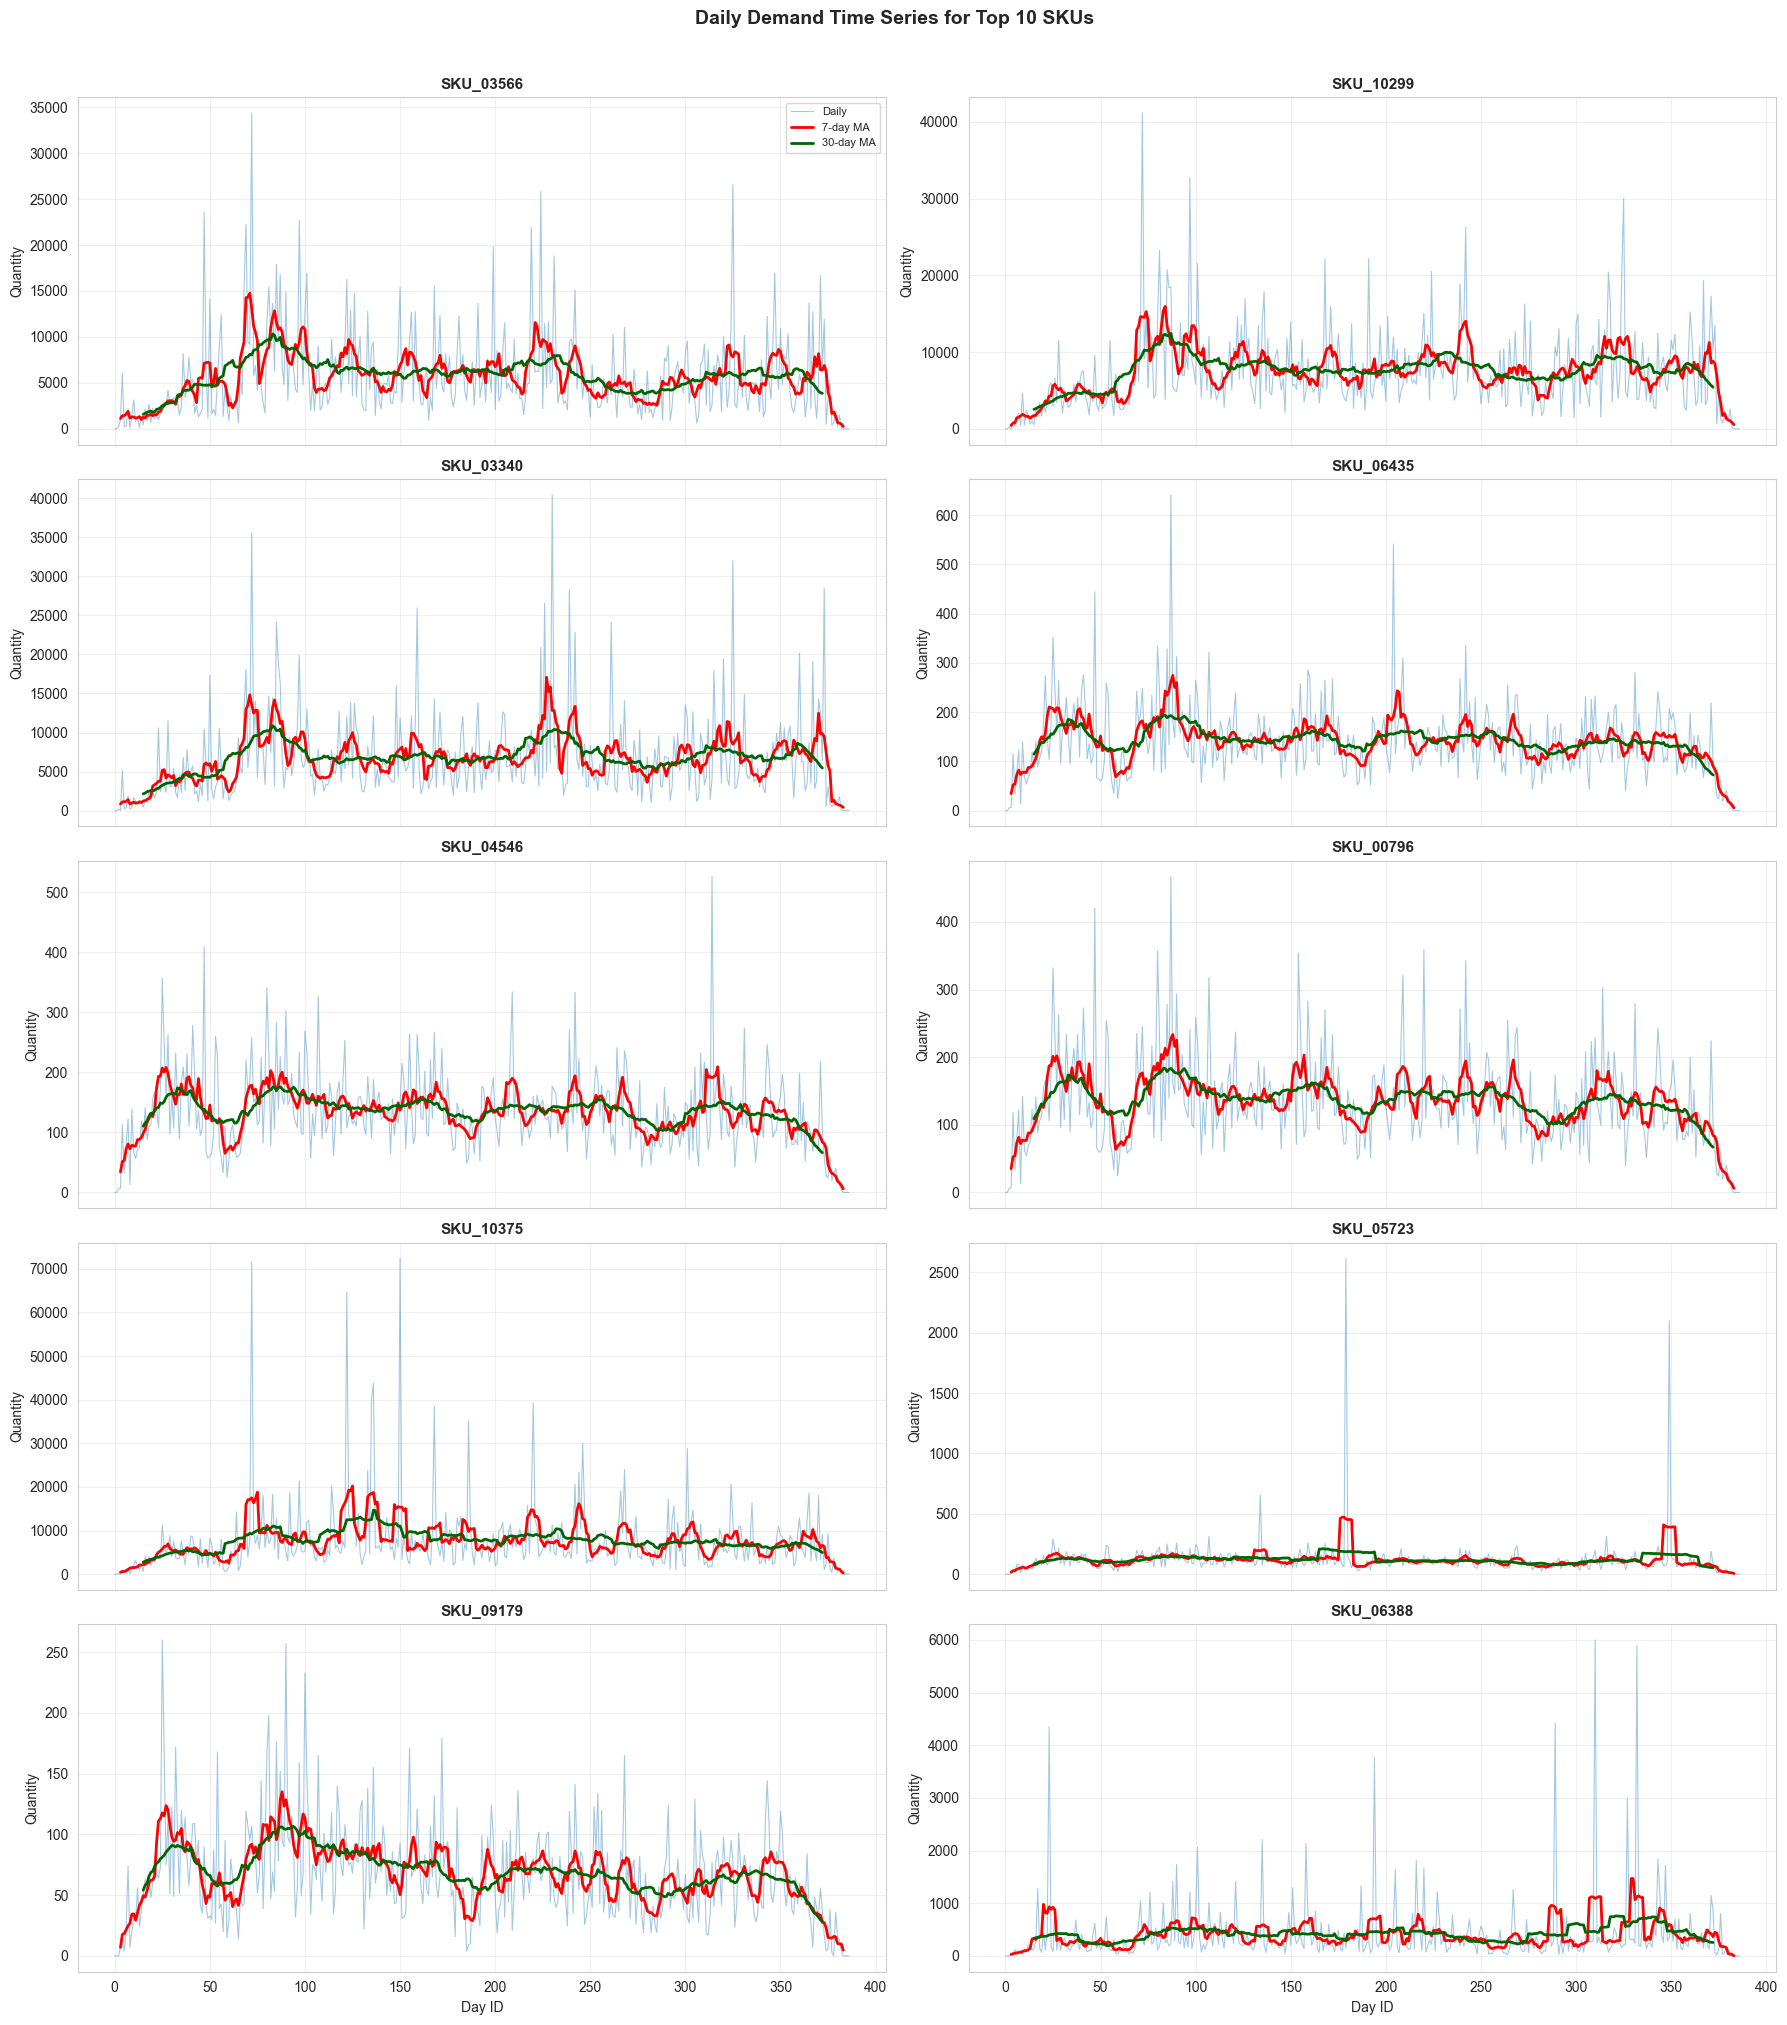

In [22]:
# Plot daily demand time series for top 10 SKUs with rolling average
fig, axes = plt.subplots(5, 2, figsize=(18, 20), sharex=True)
axes = axes.flatten()

for i, sku in enumerate(top_skus):
    ax = axes[i]
    series = sku_daily[sku]
    ax.plot(series.index, series.values, alpha=0.4, linewidth=0.8, label='Daily')
    # 7-day rolling average
    rolling_7 = series.rolling(window=7, center=True).mean()
    ax.plot(series.index, rolling_7.values, linewidth=2, color='red', label='7-day MA')
    # 30-day rolling average
    rolling_30 = series.rolling(window=30, center=True).mean()
    ax.plot(series.index, rolling_30.values, linewidth=2, color='darkgreen', label='30-day MA')
    ax.set_title(f'{sku}', fontsize=11, fontweight='bold')
    ax.set_ylabel('Quantity')
    ax.grid(True, alpha=0.3)
    if i == 0:
        ax.legend(fontsize=8)

axes[-1].set_xlabel('Day ID')
axes[-2].set_xlabel('Day ID')
fig.suptitle('Daily Demand Time Series for Top 10 SKUs', fontsize=14, fontweight='bold', y=1.01)
plt.tight_layout()
plt.show()


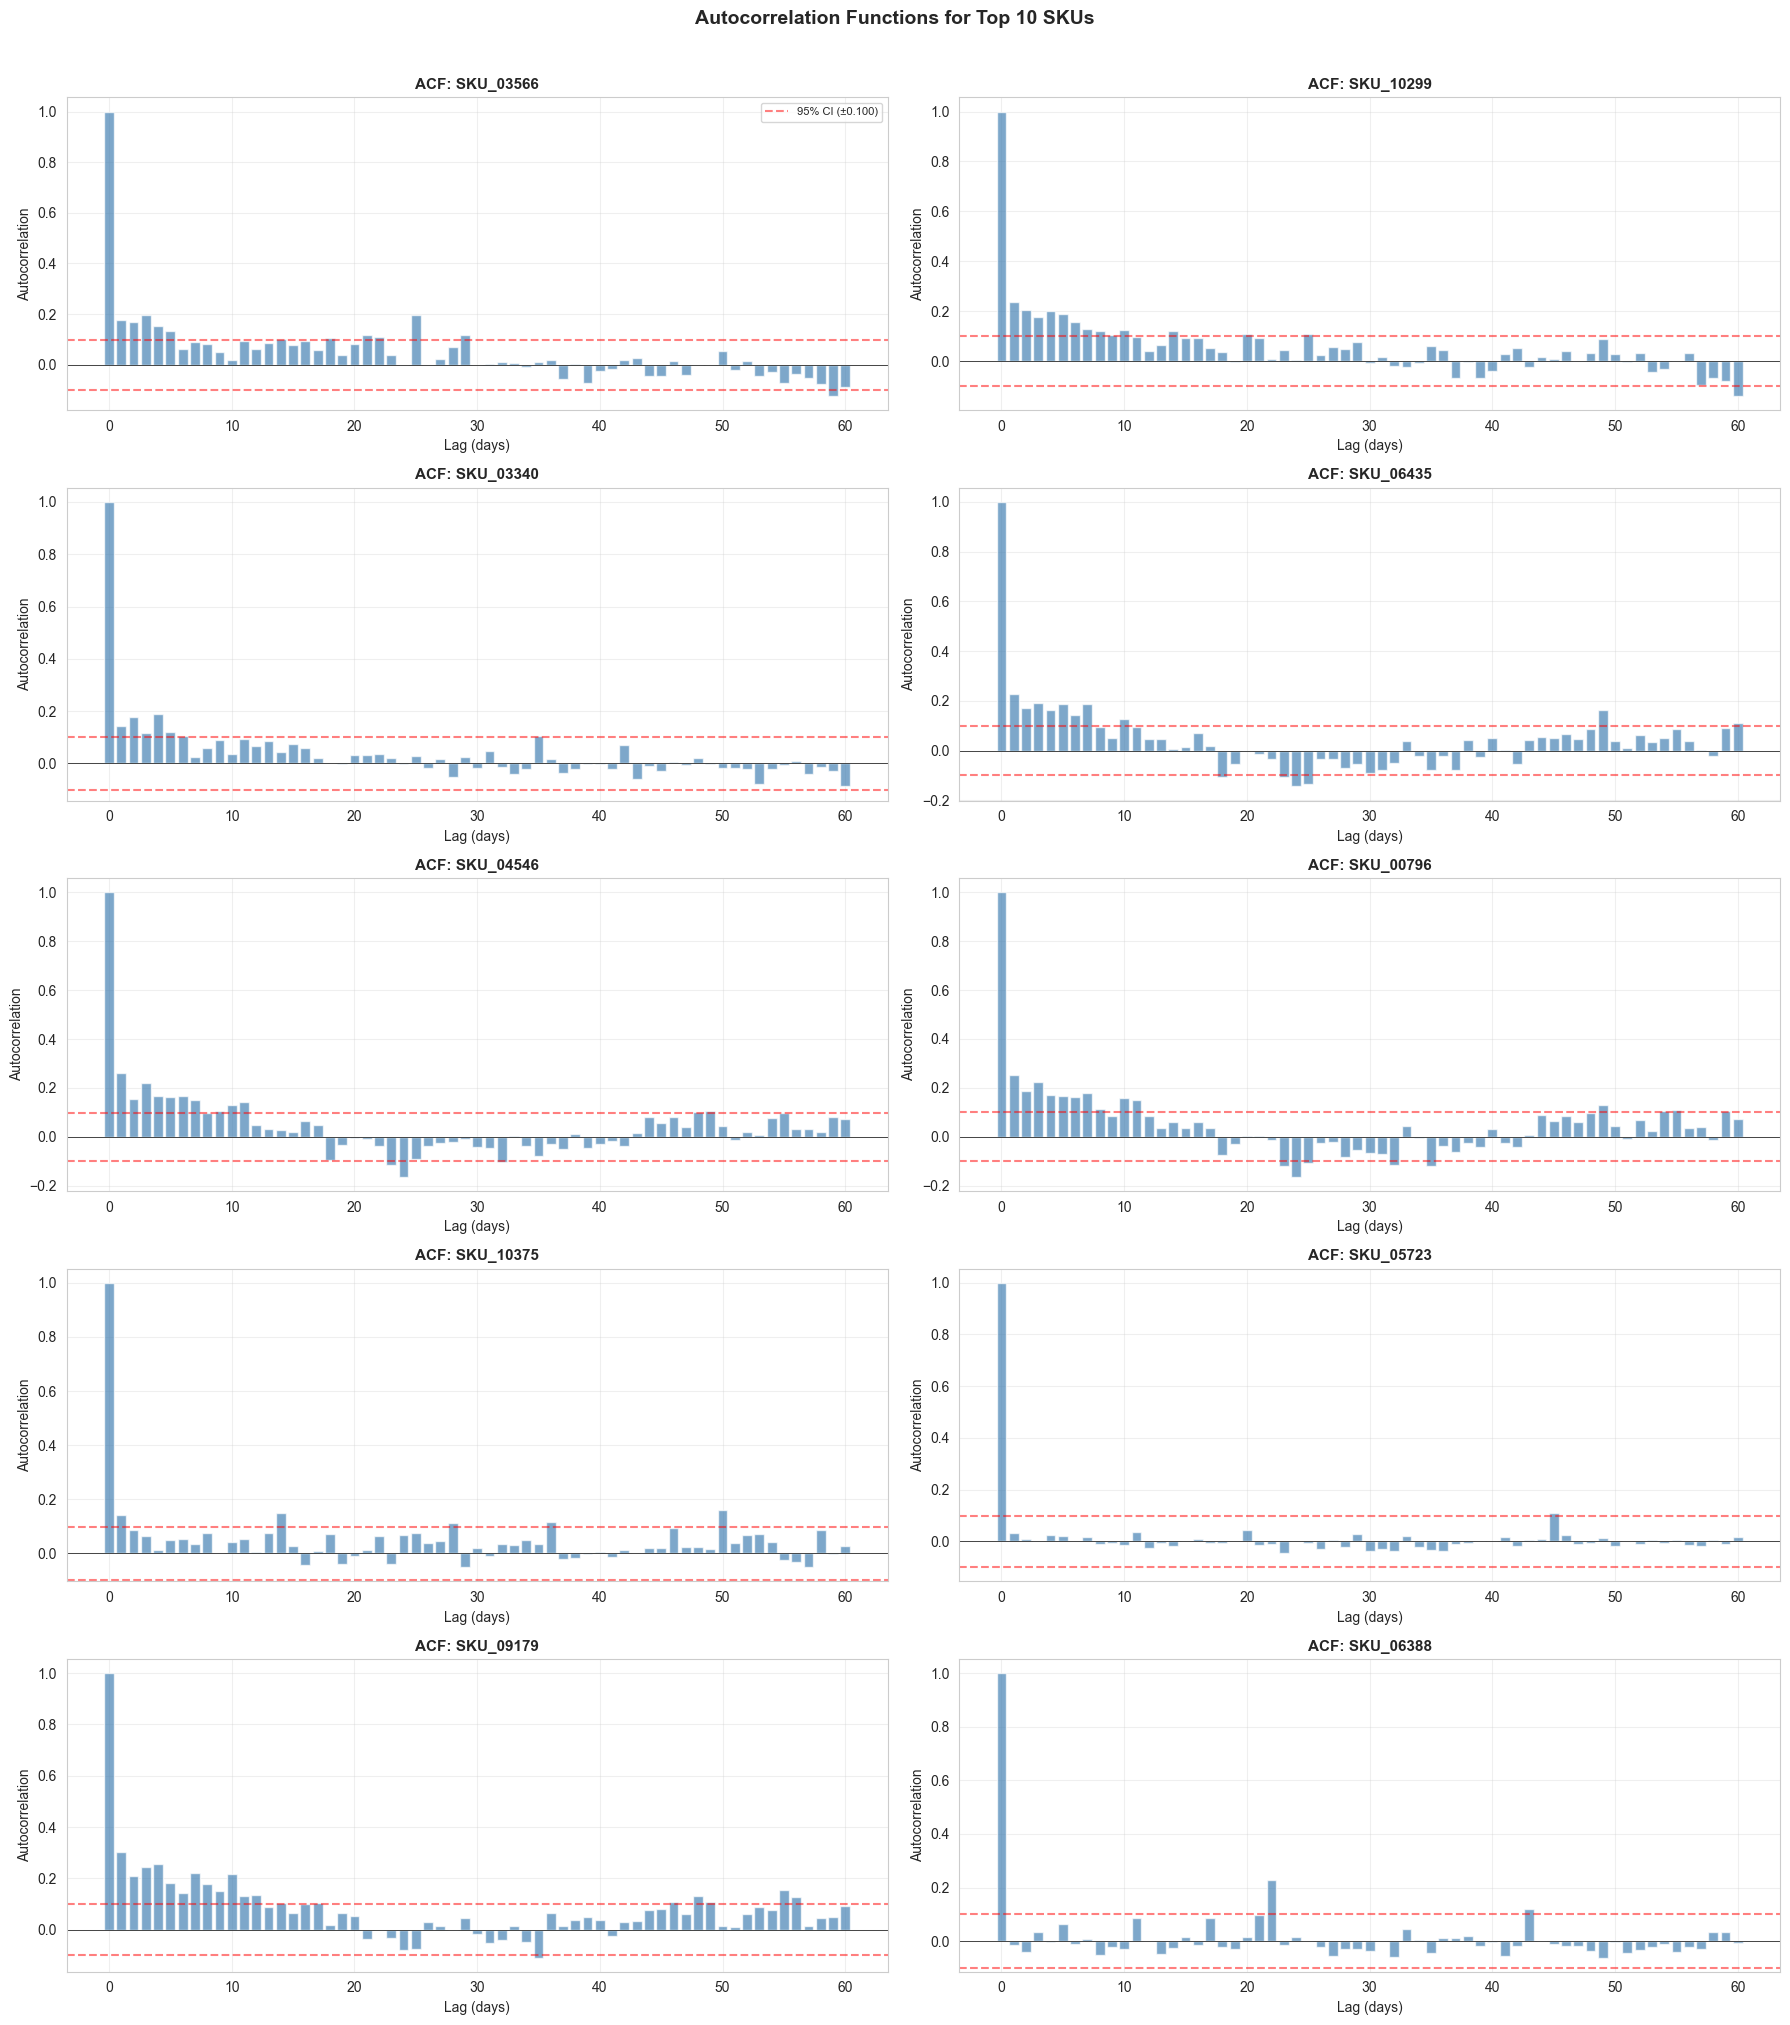


Significant autocorrelation lags (above 95% CI):
  SKU_03566: lags [1, 2, 3, 4, 5, 14, 18, 21, 22, 25]... (max ACF=0.198 at lag 3)
  SKU_10299: lags [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]... (max ACF=0.238 at lag 1)
  SKU_03340: lags [1, 2, 3, 4, 5, 6, 35] (max ACF=0.191 at lag 4)
  SKU_06435: lags [1, 2, 3, 4, 5, 6, 7, 10, 18, 23]... (max ACF=0.226 at lag 1)
  SKU_04546: lags [1, 2, 3, 4, 5, 6, 7, 9, 10, 11]... (max ACF=0.260 at lag 1)
  SKU_00796: lags [1, 2, 3, 4, 5, 6, 7, 8, 10, 11]... (max ACF=0.252 at lag 1)
  SKU_10375: lags [1, 14, 28, 36, 50] (max ACF=0.162 at lag 50)
  SKU_05723: lags [45] (max ACF=0.111 at lag 45)
  SKU_09179: lags [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]... (max ACF=0.303 at lag 1)
  SKU_06388: lags [22, 43] (max ACF=0.227 at lag 22)


In [25]:
# Autocorrelation analysis for top SKUs
from statsmodels.tsa.stattools import acf

fig, axes = plt.subplots(5, 2, figsize=(18, 20))
axes = axes.flatten()

max_lag = min(60, len(sku_daily) // 3)

for i, sku in enumerate(top_skus):
    ax = axes[i]
    series = sku_daily[sku].values
    acf_values = acf(series, nlags=max_lag, fft=True)
    ax.bar(range(len(acf_values)), acf_values, width=0.8, alpha=0.7, color='steelblue')
    # Significance bounds (95% CI)
    ci = 1.96 / np.sqrt(len(series))
    ax.axhline(y=ci, color='r', linestyle='--', alpha=0.5, label=f'95% CI (±{ci:.3f})')
    ax.axhline(y=-ci, color='r', linestyle='--', alpha=0.5)
    ax.axhline(y=0, color='black', linewidth=0.5)
    ax.set_title(f'ACF: {sku}', fontsize=11, fontweight='bold')
    ax.set_ylabel('Autocorrelation')
    ax.set_xlabel('Lag (days)')
    ax.grid(True, alpha=0.3)
    if i == 0:
        ax.legend(fontsize=8)

fig.suptitle('Autocorrelation Functions for Top 10 SKUs', fontsize=14, fontweight='bold', y=1.01)
plt.tight_layout()
plt.show()

# Print significant lags for each SKU
print("\nSignificant autocorrelation lags (above 95% CI):")
for sku in top_skus:
    series = sku_daily[sku].values
    acf_values = acf(series, nlags=max_lag, fft=True)
    ci = 1.96 / np.sqrt(len(series))
    significant_lags = [lag for lag in range(1, len(acf_values)) if abs(acf_values[lag]) > ci]
    if significant_lags:
        print(f"  {sku}: lags {significant_lags[:10]}{'...' if len(significant_lags) > 10 else ''} (max ACF={max(acf_values[1:]):.3f} at lag {np.argmax(acf_values[1:])+1})")
    else:
        print(f"  {sku}: no significant lags")


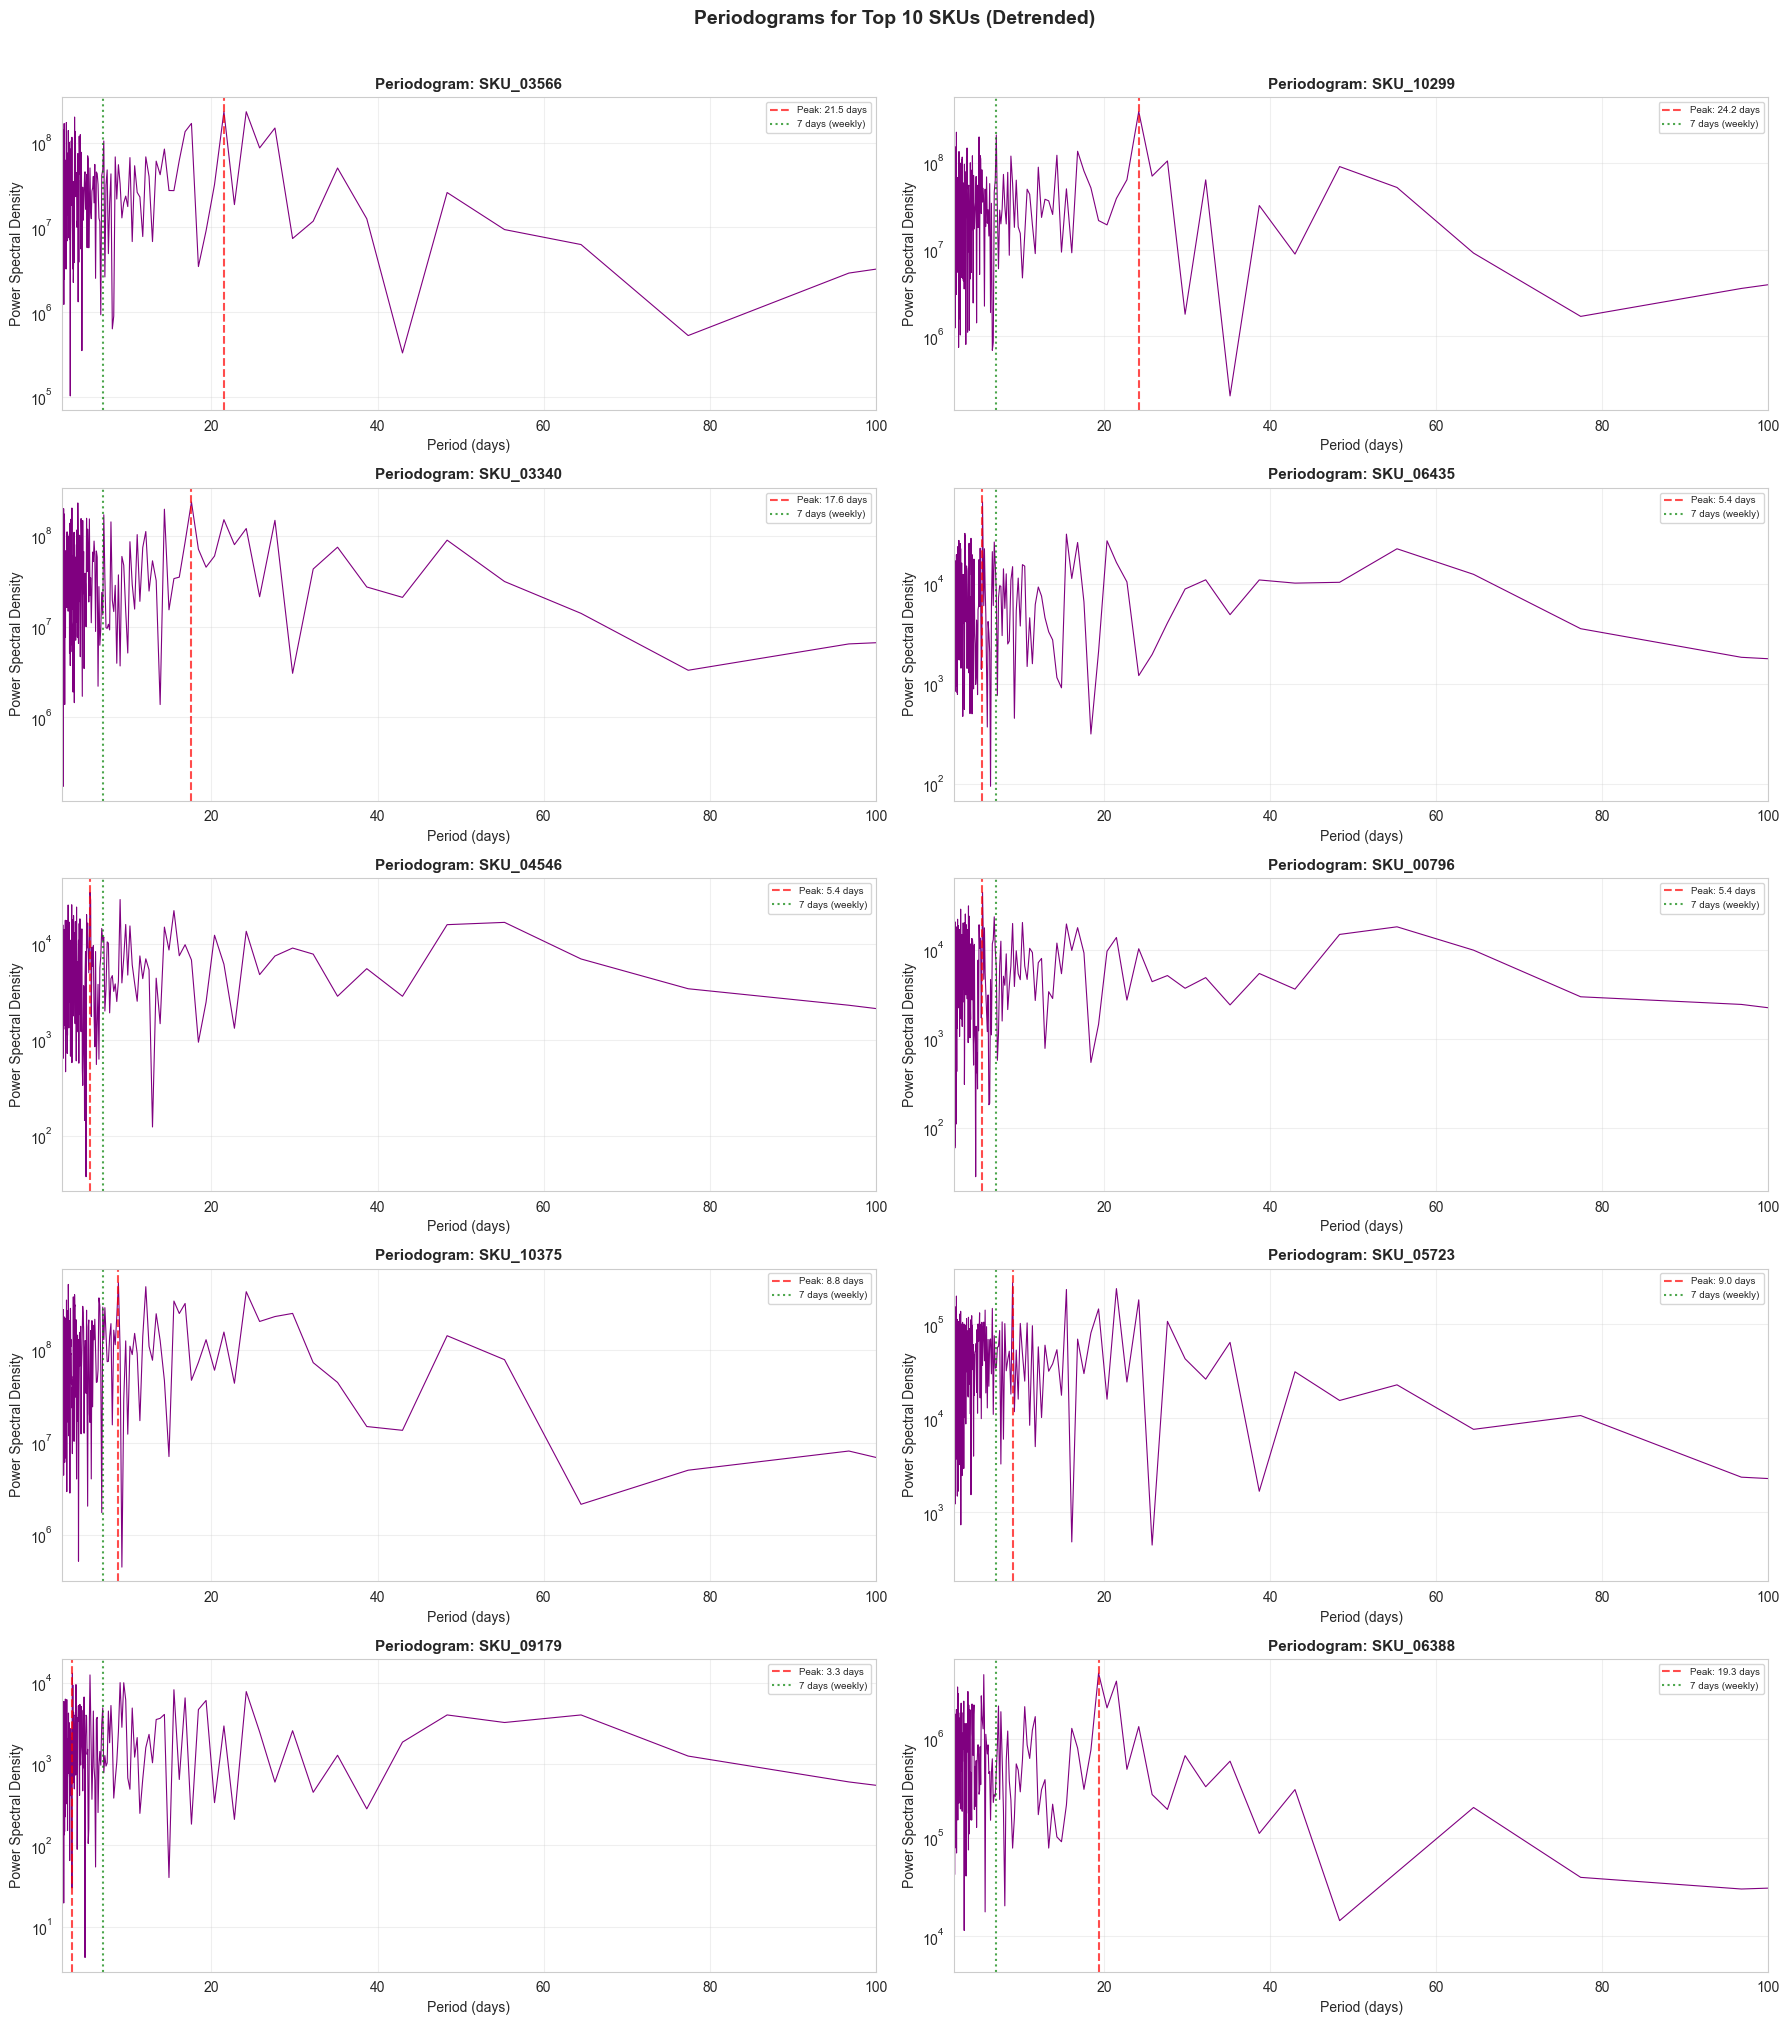


Dominant periods for top SKUs:
  SKU_03566: top periods = ['21.5d', '24.2d', '3.5d'] (powers: ['232150444.8', '231171625.0', '200042629.6'])
  SKU_10299: top periods = ['24.2d', '2.2d', '7.0d'] (powers: ['389127627.2', '224920386.4', '209234044.8'])
  SKU_03340: top periods = ['17.6d', '3.9d', '3.2d'] (powers: ['239529203.7', '233475968.2', '205363932.4'])
  SKU_06435: top periods = ['5.4d', '3.3d', '15.5d'] (powers: ['65543.1', '31807.1', '31274.3'])
  SKU_04546: top periods = ['5.4d', '9.0d', '5.5d'] (powers: ['34571.7', '29092.8', '28634.2'])
  SKU_00796: top periods = ['5.4d', '3.7d', '2.7d'] (powers: ['43931.4', '30957.0', '28449.4'])
  SKU_10375: top periods = ['8.8d', '2.0d', '2.8d'] (powers: ['535969975.3', '525290400.2', '514270922.4'])
  SKU_05723: top periods = ['9.0d', '21.5d', '15.5d'] (powers: ['278095.4', '240952.0', '235894.0'])
  SKU_09179: top periods = ['3.3d', '5.4d', '9.0d'] (powers: ['13042.0', '12401.6', '9970.2'])
  SKU_06388: top periods = ['19.3d', '5.5d', '2

In [26]:
# Spectral analysis (periodogram) to detect periodic patterns in SKU demand
from scipy.signal import periodogram

fig, axes = plt.subplots(5, 2, figsize=(18, 20))
axes = axes.flatten()

for i, sku in enumerate(top_skus):
    ax = axes[i]
    series = sku_daily[sku].values
    # Detrend by subtracting rolling mean
    detrended = series - pd.Series(series).rolling(window=30, center=True, min_periods=1).mean().values
    freqs, psd = periodogram(detrended, fs=1.0)  # fs=1 sample/day
    
    # Convert frequency to period (days)
    periods = 1.0 / freqs[1:]  # skip zero frequency
    psd_plot = psd[1:]
    
    ax.semilogy(periods, psd_plot, linewidth=0.8, color='purple')
    ax.set_xlim(2, min(100, len(series) // 2))
    ax.set_title(f'Periodogram: {sku}', fontsize=11, fontweight='bold')
    ax.set_ylabel('Power Spectral Density')
    ax.set_xlabel('Period (days)')
    ax.grid(True, alpha=0.3)
    
    # Mark the dominant period
    dominant_idx = np.argmax(psd_plot[periods <= 100])
    dominant_period = periods[periods <= 100].iloc[dominant_idx] if isinstance(periods, pd.Series) else periods[periods <= 100][dominant_idx]
    ax.axvline(x=dominant_period, color='red', linestyle='--', alpha=0.7, label=f'Peak: {dominant_period:.1f} days')
    # Also mark 7-day period
    ax.axvline(x=7, color='green', linestyle=':', alpha=0.7, label='7 days (weekly)')
    ax.legend(fontsize=7)

fig.suptitle('Periodograms for Top 10 SKUs (Detrended)', fontsize=14, fontweight='bold', y=1.01)
plt.tight_layout()
plt.show()

# Summary of dominant periods
print("\nDominant periods for top SKUs:")
for sku in top_skus:
    series = sku_daily[sku].values
    detrended = series - pd.Series(series).rolling(window=30, center=True, min_periods=1).mean().values
    freqs, psd = periodogram(detrended, fs=1.0)
    periods = 1.0 / freqs[1:]
    psd_vals = psd[1:]
    # Top 3 periods (under 100 days)
    mask = periods <= 100
    top_idx = np.argsort(psd_vals[mask])[-3:][::-1]
    top_periods = periods[mask][top_idx]
    top_powers = psd_vals[mask][top_idx]
    print(f"  {sku}: top periods = {[f'{p:.1f}d' for p in top_periods]} (powers: {[f'{pw:.1f}' for pw in top_powers]})")


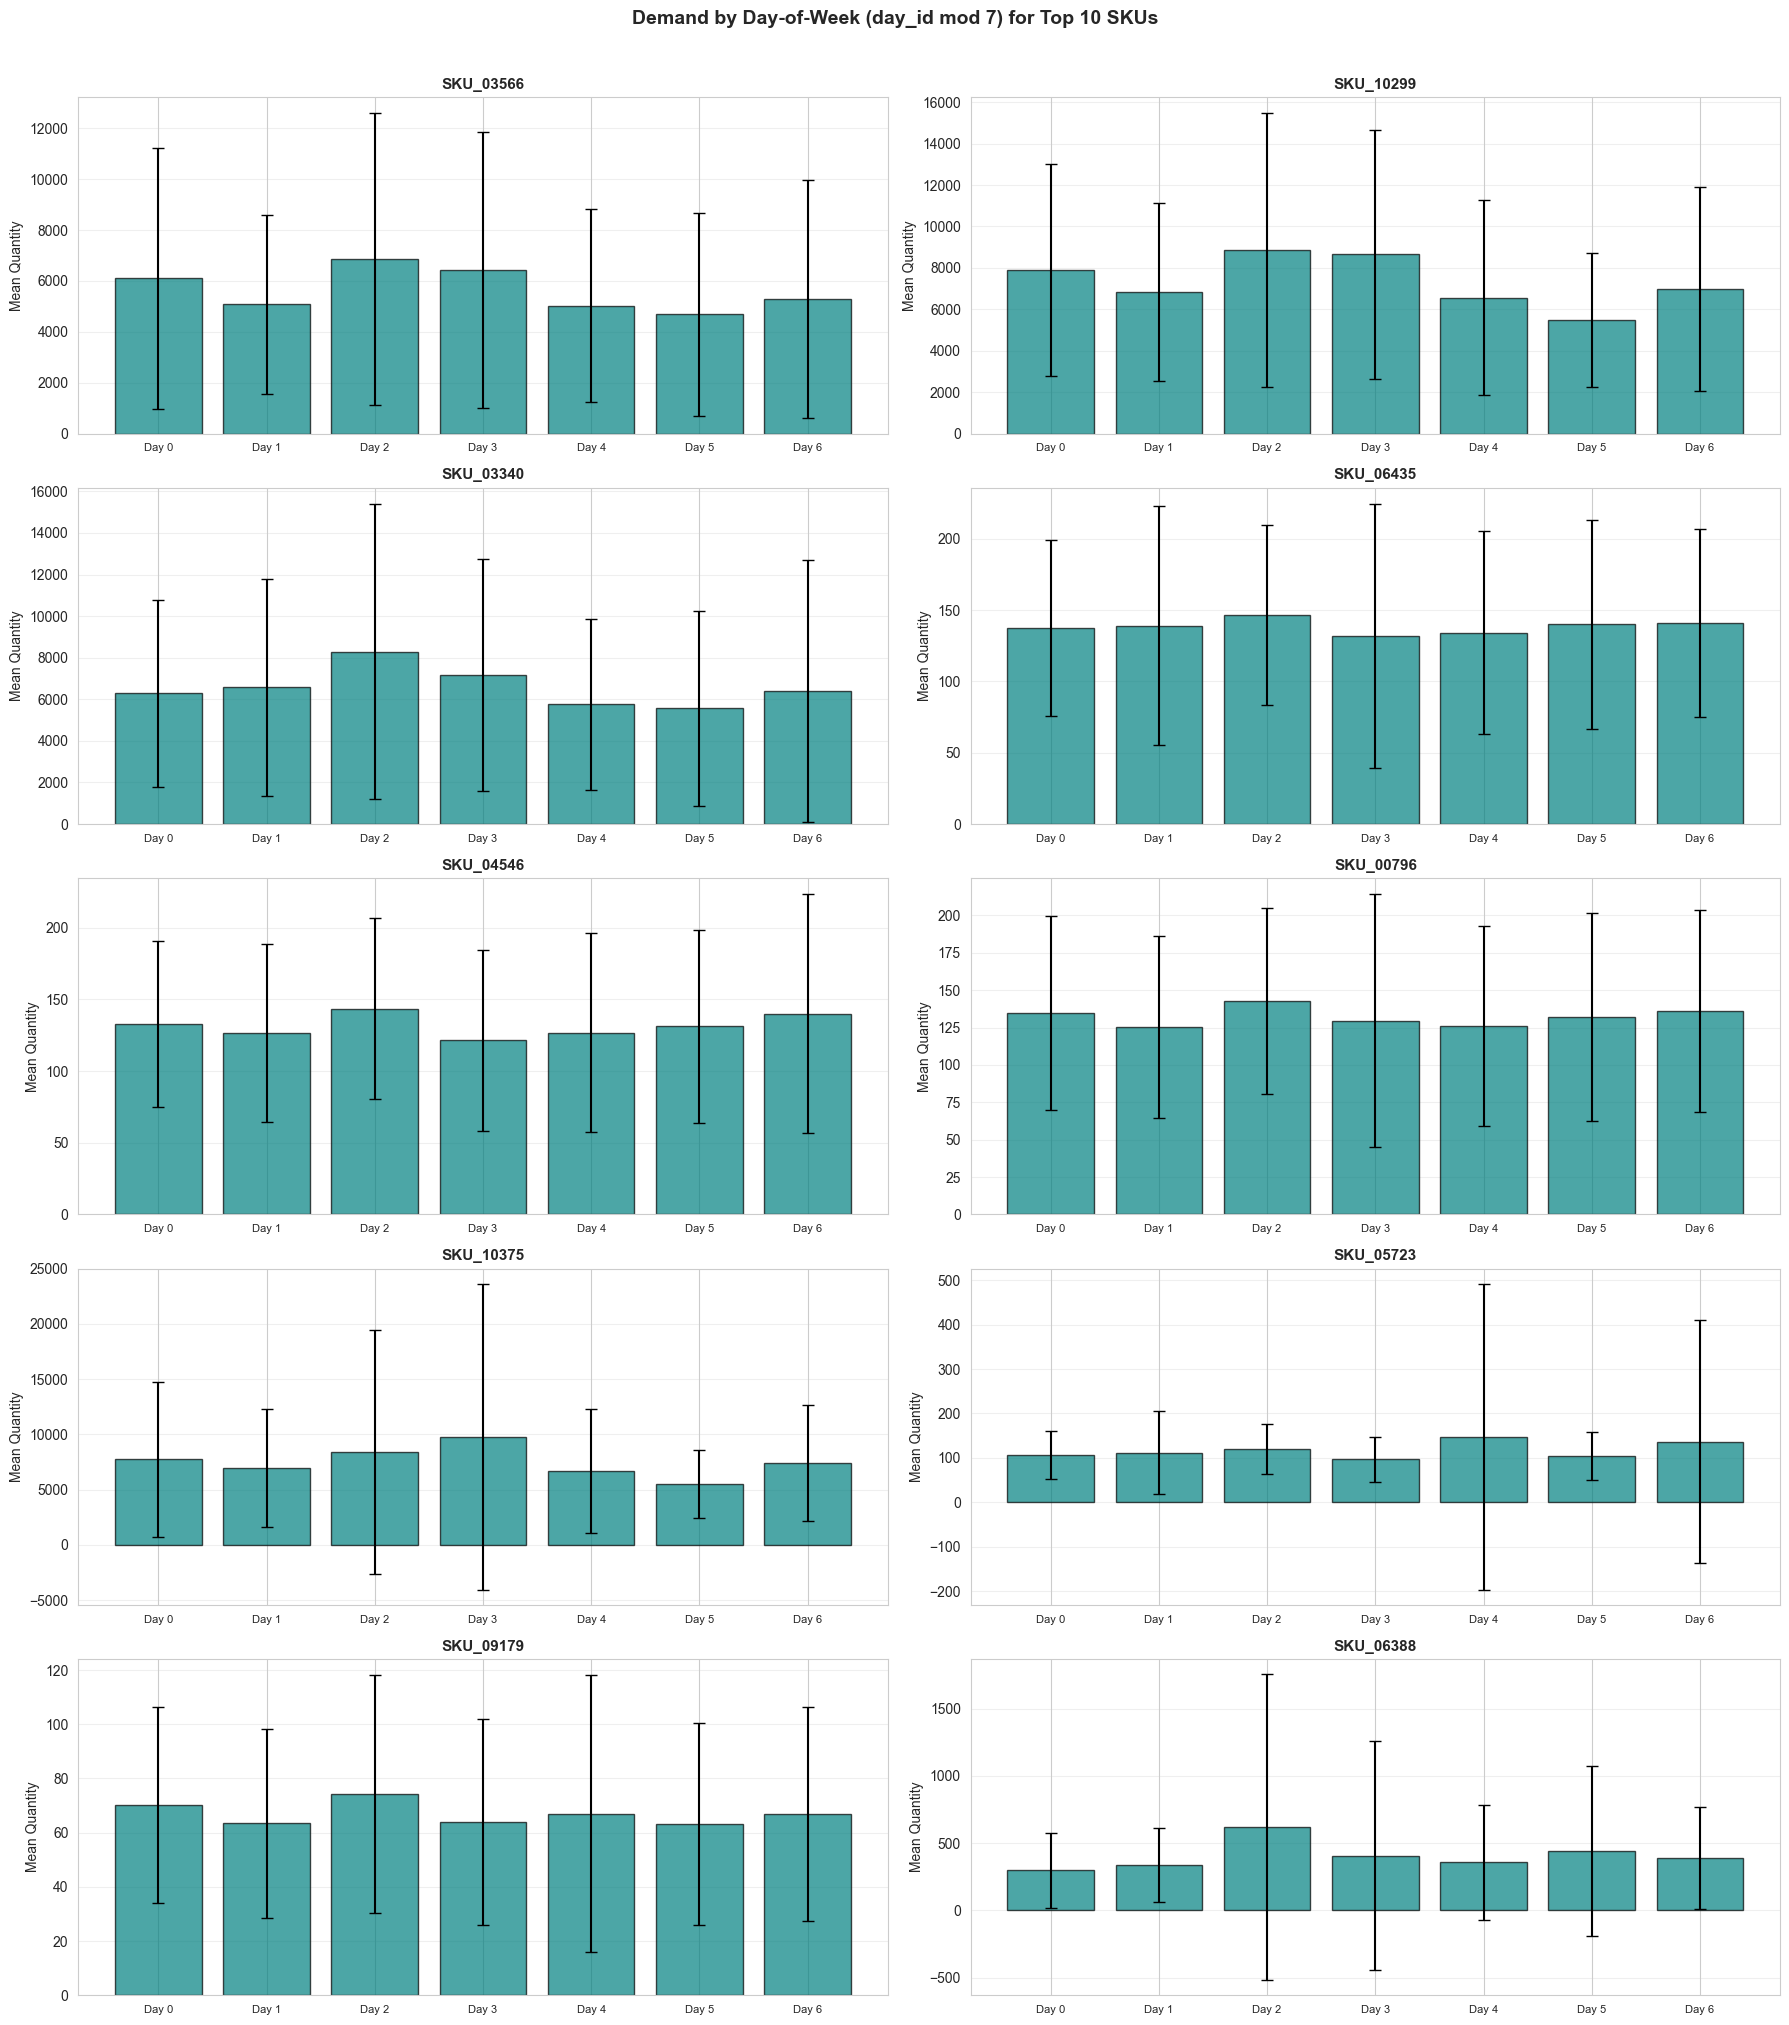


Kruskal-Wallis test for day-of-week effect on demand:
  SKU_03566: H=7.42, p=0.2840 (ns)
  SKU_10299: H=16.53, p=0.0112 (*)
  SKU_03340: H=9.21, p=0.1619 (ns)
  SKU_06435: H=4.34, p=0.6305 (ns)
  SKU_04546: H=5.98, p=0.4259 (ns)
  SKU_00796: H=5.29, p=0.5066 (ns)
  SKU_10375: H=3.40, p=0.7574 (ns)
  SKU_05723: H=6.53, p=0.3662 (ns)
  SKU_09179: H=4.70, p=0.5826 (ns)
  SKU_06388: H=7.67, p=0.2637 (ns)


In [27]:
# Day-of-week effect: aggregate demand by day_id modulo 7
fig, axes = plt.subplots(5, 2, figsize=(18, 20))
axes = axes.flatten()

for i, sku in enumerate(top_skus):
    ax = axes[i]
    series = sku_daily[sku].copy()
    series.index.name = 'day_id'
    dow = series.index % 7  # pseudo day-of-week
    dow_demand = pd.DataFrame({'dow': dow, 'quantity': series.values}).groupby('dow')['quantity']
    
    means = dow_demand.mean()
    stds = dow_demand.std()
    
    ax.bar(means.index, means.values, yerr=stds.values, capsize=4, alpha=0.7, color='teal', edgecolor='black')
    ax.set_title(f'{sku}', fontsize=11, fontweight='bold')
    ax.set_ylabel('Mean Quantity')
    ax.set_xticks(range(7))
    ax.set_xticklabels([f'Day {d}' for d in range(7)], fontsize=8)
    ax.grid(True, alpha=0.3, axis='y')

fig.suptitle('Demand by Day-of-Week (day_id mod 7) for Top 10 SKUs', fontsize=14, fontweight='bold', y=1.01)
plt.tight_layout()
plt.show()

# Statistical test: Kruskal-Wallis to check if day-of-week matters
from scipy.stats import kruskal
print("\nKruskal-Wallis test for day-of-week effect on demand:")
for sku in top_skus:
    series = sku_daily[sku].copy()
    dow = series.index % 7
    groups = [series.values[dow == d] for d in range(7)]
    stat, pval = kruskal(*groups)
    sig = "***" if pval < 0.001 else "**" if pval < 0.01 else "*" if pval < 0.05 else "ns"
    print(f"  {sku}: H={stat:.2f}, p={pval:.4f} ({sig})")


### 9.2 Demand Correlations Across SKUs

Analyze pairwise correlations of daily demand between the top SKUs. A clustered heatmap reveals groups of SKUs with similar demand dynamics.


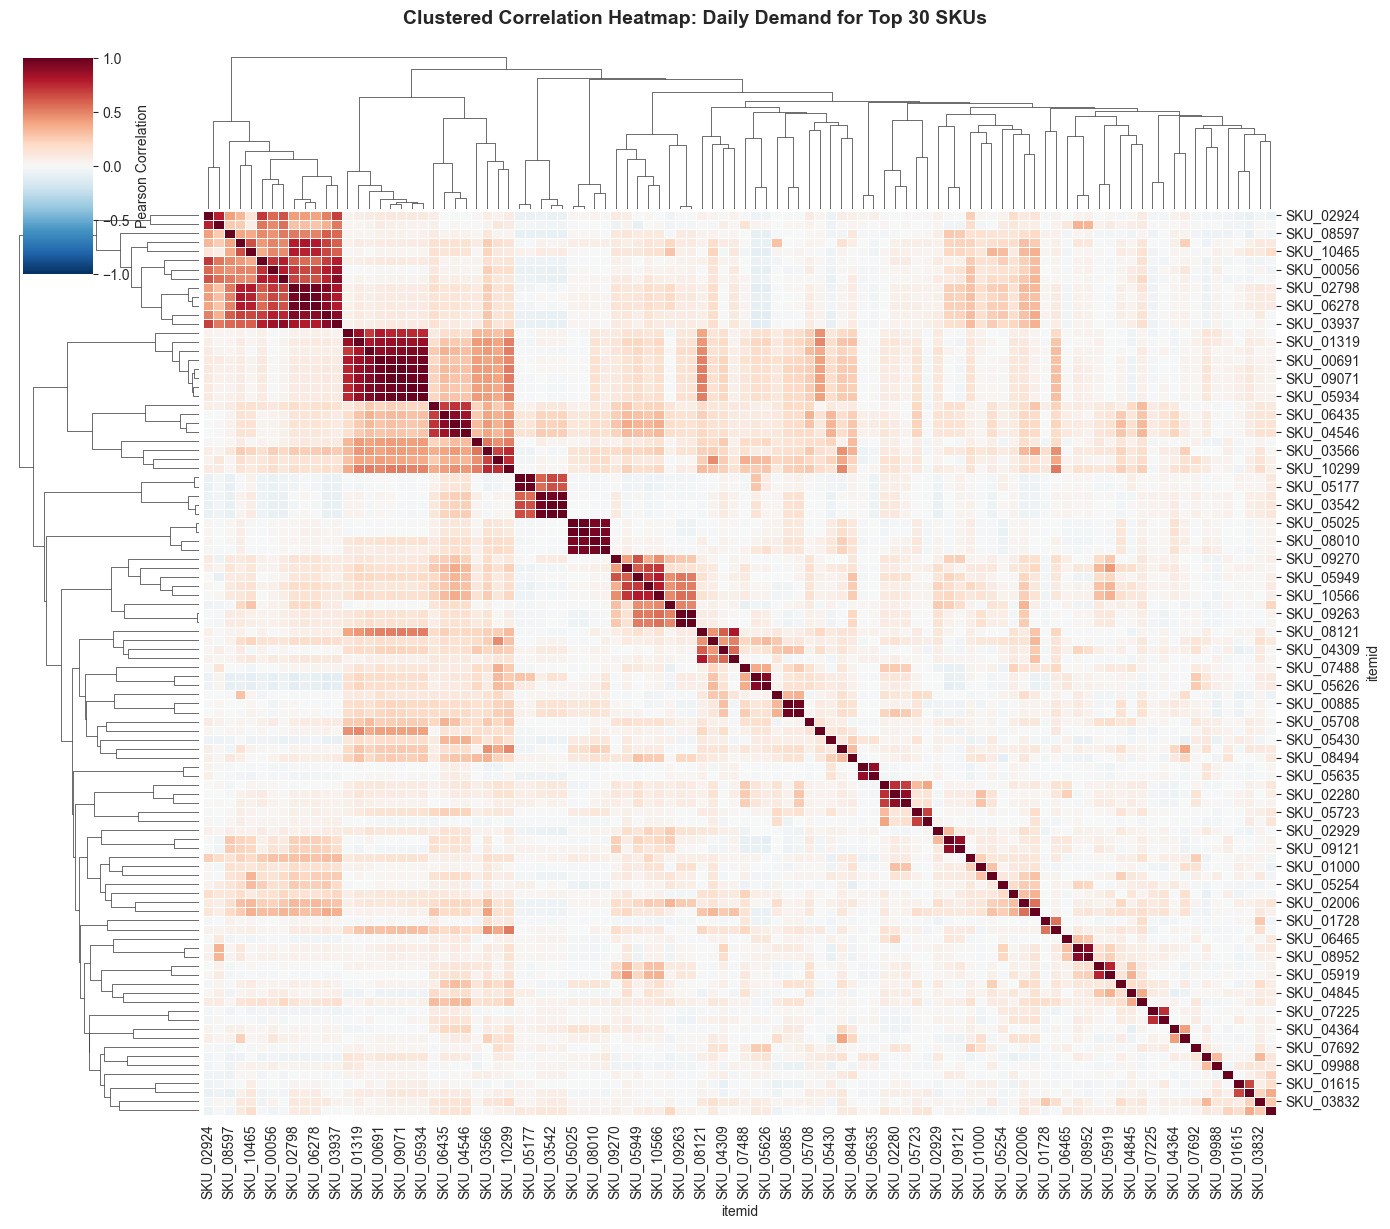

Top 10 most positively correlated SKU pairs:
  SKU_09263 ↔ SKU_09546: r = 0.995
  SKU_07693 ↔ SKU_09071: r = 0.994
  SKU_03542 ↔ SKU_08082: r = 0.994
  SKU_05025 ↔ SKU_08305: r = 0.991
  SKU_00678 ↔ SKU_05934: r = 0.988
  SKU_04469 ↔ SKU_05177: r = 0.987
  SKU_05934 ↔ SKU_09071: r = 0.983
  SKU_02938 ↔ SKU_06278: r = 0.982
  SKU_05934 ↔ SKU_07693: r = 0.981
  SKU_06234 ↔ SKU_08082: r = 0.979

Top 10 most negatively correlated SKU pairs:
  SKU_05254 ↔ SKU_08494: r = -0.096
  SKU_02791 ↔ SKU_10465: r = -0.098
  SKU_05626 ↔ SKU_07355: r = -0.099
  SKU_05626 ↔ SKU_10465: r = -0.101
  SKU_03937 ↔ SKU_05626: r = -0.101
  SKU_02791 ↔ SKU_03937: r = -0.108
  SKU_02798 ↔ SKU_05626: r = -0.108
  SKU_02791 ↔ SKU_02798: r = -0.111
  SKU_01577 ↔ SKU_05626: r = -0.112
  SKU_01577 ↔ SKU_02791: r = -0.114

Overall correlation stats: mean=0.087, std=0.153


In [36]:
# Expand to top 100 SKUs for richer correlation analysis
top_100_skus = demand_df.groupby('itemid')['salesorderid'].nunique().nlargest(100).index.tolist()

sku_daily_100 = demand_df[demand_df['itemid'].isin(top_100_skus)].groupby(['day_id', 'itemid'])['quantity'].sum().unstack(fill_value=0)
sku_daily_100 = sku_daily_100.reindex(all_days, fill_value=0)

# Pearson correlation matrix
corr_matrix = sku_daily_100.corr()

# Clustered heatmap
g = sns.clustermap(corr_matrix, cmap='RdBu_r', center=0, vmin=-1, vmax=1,
                   figsize=(14, 12), linewidths=0.5,
                   annot=False, fmt='.2f',
                   dendrogram_ratio=(0.15, 0.15),
                   cbar_kws={'label': 'Pearson Correlation'})
g.fig.suptitle('Clustered Correlation Heatmap: Daily Demand for Top 30 SKUs', fontsize=14, fontweight='bold', y=1.02)
plt.show()

# Print top positive and negative correlations
corr_matrix = corr_matrix.copy()
corr_matrix.index.name = "SKU_1"
corr_matrix.columns.name = "SKU_2"

corr_pairs = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)).stack().reset_index()
corr_pairs.columns = ['SKU_1', 'SKU_2', 'correlation']
corr_pairs = corr_pairs.sort_values('correlation', ascending=False)

print("Top 10 most positively correlated SKU pairs:")
for _, row in corr_pairs.head(10).iterrows():
    print(f"  {row['SKU_1']} ↔ {row['SKU_2']}: r = {row['correlation']:.3f}")

print("\nTop 10 most negatively correlated SKU pairs:")
for _, row in corr_pairs.tail(10).iterrows():
    print(f"  {row['SKU_1']} ↔ {row['SKU_2']}: r = {row['correlation']:.3f}")

print(f"\nOverall correlation stats: mean={corr_pairs['correlation'].mean():.3f}, std={corr_pairs['correlation'].std():.3f}")


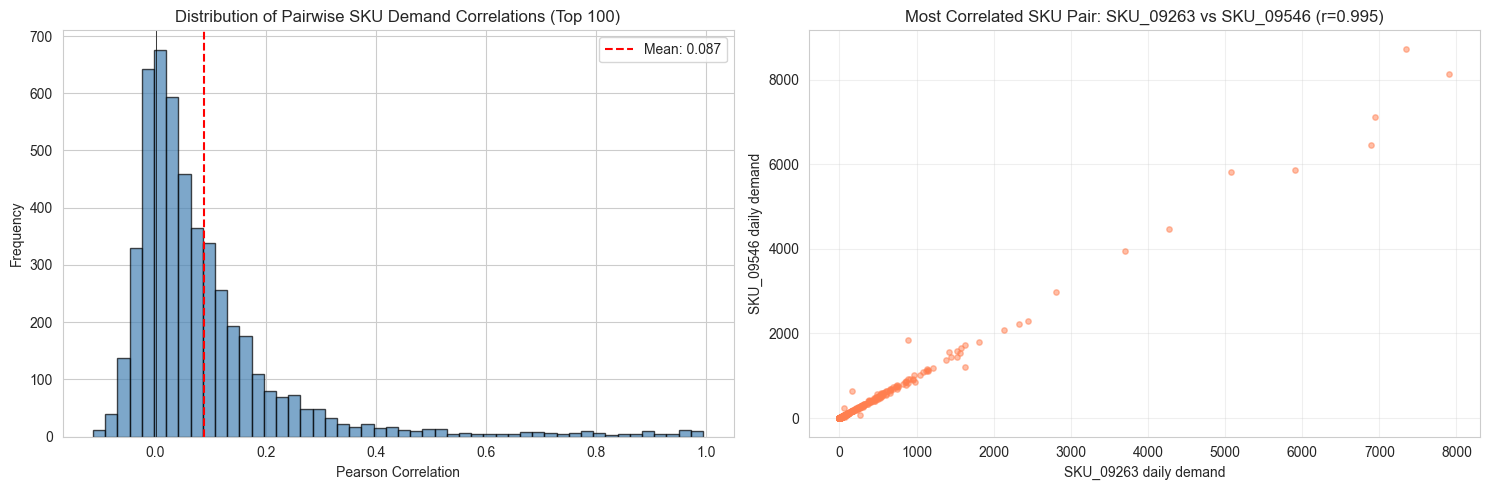

In [38]:
# Distribution of pairwise correlations
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

axes[0].hist(corr_pairs['correlation'], bins=50, edgecolor='black', alpha=0.7, color='steelblue')
axes[0].set_xlabel('Pearson Correlation')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution of Pairwise SKU Demand Correlations (Top 100)')
axes[0].axvline(corr_pairs['correlation'].mean(), color='r', linestyle='--', label=f'Mean: {corr_pairs["correlation"].mean():.3f}')
axes[0].axvline(0, color='black', linestyle='-', linewidth=0.5)
axes[0].legend()

# Scatter: top 2 most correlated SKUs
top_pair = corr_pairs.iloc[0]
sku_a, sku_b = top_pair['SKU_1'], top_pair['SKU_2']
axes[1].scatter(sku_daily_100[sku_a], sku_daily_100[sku_b], alpha=0.5, s=15, color='coral')
axes[1].set_xlabel(f'{sku_a} daily demand')
axes[1].set_ylabel(f'{sku_b} daily demand')
axes[1].set_title(f'Most Correlated SKU Pair: {sku_a} vs {sku_b} (r={top_pair["correlation"]:.3f})')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


### 9.3 Demand Correlations Across Regions

Aggregate daily demand per region and compute pairwise correlations to identify regions with synchronized demand patterns.


Region daily demand matrix: (387, 57) (days x regions)


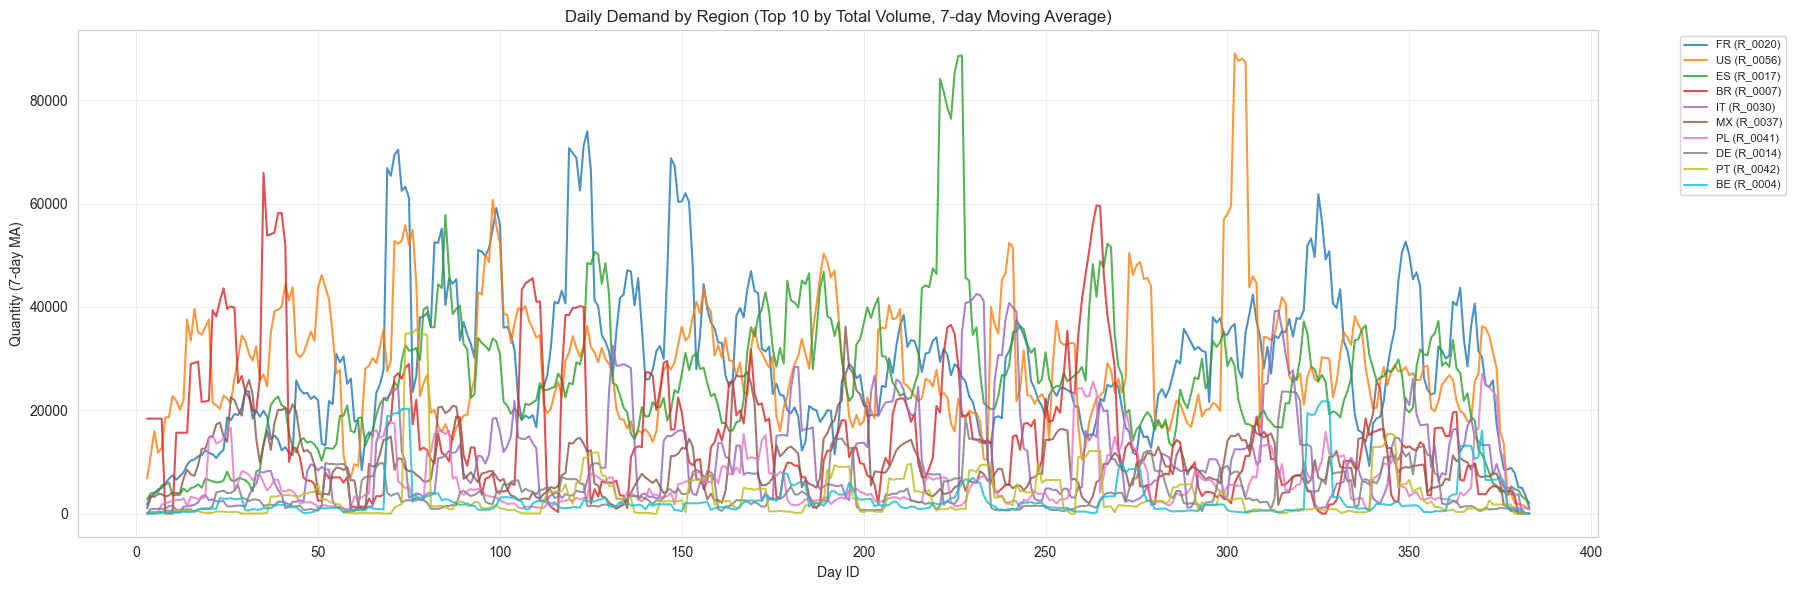

In [44]:
# Daily total demand (quantity) per region
region_daily = demand_df.groupby(['day_id', 'regionid'])['quantity'].sum().unstack(fill_value=0)
region_daily = region_daily.reindex(all_days, fill_value=0)

# Merge with region metadata for readable labels
region_labels = regions_df.set_index('regionid')['code'].to_dict()
region_daily.columns = [f"{region_labels.get(r, r)} ({r})" for r in region_daily.columns]

print(f"Region daily demand matrix: {region_daily.shape} (days x regions)")

# Time series of top 10 regions by total demand
top_regions = region_daily.sum().nlargest(10).index.tolist()

fig, ax = plt.subplots(figsize=(18, 6))
for region in top_regions:
    rolling = region_daily[region].rolling(window=7, center=True).mean()
    ax.plot(rolling.index, rolling.values, linewidth=1.5, label=region, alpha=0.8)

ax.set_xlabel('Day ID')
ax.set_ylabel('Quantity (7-day MA)')
ax.set_title('Daily Demand by Region (Top 10 by Total Volume, 7-day Moving Average)')
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


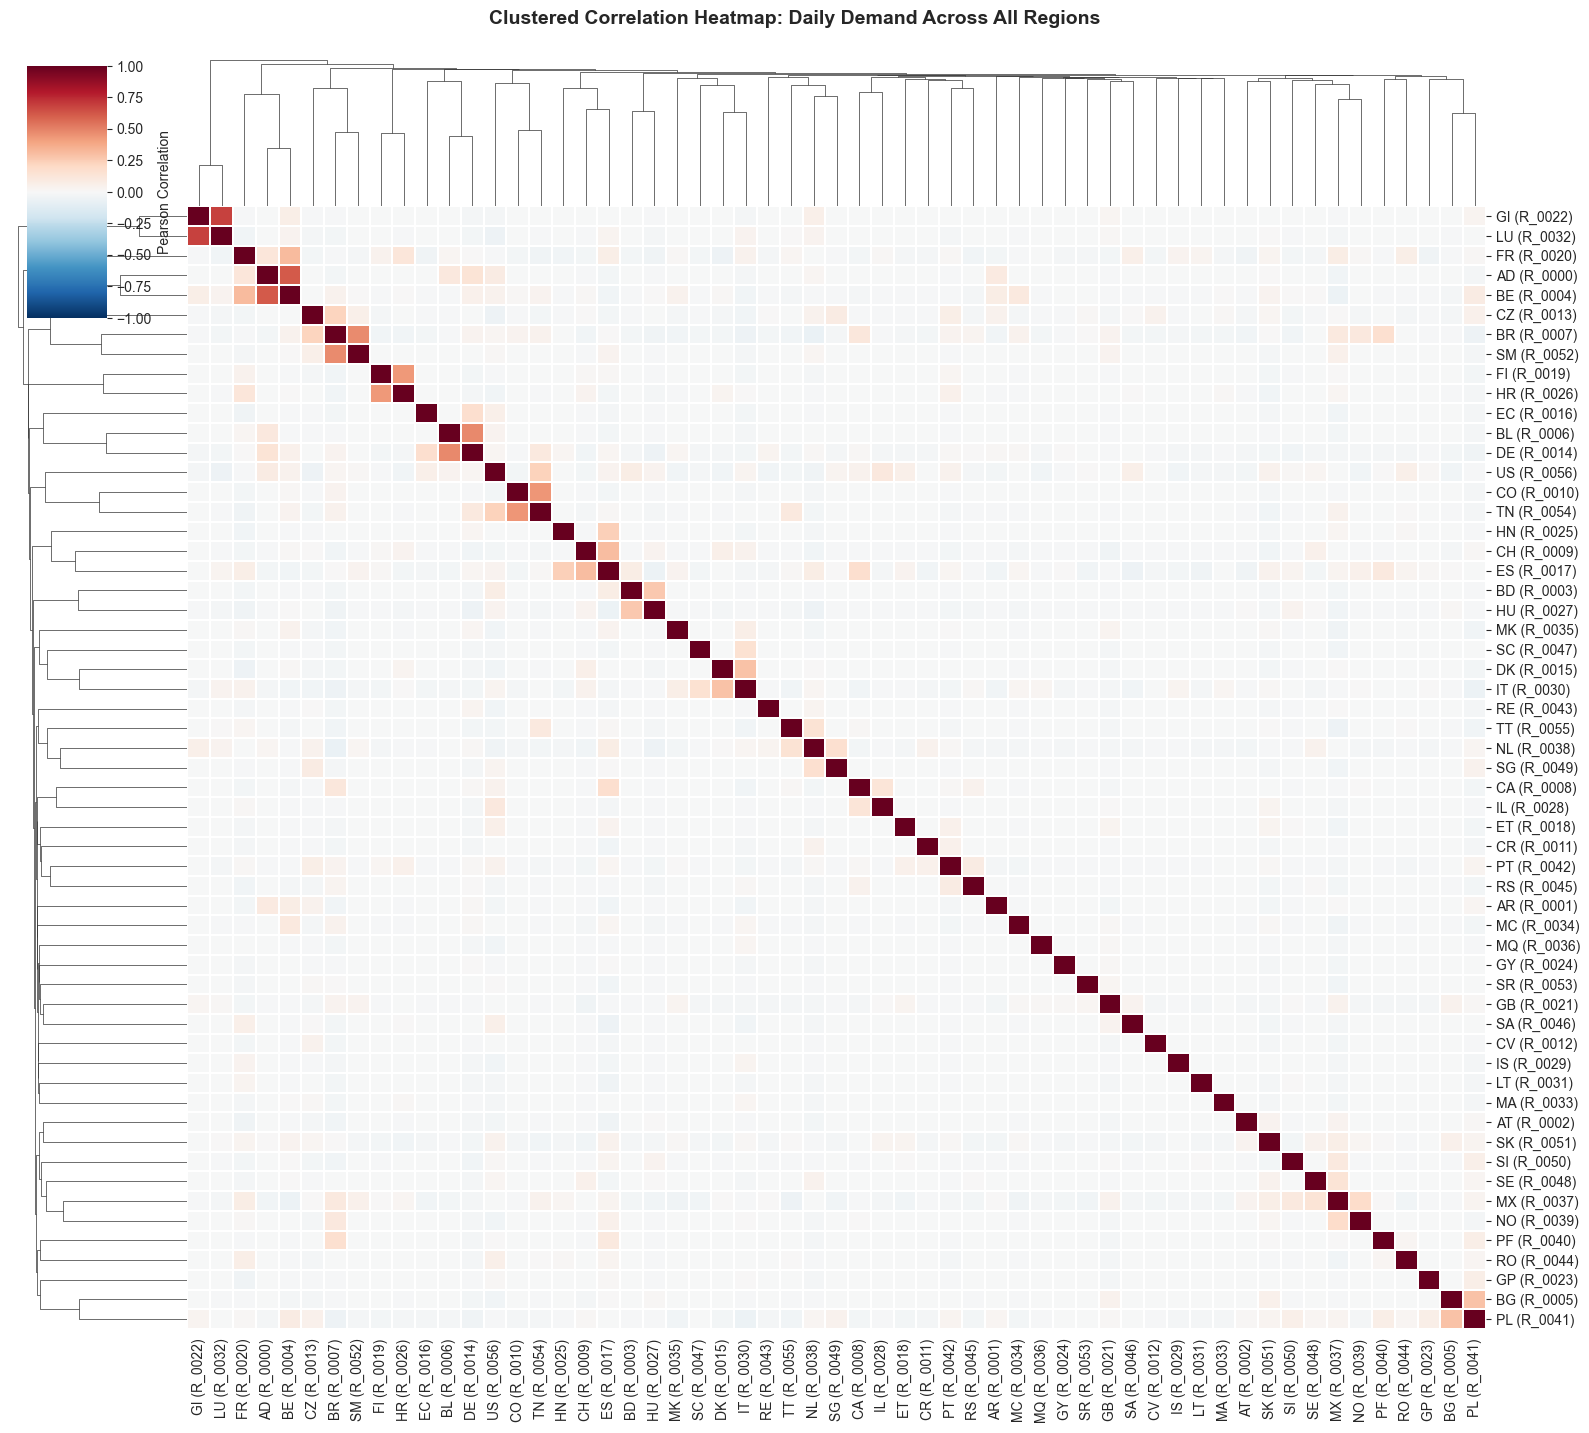

Top 10 most positively correlated region pairs:
  GI (R_0022) ↔ LU (R_0032): r = 0.684
  AD (R_0000) ↔ BE (R_0004): r = 0.613
  BL (R_0006) ↔ DE (R_0014): r = 0.482
  BR (R_0007) ↔ SM (R_0052): r = 0.474
  CO (R_0010) ↔ TN (R_0054): r = 0.445
  FI (R_0019) ↔ HR (R_0026): r = 0.437
  BE (R_0004) ↔ FR (R_0020): r = 0.316
  CH (R_0009) ↔ ES (R_0017): r = 0.312
  DK (R_0015) ↔ IT (R_0030): r = 0.290
  BG (R_0005) ↔ PL (R_0041): r = 0.290

Top 10 most negatively correlated region pairs:
  ES (R_0017) ↔ SA (R_0046): r = -0.048
  LU (R_0032) ↔ US (R_0056): r = -0.049
  BR (R_0007) ↔ IT (R_0030): r = -0.049
  HU (R_0027) ↔ NL (R_0038): r = -0.050
  MX (R_0037) ↔ TT (R_0055): r = -0.053
  BR (R_0007) ↔ PL (R_0041): r = -0.053
  IT (R_0030) ↔ PL (R_0041): r = -0.059
  BE (R_0004) ↔ MX (R_0037): r = -0.060
  ES (R_0017) ↔ HU (R_0027): r = -0.061
  BR (R_0007) ↔ NL (R_0038): r = -0.065

Region correlation stats: mean=0.000, std=0.045


In [45]:
# Region-to-region correlation heatmap (all regions)
region_corr = region_daily.corr()

g = sns.clustermap(region_corr, cmap='RdBu_r', center=0, vmin=-1, vmax=1,
                   figsize=(16, 14), linewidths=0.3,
                   dendrogram_ratio=(0.12, 0.12),
                   cbar_kws={'label': 'Pearson Correlation'})
g.fig.suptitle('Clustered Correlation Heatmap: Daily Demand Across All Regions', fontsize=14, fontweight='bold', y=1.02)
plt.show()

# Top correlated region pairs
region_corr_pairs = region_corr.where(np.triu(np.ones(region_corr.shape), k=1).astype(bool)).stack().reset_index()
region_corr_pairs.columns = ['Region_1', 'Region_2', 'correlation']
region_corr_pairs = region_corr_pairs.sort_values('correlation', ascending=False)

print("Top 10 most positively correlated region pairs:")
for _, row in region_corr_pairs.head(10).iterrows():
    print(f"  {row['Region_1']} ↔ {row['Region_2']}: r = {row['correlation']:.3f}")

print("\nTop 10 most negatively correlated region pairs:")
for _, row in region_corr_pairs.tail(10).iterrows():
    print(f"  {row['Region_1']} ↔ {row['Region_2']}: r = {row['correlation']:.3f}")

print(f"\nRegion correlation stats: mean={region_corr_pairs['correlation'].mean():.3f}, std={region_corr_pairs['correlation'].std():.3f}")


Cross-region demand correlation for most popular SKU: SKU_03566
Active regions for SKU_03566: 33


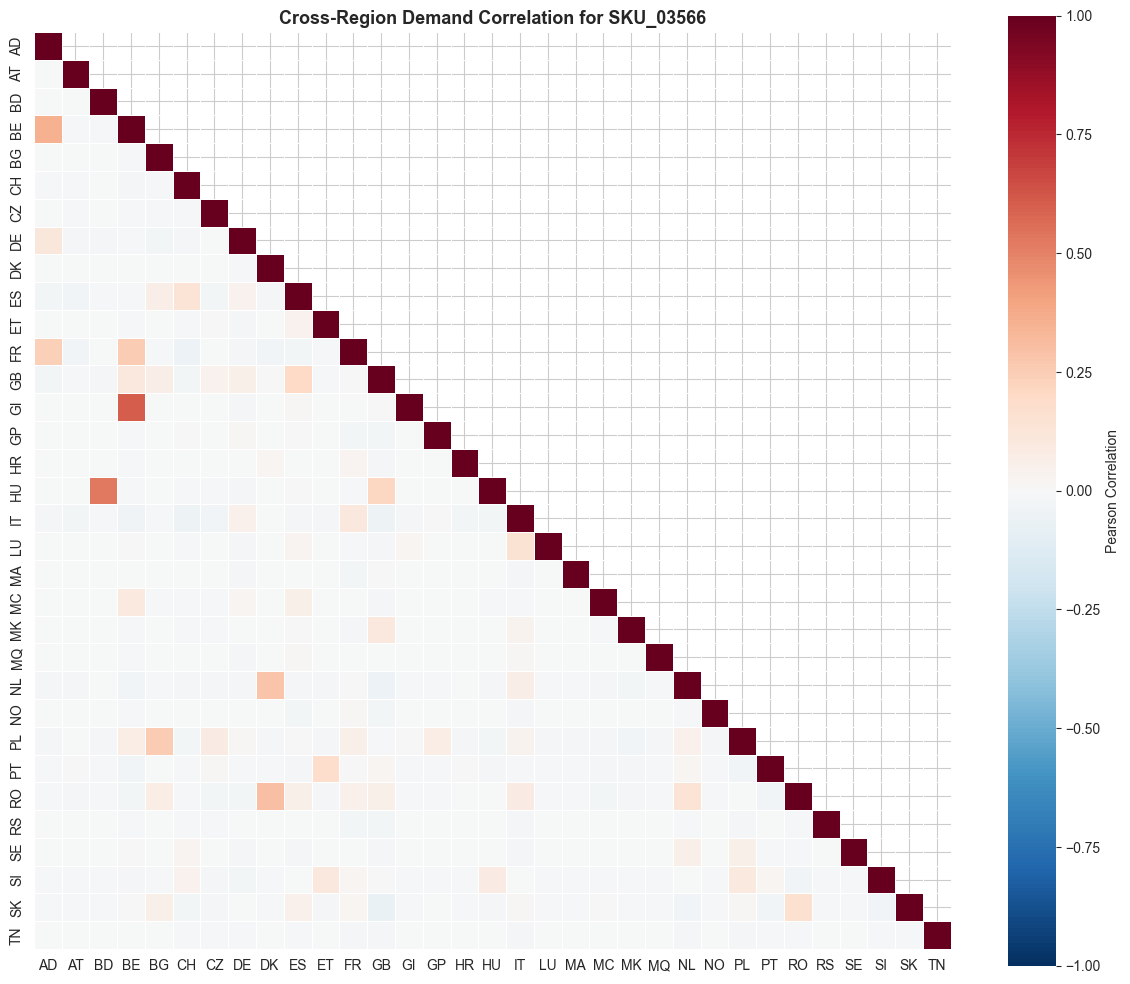

In [46]:
# Cross-correlation of SKU demand between regions for a popular SKU
# Pick the most-ordered SKU and show how its demand correlates across regions
most_popular_sku = top_skus[0]
print(f"Cross-region demand correlation for most popular SKU: {most_popular_sku}")

sku_region_daily = demand_df[demand_df['itemid'] == most_popular_sku].groupby(['day_id', 'regionid'])['quantity'].sum().unstack(fill_value=0)
sku_region_daily = sku_region_daily.reindex(all_days, fill_value=0)

# Only keep regions that have at least some demand for this SKU
active_regions = sku_region_daily.columns[sku_region_daily.sum() > 0]
sku_region_daily = sku_region_daily[active_regions]
sku_region_daily.columns = [f"{region_labels.get(r, r)}" for r in sku_region_daily.columns]

print(f"Active regions for {most_popular_sku}: {len(active_regions)}")

if len(active_regions) > 2:
    sku_region_corr = sku_region_daily.corr()
    
    fig, ax = plt.subplots(figsize=(12, 10))
    mask = np.triu(np.ones_like(sku_region_corr, dtype=bool), k=1)
    sns.heatmap(sku_region_corr, mask=mask, cmap='RdBu_r', center=0, vmin=-1, vmax=1,
                annot=len(active_regions) <= 20, fmt='.2f', square=True,
                linewidths=0.5, ax=ax, cbar_kws={'label': 'Pearson Correlation'})
    ax.set_title(f'Cross-Region Demand Correlation for {most_popular_sku}', fontsize=13, fontweight='bold')
    plt.tight_layout()
    plt.show()
else:
    print(f"Only {len(active_regions)} active regions — skipping correlation plot.")


### 9.4 Order-Level Seasonality

Investigate temporal patterns in **entire orders**: total order count per day, total order quantity per day, and their autocorrelation structures. This captures macro-level ordering behavior beyond individual SKUs.


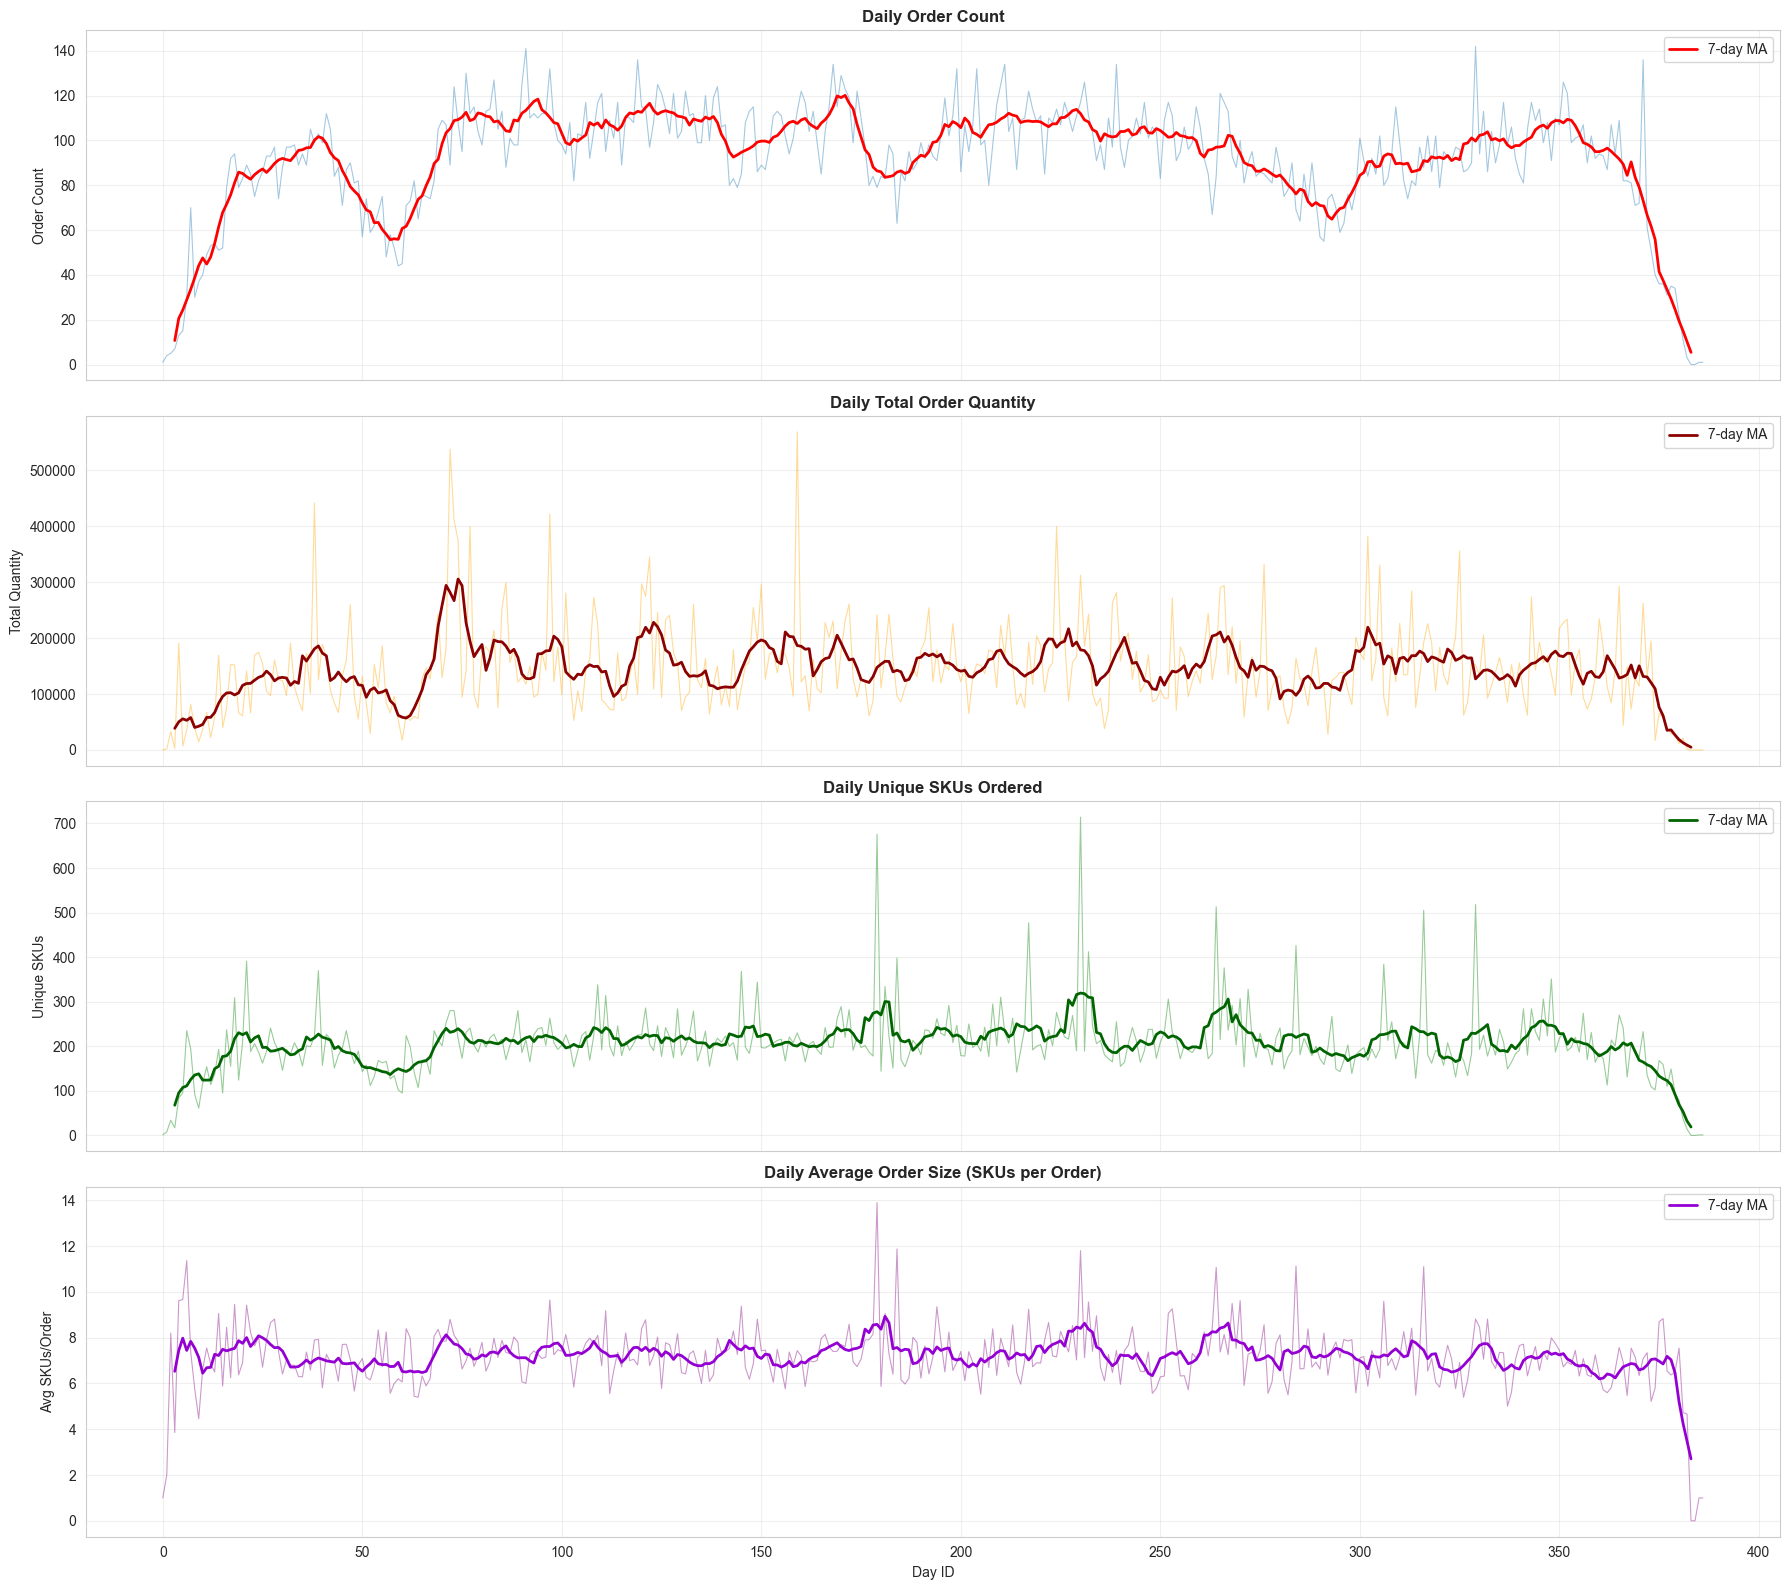

In [47]:
# Order-level daily aggregates
order_daily_counts = orders_df.groupby('day_id').size().reindex(all_days, fill_value=0)
order_daily_counts.name = 'order_count'

# Total quantity per day (sum over all SKUs in all orders)
order_qty_per_order = demand_df.groupby('salesorderid')['quantity'].sum().reset_index()
order_qty_per_order.columns = ['salesorderid', 'total_qty']
order_with_qty = orders_df.merge(order_qty_per_order, on='salesorderid')
daily_total_qty = order_with_qty.groupby('day_id')['total_qty'].sum().reindex(all_days, fill_value=0)
daily_total_qty.name = 'total_quantity'

# Number of unique SKUs ordered per day
daily_unique_skus = demand_df.groupby('day_id')['itemid'].nunique().reindex(all_days, fill_value=0)
daily_unique_skus.name = 'unique_skus'

# Average order size (SKUs per order) per day
daily_avg_order_size = demand_df.groupby(['day_id', 'salesorderid']).size().groupby('day_id').mean().reindex(all_days, fill_value=0)
daily_avg_order_size.name = 'avg_skus_per_order'

fig, axes = plt.subplots(4, 1, figsize=(18, 16), sharex=True)

# Order count
axes[0].plot(order_daily_counts.index, order_daily_counts.values, alpha=0.4, linewidth=0.8)
rolling_7 = order_daily_counts.rolling(7, center=True).mean()
axes[0].plot(rolling_7.index, rolling_7.values, color='red', linewidth=2, label='7-day MA')
axes[0].set_ylabel('Order Count')
axes[0].set_title('Daily Order Count', fontweight='bold')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Total quantity
axes[1].plot(daily_total_qty.index, daily_total_qty.values, alpha=0.4, linewidth=0.8, color='orange')
rolling_7_qty = daily_total_qty.rolling(7, center=True).mean()
axes[1].plot(rolling_7_qty.index, rolling_7_qty.values, color='darkred', linewidth=2, label='7-day MA')
axes[1].set_ylabel('Total Quantity')
axes[1].set_title('Daily Total Order Quantity', fontweight='bold')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

# Unique SKUs
axes[2].plot(daily_unique_skus.index, daily_unique_skus.values, alpha=0.4, linewidth=0.8, color='green')
rolling_7_skus = daily_unique_skus.rolling(7, center=True).mean()
axes[2].plot(rolling_7_skus.index, rolling_7_skus.values, color='darkgreen', linewidth=2, label='7-day MA')
axes[2].set_ylabel('Unique SKUs')
axes[2].set_title('Daily Unique SKUs Ordered', fontweight='bold')
axes[2].legend()
axes[2].grid(True, alpha=0.3)

# Avg SKUs per order
axes[3].plot(daily_avg_order_size.index, daily_avg_order_size.values, alpha=0.4, linewidth=0.8, color='purple')
rolling_7_size = daily_avg_order_size.rolling(7, center=True).mean()
axes[3].plot(rolling_7_size.index, rolling_7_size.values, color='darkviolet', linewidth=2, label='7-day MA')
axes[3].set_ylabel('Avg SKUs/Order')
axes[3].set_title('Daily Average Order Size (SKUs per Order)', fontweight='bold')
axes[3].set_xlabel('Day ID')
axes[3].legend()
axes[3].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


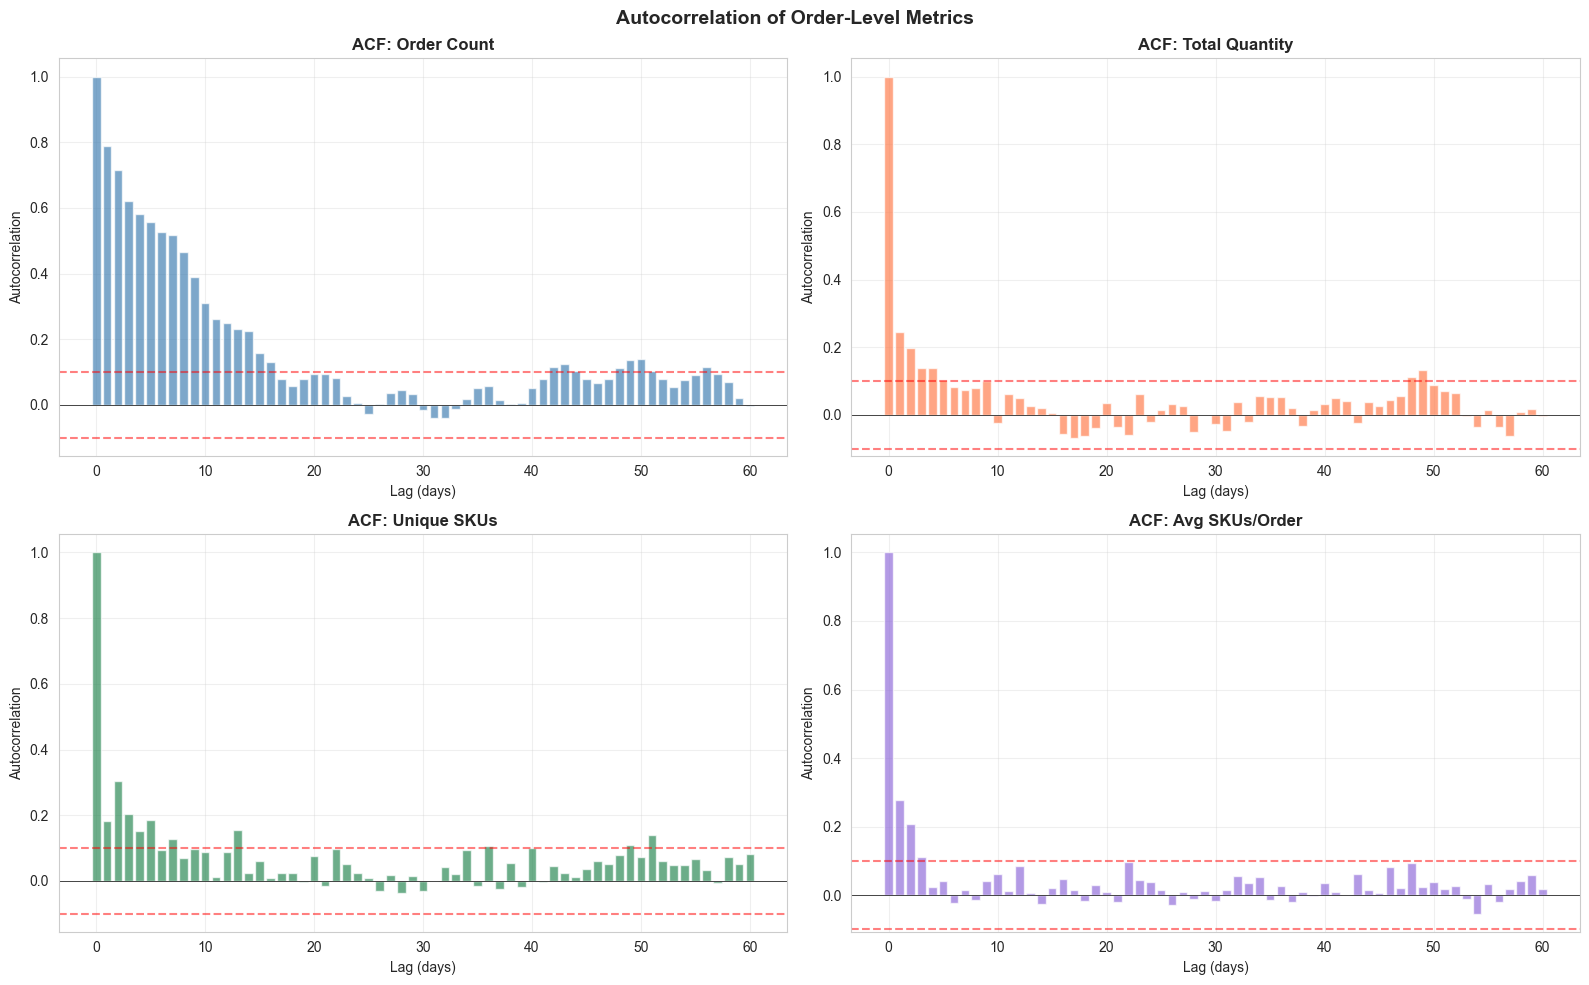


Significant ACF lags for order-level metrics:
  Order Count: lags [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]...
  Total Quantity: lags [1, 2, 3, 4, 5, 9, 48, 49]
  Unique SKUs: lags [1, 2, 3, 4, 5, 7, 13, 36, 40, 49, 51]
  Avg SKUs/Order: lags [1, 2, 3]


In [48]:
# ACF for order-level metrics
from statsmodels.tsa.stattools import acf

fig, axes = plt.subplots(2, 2, figsize=(16, 10))

order_metrics = {
    'Order Count': order_daily_counts.values,
    'Total Quantity': daily_total_qty.values,
    'Unique SKUs': daily_unique_skus.values,
    'Avg SKUs/Order': daily_avg_order_size.values,
}

colors = ['steelblue', 'coral', 'seagreen', 'mediumpurple']

for ax, (name, series), color in zip(axes.flatten(), order_metrics.items(), colors):
    max_lag_order = min(60, len(series) // 3)
    acf_vals = acf(series, nlags=max_lag_order, fft=True)
    ax.bar(range(len(acf_vals)), acf_vals, width=0.8, alpha=0.7, color=color)
    ci = 1.96 / np.sqrt(len(series))
    ax.axhline(y=ci, color='r', linestyle='--', alpha=0.5)
    ax.axhline(y=-ci, color='r', linestyle='--', alpha=0.5)
    ax.axhline(y=0, color='black', linewidth=0.5)
    ax.set_title(f'ACF: {name}', fontsize=12, fontweight='bold')
    ax.set_ylabel('Autocorrelation')
    ax.set_xlabel('Lag (days)')
    ax.grid(True, alpha=0.3)

plt.suptitle('Autocorrelation of Order-Level Metrics', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# Print significant lags
print("\nSignificant ACF lags for order-level metrics:")
for name, series in order_metrics.items():
    max_lag_order = min(60, len(series) // 3)
    acf_vals = acf(series, nlags=max_lag_order, fft=True)
    ci = 1.96 / np.sqrt(len(series))
    sig_lags = [lag for lag in range(1, len(acf_vals)) if abs(acf_vals[lag]) > ci]
    if sig_lags:
        print(f"  {name}: lags {sig_lags[:15]}{'...' if len(sig_lags) > 15 else ''}")
    else:
        print(f"  {name}: no significant lags")


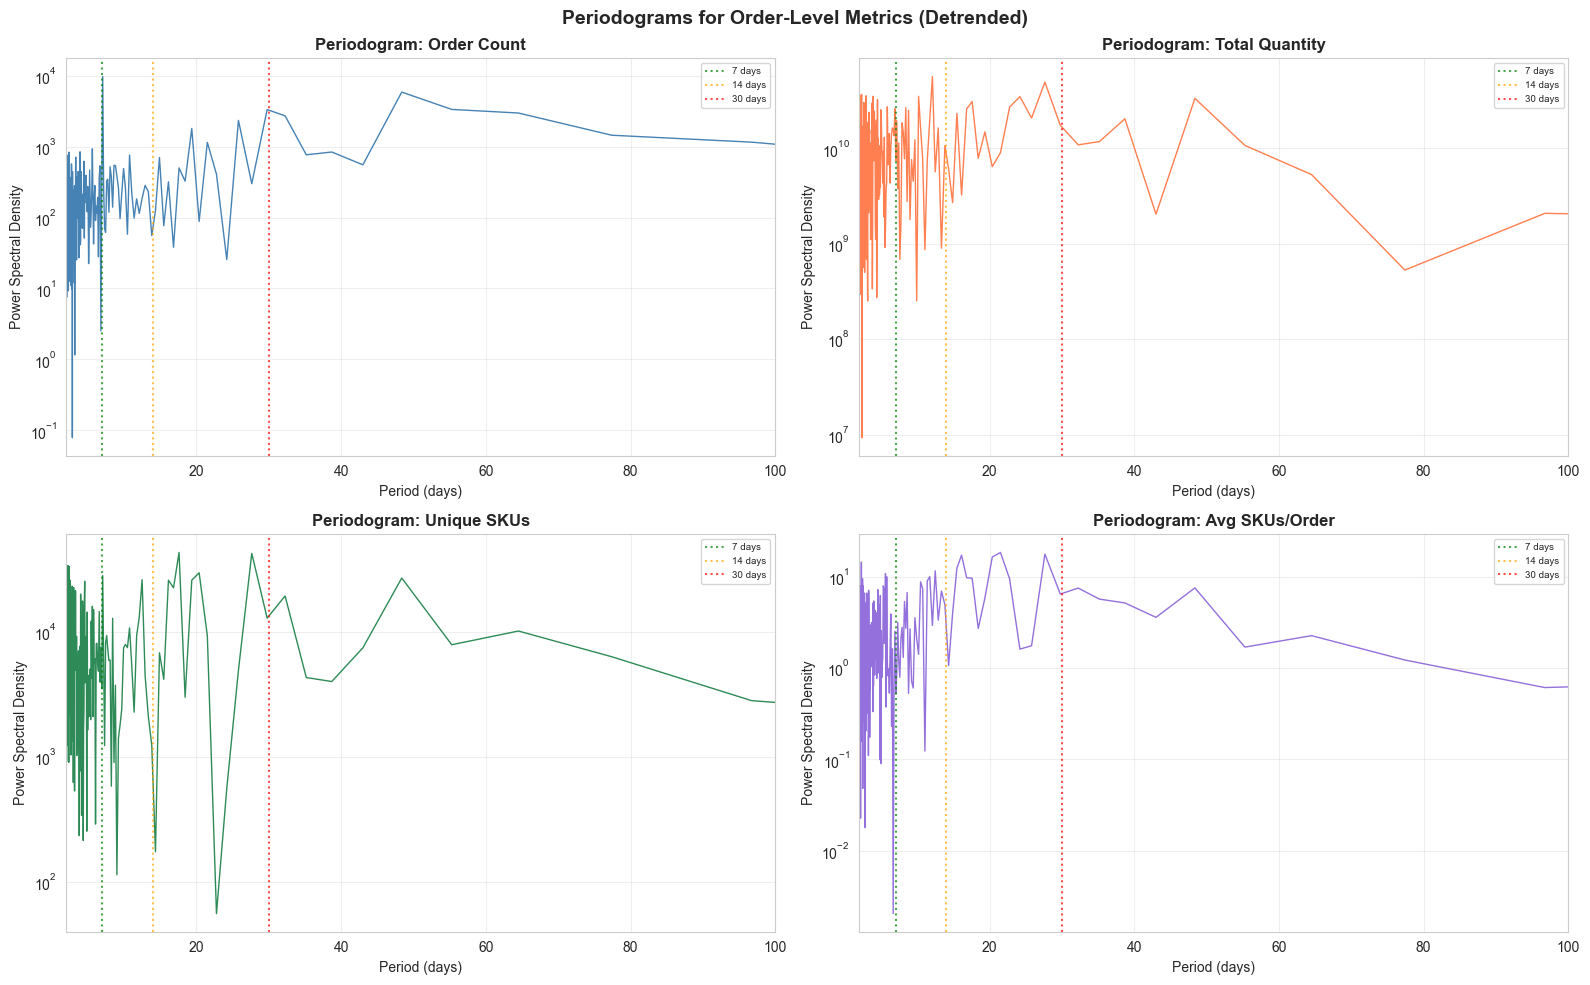

In [49]:
# Periodogram for order-level metrics
from scipy.signal import periodogram

fig, axes = plt.subplots(2, 2, figsize=(16, 10))

for ax, (name, series), color in zip(axes.flatten(), order_metrics.items(), colors):
    # Detrend
    detrended = series - pd.Series(series).rolling(window=30, center=True, min_periods=1).mean().values
    freqs, psd = periodogram(detrended, fs=1.0)
    periods = 1.0 / freqs[1:]
    psd_plot = psd[1:]
    
    ax.semilogy(periods, psd_plot, linewidth=1, color=color)
    ax.set_xlim(2, 100)
    ax.set_title(f'Periodogram: {name}', fontsize=12, fontweight='bold')
    ax.set_ylabel('Power Spectral Density')
    ax.set_xlabel('Period (days)')
    ax.axvline(x=7, color='green', linestyle=':', alpha=0.7, label='7 days')
    ax.axvline(x=14, color='orange', linestyle=':', alpha=0.7, label='14 days')
    ax.axvline(x=30, color='red', linestyle=':', alpha=0.7, label='30 days')
    ax.legend(fontsize=7)
    ax.grid(True, alpha=0.3)

plt.suptitle('Periodograms for Order-Level Metrics (Detrended)', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()


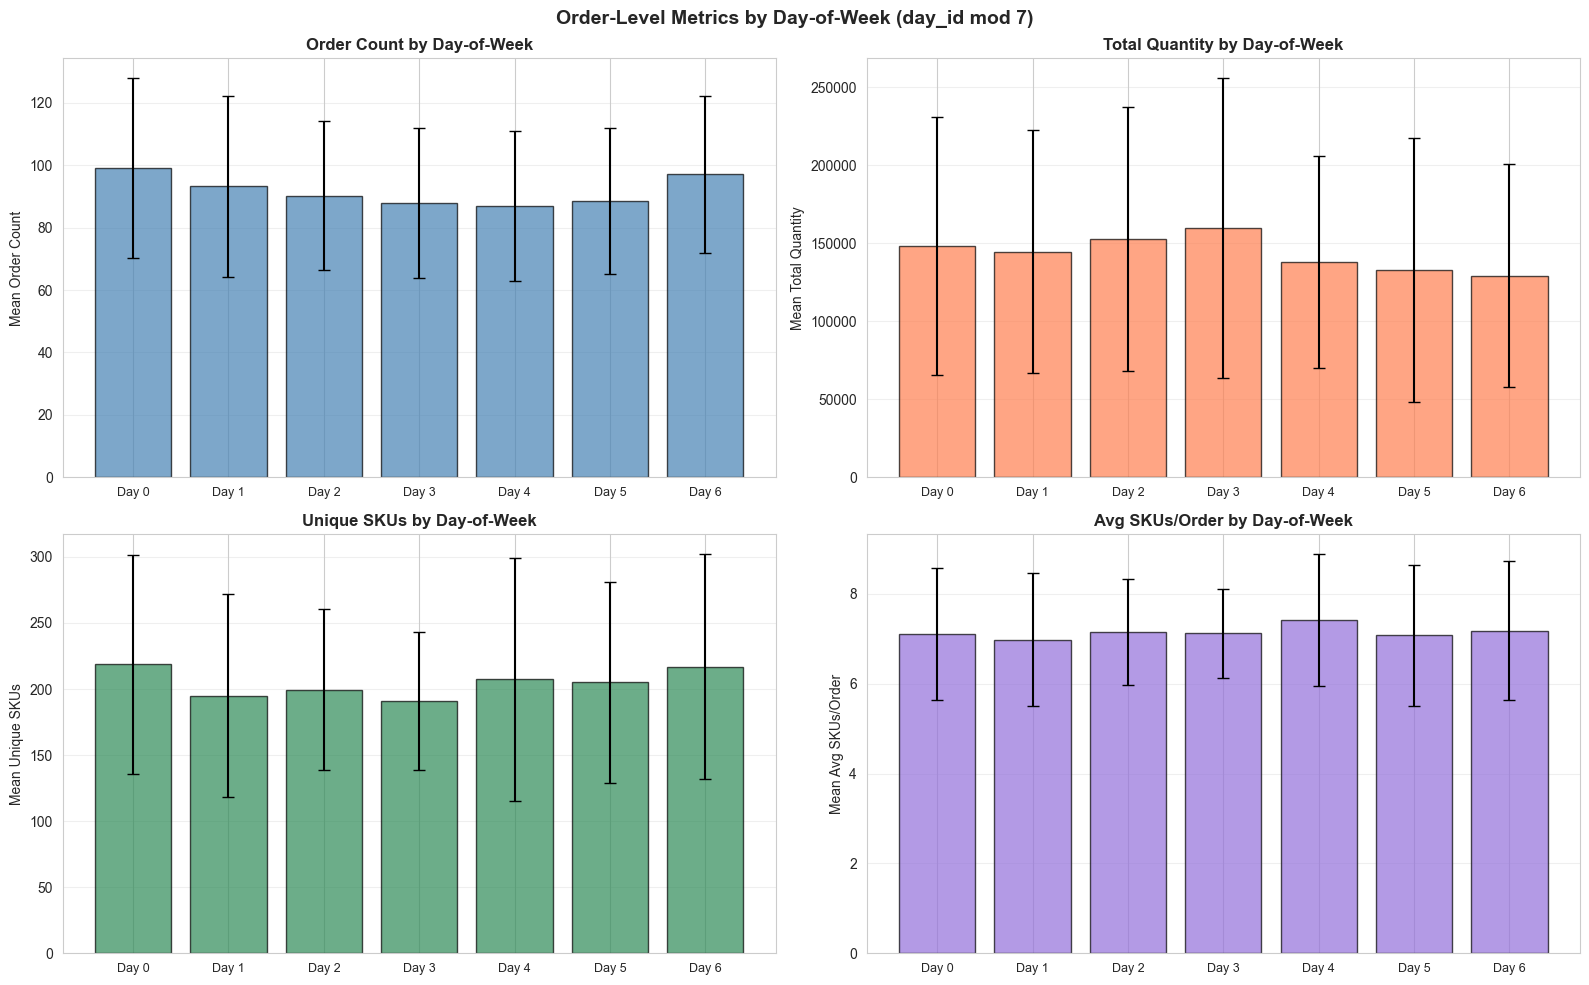


Kruskal-Wallis test for day-of-week effect on order metrics:
  Order Count: H=23.19, p=0.0007 (***)
  Total Quantity: H=6.99, p=0.3213 (ns)
  Unique SKUs: H=8.64, p=0.1946 (ns)
  Avg SKUs/Order: H=2.40, p=0.8793 (ns)


In [50]:
# Day-of-week effect for order-level metrics
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

for ax, (name, series), color in zip(axes.flatten(), order_metrics.items(), colors):
    dow = np.arange(len(series)) % 7
    dow_df = pd.DataFrame({'dow': dow, 'value': series})
    dow_grouped = dow_df.groupby('dow')['value']
    means = dow_grouped.mean()
    stds = dow_grouped.std()
    
    ax.bar(means.index, means.values, yerr=stds.values, capsize=4, alpha=0.7, color=color, edgecolor='black')
    ax.set_title(f'{name} by Day-of-Week', fontsize=12, fontweight='bold')
    ax.set_ylabel(f'Mean {name}')
    ax.set_xticks(range(7))
    ax.set_xticklabels([f'Day {d}' for d in range(7)], fontsize=9)
    ax.grid(True, alpha=0.3, axis='y')

plt.suptitle('Order-Level Metrics by Day-of-Week (day_id mod 7)', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# Kruskal-Wallis test
print("\nKruskal-Wallis test for day-of-week effect on order metrics:")
for name, series in order_metrics.items():
    dow = np.arange(len(series)) % 7
    groups = [series[dow == d] for d in range(7)]
    stat, pval = kruskal(*groups)
    sig = "***" if pval < 0.001 else "**" if pval < 0.01 else "*" if pval < 0.05 else "ns"
    print(f"  {name}: H={stat:.2f}, p={pval:.4f} ({sig})")


### 9.5 Cross-Region Order Correlations

Examine how order counts and total order quantities per day correlate between regions. This reveals whether ordering surges are region-specific or system-wide.


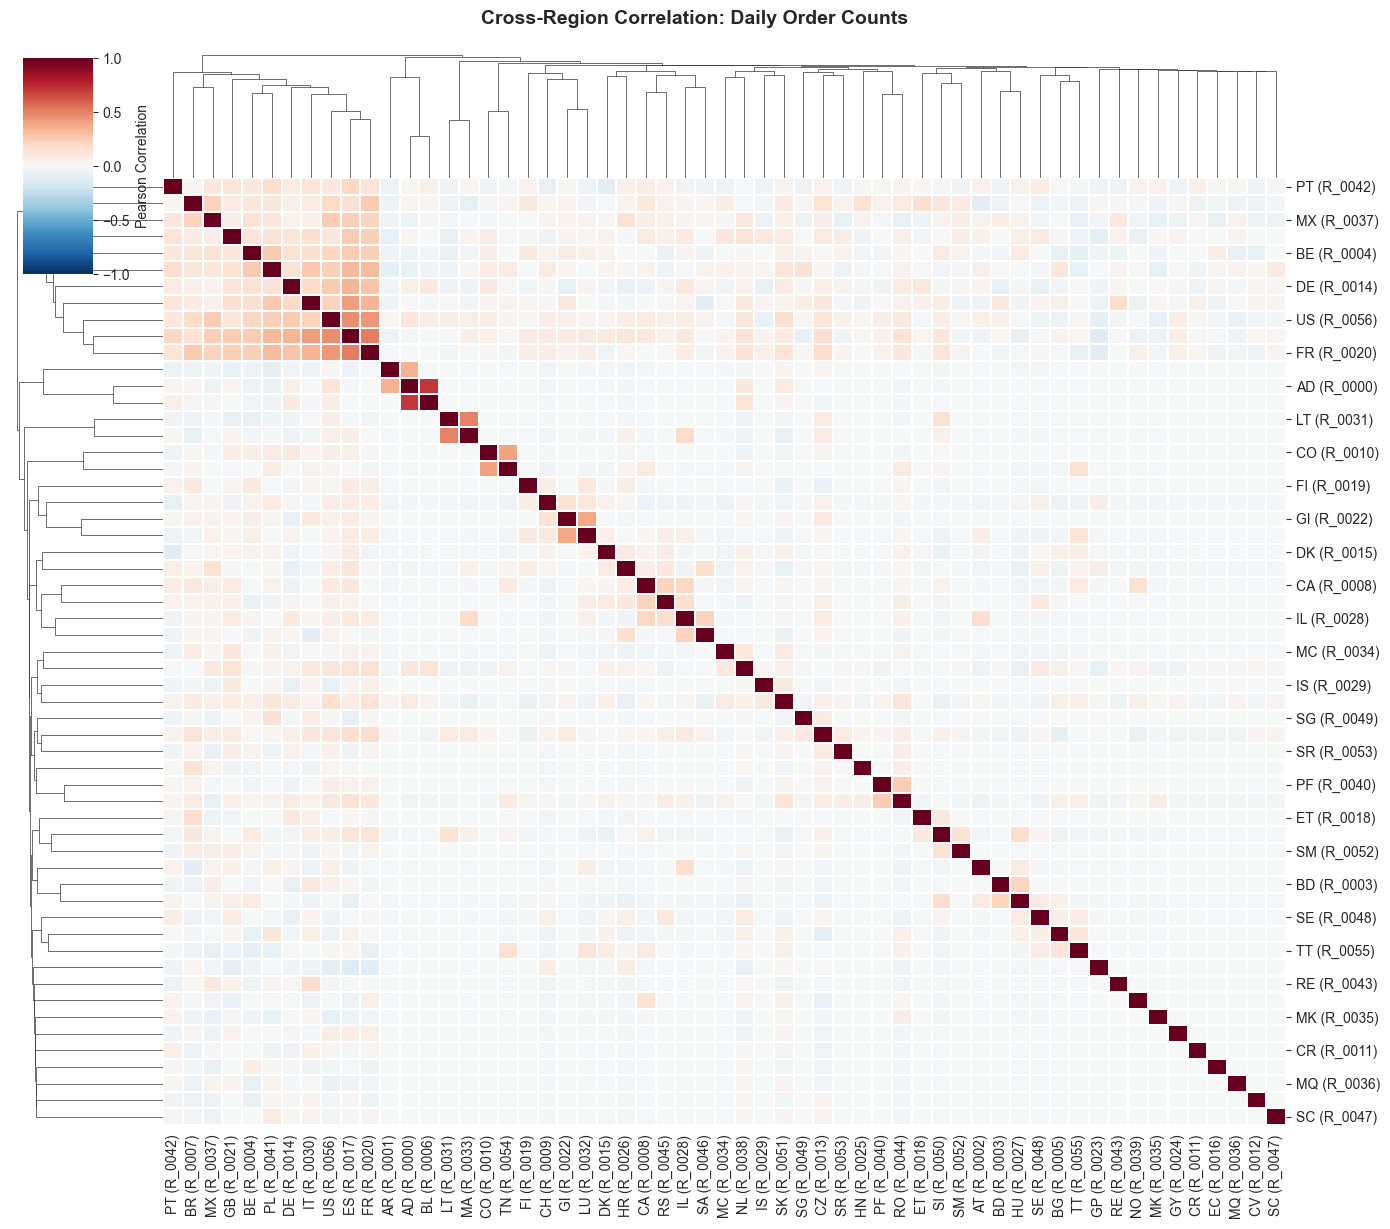

Top 10 most correlated region pairs (by order count):
  AD (R_0000) ↔ BL (R_0006): r = 0.706
  ES (R_0017) ↔ FR (R_0020): r = 0.515
  LT (R_0031) ↔ MA (R_0033): r = 0.498
  ES (R_0017) ↔ US (R_0056): r = 0.461
  FR (R_0020) ↔ US (R_0056): r = 0.442
  ES (R_0017) ↔ IT (R_0030): r = 0.416
  CO (R_0010) ↔ TN (R_0054): r = 0.406
  GI (R_0022) ↔ LU (R_0032): r = 0.390
  AD (R_0000) ↔ AR (R_0001): r = 0.349
  FR (R_0020) ↔ IT (R_0030): r = 0.342

Order count correlation stats: mean=0.011, std=0.065


In [51]:
# Daily order COUNT per region
region_order_counts = orders_df.groupby(['day_id', 'regionid']).size().unstack(fill_value=0)
region_order_counts = region_order_counts.reindex(all_days, fill_value=0)
region_order_counts.columns = [f"{region_labels.get(r, r)} ({r})" for r in region_order_counts.columns]

# Clustered heatmap of order count correlations
order_count_corr = region_order_counts.corr()

g1 = sns.clustermap(order_count_corr, cmap='RdBu_r', center=0, vmin=-1, vmax=1,
                    figsize=(14, 12), linewidths=0.3,
                    dendrogram_ratio=(0.12, 0.12),
                    cbar_kws={'label': 'Pearson Correlation'})
g1.fig.suptitle('Cross-Region Correlation: Daily Order Counts', fontsize=14, fontweight='bold', y=1.02)
plt.show()

# Print summary
oc_pairs = order_count_corr.where(np.triu(np.ones(order_count_corr.shape), k=1).astype(bool)).stack().reset_index()
oc_pairs.columns = ['Region_1', 'Region_2', 'correlation']
oc_pairs = oc_pairs.sort_values('correlation', ascending=False)

print("Top 10 most correlated region pairs (by order count):")
for _, row in oc_pairs.head(10).iterrows():
    print(f"  {row['Region_1']} ↔ {row['Region_2']}: r = {row['correlation']:.3f}")

print(f"\nOrder count correlation stats: mean={oc_pairs['correlation'].mean():.3f}, std={oc_pairs['correlation'].std():.3f}")


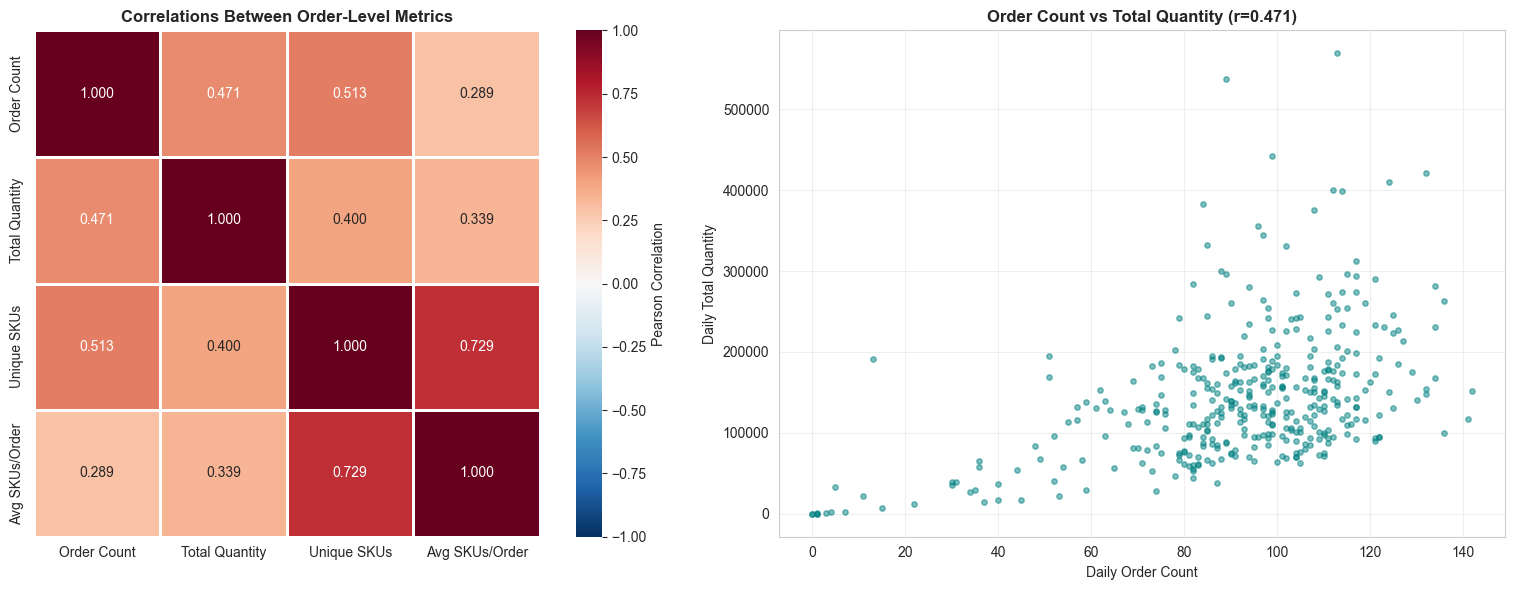

Pairwise correlations between order-level metrics:
                Order Count  Total Quantity  Unique SKUs  Avg SKUs/Order
Order Count        1.000000        0.470607     0.513314        0.289407
Total Quantity     0.470607        1.000000     0.400178        0.339415
Unique SKUs        0.513314        0.400178     1.000000        0.728566
Avg SKUs/Order     0.289407        0.339415     0.728566        1.000000


In [52]:
# Correlation between order-level metrics themselves
order_metrics_df = pd.DataFrame({
    'Order Count': order_daily_counts.values,
    'Total Quantity': daily_total_qty.values,
    'Unique SKUs': daily_unique_skus.values,
    'Avg SKUs/Order': daily_avg_order_size.values,
}, index=all_days)

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Correlation matrix between order metrics
metrics_corr = order_metrics_df.corr()
sns.heatmap(metrics_corr, annot=True, fmt='.3f', cmap='RdBu_r', center=0, vmin=-1, vmax=1,
            square=True, linewidths=1, ax=axes[0], cbar_kws={'label': 'Pearson Correlation'})
axes[0].set_title('Correlations Between Order-Level Metrics', fontsize=12, fontweight='bold')

# Scatter: Order count vs Total quantity
axes[1].scatter(order_metrics_df['Order Count'], order_metrics_df['Total Quantity'], 
                alpha=0.5, s=15, color='teal')
axes[1].set_xlabel('Daily Order Count')
axes[1].set_ylabel('Daily Total Quantity')
corr_val = order_metrics_df['Order Count'].corr(order_metrics_df['Total Quantity'])
axes[1].set_title(f'Order Count vs Total Quantity (r={corr_val:.3f})', fontsize=12, fontweight='bold')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("Pairwise correlations between order-level metrics:")
print(metrics_corr.to_string())


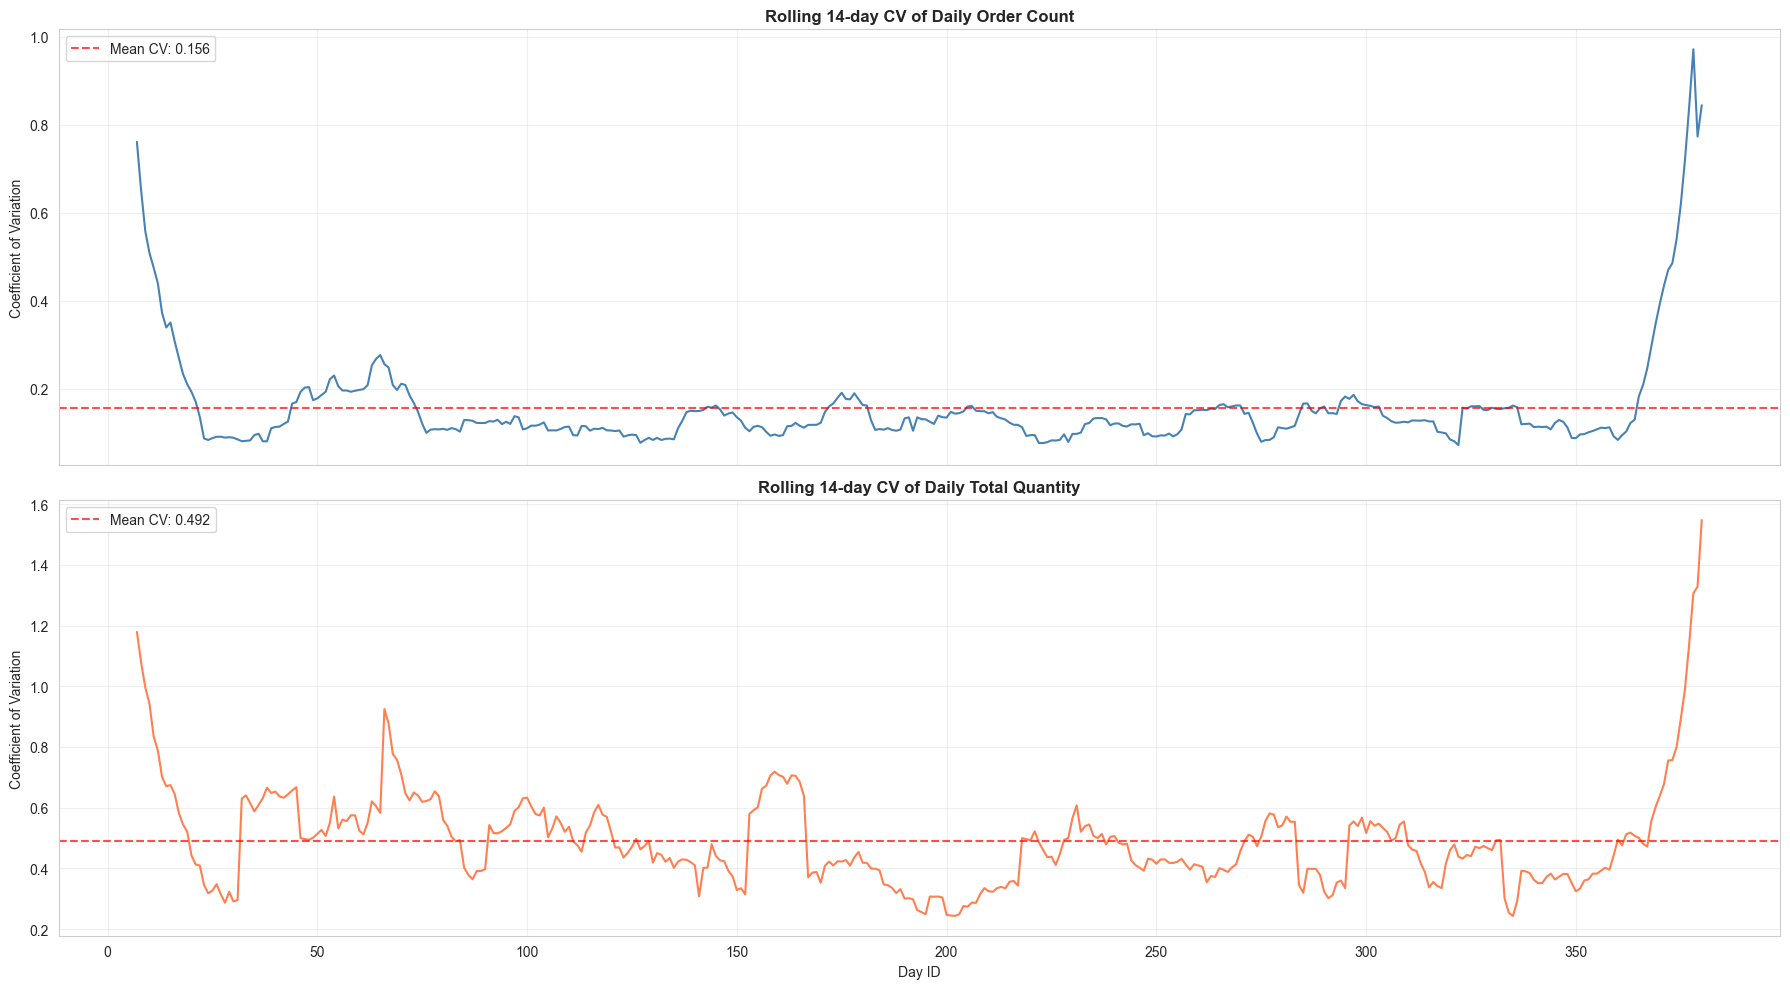

Average CV of order count: 0.156
Average CV of total quantity: 0.492
(Lower CV = more stable/predictable demand)


In [53]:
# Rolling volatility analysis: how stable are orders over time?
fig, axes = plt.subplots(2, 1, figsize=(18, 10), sharex=True)

# Rolling std of order count (window = 14 days)
rolling_std_count = pd.Series(order_daily_counts.values, index=all_days).rolling(14, center=True).std()
rolling_std_qty = pd.Series(daily_total_qty.values, index=all_days).rolling(14, center=True).std()

# Coefficient of variation (rolling std / rolling mean)
rolling_cv_count = rolling_std_count / pd.Series(order_daily_counts.values, index=all_days).rolling(14, center=True).mean()
rolling_cv_qty = rolling_std_qty / pd.Series(daily_total_qty.values, index=all_days).rolling(14, center=True).mean()

axes[0].plot(rolling_cv_count.index, rolling_cv_count.values, linewidth=1.5, color='steelblue')
axes[0].set_ylabel('Coefficient of Variation')
axes[0].set_title('Rolling 14-day CV of Daily Order Count', fontweight='bold')
axes[0].grid(True, alpha=0.3)
axes[0].axhline(y=rolling_cv_count.mean(), color='r', linestyle='--', alpha=0.7, label=f'Mean CV: {rolling_cv_count.mean():.3f}')
axes[0].legend()

axes[1].plot(rolling_cv_qty.index, rolling_cv_qty.values, linewidth=1.5, color='coral')
axes[1].set_ylabel('Coefficient of Variation')
axes[1].set_title('Rolling 14-day CV of Daily Total Quantity', fontweight='bold')
axes[1].set_xlabel('Day ID')
axes[1].grid(True, alpha=0.3)
axes[1].axhline(y=rolling_cv_qty.mean(), color='r', linestyle='--', alpha=0.7, label=f'Mean CV: {rolling_cv_qty.mean():.3f}')
axes[1].legend()

plt.tight_layout()
plt.show()

print(f"Average CV of order count: {rolling_cv_count.mean():.3f}")
print(f"Average CV of total quantity: {rolling_cv_qty.mean():.3f}")
print("(Lower CV = more stable/predictable demand)")
